# 1. **Descripci√≥n del Problema y Objetivos**

El objetivo de este an√°lisis es identificar los factores m√°s relevantes asociados con la enfermedad card√≠aca y construir un modelo predictivo que clasifique si un paciente tiene o no esta enfermedad.

### **Problema**

Identificar los principales factores relacionados con la enfermedad card√≠aca y predecir la presencia o ausencia de la enfermedad utilizando la variable objetivo `Num`.

### **Objetivos**

1. Explorar el dataset para comprender la distribuci√≥n de las variables y su relaci√≥n con la variable objetivo (`Num`).
2. Limpiar los datos, manejando valores ausentes y at√≠picos.
3. Construir y evaluar modelos predictivos para determinar cu√°l ofrece el mejor rendimiento.

### **Preguntas Clave**

1. ¬øCu√°les son los principales factores asociados con la presencia de enfermedad card√≠aca?
2. ¬øExisten patrones claros entre las variables que podamos utilizar para la predicci√≥n?
3. ¬øQu√© modelo ofrece el mejor rendimiento para este dataset?

### **Preguntas Iniciales**

1. **¬øQu√© tipo de modelo o an√°lisis necesito?**
   Usaremos un modelo de clasificaci√≥n, ya que buscamos clasificar los pacientes como `1` (enfermedad presente) o `0` (enfermedad ausente).

2. **¬øQu√© impacto tiene este an√°lisis para mi objetivo final?**
   Este an√°lisis permitir√° identificar los factores m√°s relevantes asociados con la enfermedad y desarrollar un modelo que facilite la predicci√≥n, contribuyendo al diagn√≥stico temprano y la toma de decisiones informadas.

---

# **2. Recolecci√≥n de Datos**


## **2.1. Descripci√≥n de los datos**

La base de datos **Heart Disease** fue obtenida del repositorio de **UCI Machine Learning**. Contiene un total de **303 observaciones** y **14 variables**, de las cuales 5 son cuantitativas y 9 categ√≥ricas. A continuaci√≥n, se describen las variables incluidas en el dataset:

- **Edad**: Edad del paciente (cuantitativa discreta).
- **Sexo**: Sexo del paciente (categ√≥rica con dos niveles: Femenino y Masculino).
- **Cp**: Tipo de dolor de pecho (categ√≥rica con 4 tipos):

  - **Tipo 1**: Angina t√≠pica.
  - **Tipo 2**: Angina at√≠pica.
  - **Tipo 3**: Dolor no anginal.
  - **Tipo 4**: Asintom√°tico.

- **Trestbps**: Presi√≥n arterial en reposo en mm Hg al ingreso al hospital (cuantitativa continua).
- **Chol**: Colesterol s√©rico en mg/dl (cuantitativa continua).
- **Fbs**: Az√∫car en sangre en ayunas > 120 mg/dl (categ√≥rica con dos niveles: Verdadero, Falso).
- **Restecg**: Resultados electrocardiogr√°ficos en reposo (categ√≥rica con 3 niveles):

  - **Nivel 0**: Normal.
  - **Nivel 1**: Anomal√≠a de onda ST-T (inversiones de onda T y/o elevaci√≥n o depresi√≥n de ST > 0.05 mV).
  - **Nivel 2**: Hipertrofia ventricular izquierda probable o definitiva seg√∫n los criterios de Estes.

- **Thalach**: Frecuencia card√≠aca m√°xima alcanzada (cuantitativa continua).
- **Exang**: Angina inducida por el ejercicio (categ√≥rica con dos niveles: S√≠, No).
- **Oldpeak**: Depresi√≥n del segmento ST inducida por el ejercicio en relaci√≥n con el descanso (cuantitativa continua).
- **Slope**: La pendiente del segmento ST del ejercicio pico (categ√≥rica con 3 niveles):

  - **Valor 1**: Ascendente.
  - **Valor 2**: Plano.
  - **Valor 3**: Descendente.

- **Ca**: N√∫mero de vasos principales (0-3) coloreados por fluoroscopia (categ√≥rica con 4 niveles: 0, 1, 2, 3).
- **Thal**: Estado del coraz√≥n seg√∫n la prueba de Thallium (categ√≥rica con 3 niveles):

  - **N**: Normal.
  - **DF**: Defecto fijo.
  - **DR**: Defecto reversible.

- **Num**: Diagn√≥stico de enfermedad card√≠aca basado en el estado angiogr√°fico (categ√≥rica con 4 niveles):

  - **Valor 0**: < 50% de estrechamiento del di√°metro (no presenta enfermedad).
  - **Valor 1**: > 50% de estrechamiento del di√°metro (presencia de enfermedad card√≠aca).

Este dataset proporciona una base s√≥lida para analizar factores asociados con enfermedades card√≠acas y construir modelos predictivos robustos.

---

## **2.2 Importar Librer√≠as**

Primero, importamos las librer√≠as necesarias para el an√°lisis, incluyendo:
- `KaggleApi` para descargar datos directamente de Kaggle.
- `pandas` y `numpy` para manejo y an√°lisis de datos.
- `matplotlib` y `seaborn` para visualizaciones.
Adem√°s, configuramos los estilos de gr√°ficos para que tengan un dise√±o uniforme y atractivo.

In [2654]:
# Importar librer√≠as de extracci√≥n de datos
from kaggle.api.kaggle_api_extended import KaggleApi

# Importar librer√≠as de manipulaci√≥n de datos
import pandas as pd
import numpy as np

# Importar librer√≠as de visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librer√≠as de estad√≠stica
from scipy.stats import chi2_contingency, shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal
from scipy.stats import shapiro, kruskal, levene
# Importar librer√≠as de Machine Learning
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Importar librer√≠as de Normalizaci√≥n y escalado
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Configuraci√≥n de gr√°ficos
sns.set_palette('viridis')
plt.style.use('ggplot')

# Desactivar warnings
import warnings
warnings.filterwarnings('ignore')

# Activar semilla
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("Librer√≠as importadas correctamente.")



NameError: name 'random' is not defined

---

## **2.3 Funciones**

En esta secci√≥n, definimos dos funciones clave para realizar an√°lisis estad√≠sticos y comparar datasets:

1. **`analyze_variable_verbose`**: Esta funci√≥n realiza un an√°lisis estad√≠stico detallado entre una variable continua y una categ√≥rica. Permite identificar si existen diferencias significativas entre las categor√≠as de una variable en relaci√≥n con otra, ofreciendo una salida detallada que incluye la normalidad, la prueba estad√≠stica utilizada y las conclusiones.

2. **`comparar_datasets`**: Permite comparar datasets en funci√≥n de una variable espec√≠fica. Dependiendo de si la variable es continua o categ√≥rica, la funci√≥n aplica pruebas estad√≠sticas como ANOVA, Kruskal-Wallis o Chi-cuadrado para evaluar diferencias significativas entre los grupos.

A continuaci√≥n, se presenta el c√≥digo para estas funciones.


In [ ]:
def analyze_variable_verbose(df, continuous_var, categorical_var, group_col=None, alpha=0.05):
    """
    Realiza an√°lisis estad√≠stico entre una variable continua y una categ√≥rica con una salida m√°s detallada y conclusiones claras.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        continuous_var (str): Nombre de la columna con la variable continua.
        categorical_var (str): Nombre de la columna con la variable categ√≥rica (variable objetivo).
        group_col (str, optional): Nombre de la columna de agrupaci√≥n (por ejemplo, grupo de edades).
        alpha (float, optional): Nivel de significancia para pruebas de normalidad y estad√≠sticas. Default es 0.05.

    Returns:
        None: Imprime los resultados y conclusiones directamente.
    """
    results = {}
    groups = df.groupby(group_col) if group_col else [(None, df)]
    
    for group, data in groups:
        # Dividir los datos seg√∫n la variable categ√≥rica
        unique_categories = data[categorical_var].unique()
        if len(unique_categories) < 2:
            print(f"\nGrupo: {group} -> No hay suficientes categor√≠as para realizar el an√°lisis")
            continue
        
        data_by_category = [data[data[categorical_var] == cat][continuous_var].dropna() for cat in unique_categories]
        
        # Verificar normalidad en cada categor√≠a
        normality_results = {cat: shapiro(d)[1] > alpha for cat, d in zip(unique_categories, data_by_category)}
        
        # Determinar qu√© prueba usar
        if all(normality_results.values()):
            # Datos normales
            if len(unique_categories) == 2:
                # Usar t-test para dos categor√≠as
                stat, p_value = ttest_ind(*data_by_category, equal_var=False)
                test_used = "T-test"
            else:
                # Usar ANOVA para m√°s de dos categor√≠as
                stat, p_value = f_oneway(*data_by_category)
                test_used = "ANOVA"
        else:
            # Datos no normales
            if len(unique_categories) == 2:
                # Usar Mann-Whitney U para dos categor√≠as
                stat, p_value = mannwhitneyu(*data_by_category)
                test_used = "Mann-Whitney U"
            else:
                # Usar Kruskal-Wallis para m√°s de dos categor√≠as
                stat, p_value = kruskal(*data_by_category)
                test_used = "Kruskal-Wallis"
        
        # Verbose Output
        print(f"\nGrupo: {group}")
        print(f"  Variable continua analizada: {continuous_var}")
        print(f"  Variable categ√≥rica analizada: {categorical_var}")
        print(f"  Test usado: {test_used}")
        print(f"  Estad√≠stico: {stat:.4f}")
        print(f"  P-Valor: {p_value:.4f}")
        
        # Normalidad
        print("  Normalidad por categor√≠a:")
        for cat, normal in normality_results.items():
            print(f"    - Categor√≠a {cat}: {'Normal' if normal else 'No normal'}")
        
        # Conclusi√≥n
        if p_value < alpha:
            print(f"  **Conclusi√≥n**: Hay diferencias significativas entre las categor√≠as de {categorical_var} respecto a {continuous_var} (p < {alpha}).")
        else:
            print(f"  **Conclusi√≥n**: No hay diferencias significativas entre las categor√≠as de {categorical_var} respecto a {continuous_var} (p >= {alpha}).")


def comparar_datasets(df, variable, tipo):
    grupos = df.groupby('dataset')[variable]
    if tipo == 'continua':
        # Filtrar grupos con menos de 3 datos
        grupos_filtrados = {dataset: data.dropna() for dataset, data in grupos if len(data.dropna()) >= 3}
        if len(grupos_filtrados) < 2:
            print(f"No hay suficientes grupos v√°lidos para {variable}")
            return
        
        # Normalidad y homogeneidad
        normalidad = {dataset: shapiro(data)[1] > 0.05 for dataset, data in grupos_filtrados.items()}
        homogeneidad = levene(*grupos_filtrados.values())[1] > 0.05
        
        # Elegir prueba
        if all(normalidad.values()) and homogeneidad:
            # ANOVA
            stat, p_value = f_oneway(*grupos_filtrados.values())
            test = "ANOVA"
        else:
            # Kruskal-Wallis
            stat, p_value = kruskal(*grupos_filtrados.values())
            test = "Kruskal-Wallis"
        
        print(f"Prueba usada: {test} para {variable}")
        print(f"Estad√≠stico={stat:.4f}, p-valor={p_value:.4f}")
    elif tipo == 'categorica':
        # Chi-cuadrado
        tabla = pd.crosstab(df['dataset'], df[variable])
        stat, p_value, _, _ = chi2_contingency(tabla)
        print(f"Chi-cuadrado para {variable}: Estad√≠stico={stat:.4f}, p-valor={p_value:.4f}")

---

## **2.4. Descarga del Dataset**


Utilizamos la **API de Kaggle** para descargar y descomprimir autom√°ticamente el dataset **Heart Disease Data**, garantizando que trabajamos con datos actualizados directamente desde su fuente.

* **Pasos Realizados:**
    1. **Autenticaci√≥n**: Configuramos la API de Kaggle con las credenciales necesarias.
    2. **Descarga y Descompresi√≥n**: Obtenemos el archivo del dataset y lo descomprimimos autom√°ticamente en una carpeta local.
    3. **Carga de Datos**: Importamos el archivo CSV en un DataFrame de pandas para comenzar el an√°lisis.

El c√≥digo a continuaci√≥n detalla este proceso:



In [ ]:
# Configurar API de Kaggle
api = KaggleApi()
api.authenticate()

# Descargar el dataset
dataset = "redwankarimsony/heart-disease-data"
path = "heart_disease_data"  # Carpeta destino
api.dataset_download_files(dataset, path=path, unzip=True)

# Leer el archivo CSV
uci_data = pd.read_csv(f"{path}/heart_disease_uci.csv")

# Filas y columnas
uci_data.shape[0], uci_data.shape[1], uci_data.columns.tolist()

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


(920,
 16,
 ['id',
  'age',
  'sex',
  'dataset',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalch',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'num'])

## **Resultados**

- **Tama√±o del dataset**: 920 filas y 16 columnas.
- **Columnas disponibles**:
  - `id`, `age`, `sex`, `dataset`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, `thalch`, `exang`, `oldpeak`, `slope`, `ca`, `thal`, `num`.

El dataset contiene informaci√≥n relevante para nuestro an√°lisis, incluyendo variables relacionadas con las caracter√≠sticas demogr√°ficas, cl√≠nicas y resultados diagn√≥sticos de los pacientes. 

La columna `num` ser√° utilizada como la **variable objetivo**, mientras que las otras columnas servir√°n como predictores en los modelos posteriores.



---

# **3. Exploraci√≥n Inicial**

## **3.1 Primera vista al Dataset**

En esta secci√≥n, realizamos una exploraci√≥n inicial del dataset descargado para entender su estructura, las dimensiones, y el contenido de las variables. Este an√°lisis incluye:

1. Mostrar las dimensiones del dataset.
2. Visualizar las primeras filas para observar c√≥mo est√°n organizados los datos.
3. Obtener un resumen b√°sico de las variables, incluyendo sus tipos de datos, valores nulos, y memoria utilizada.
4. Generar estad√≠sticas descriptivas para las variables num√©ricas y categ√≥ricas.

El c√≥digo a continuaci√≥n detalla los pasos realizados:


In [ ]:
# Mostrar las dimensiones y primeras filas del dataset
print("Dimensiones del dataset:")
display(uci_data.shape)

print("\nPrimeras filas del dataset:")
display(uci_data.head())

# Exploraci√≥n b√°sica

# Informaci√≥n general del dataset
print("Informaci√≥n general del dataset:")
display(uci_data.info())  

# Resumen estad√≠stico
print("\nResumen estad√≠stico del dataset:")
display(uci_data.describe(include='all'))  

# Tama√±o del dataset
print("\nTama√±o del dataset:")
display(f"Filas: {uci_data.shape[0]}, Columnas: {uci_data.shape[1]}") 

Dimensiones del dataset:


(920, 16)


Primeras filas del dataset:


id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None


Resumen estad√≠stico del dataset:


id         age   sex    dataset            cp    trestbps  \
count   920.000000  920.000000   920        920           920  861.000000   
unique         NaN         NaN     2          4             4         NaN   
top            NaN         NaN  Male  Cleveland  asymptomatic         NaN   
freq           NaN         NaN   726        304           496         NaN   
mean    460.500000   53.510870   NaN        NaN           NaN  132.132404   
std     265.725422    9.424685   NaN        NaN           NaN   19.066070   
min       1.000000   28.000000   NaN        NaN           NaN    0.000000   
25%     230.750000   47.000000   NaN        NaN           NaN  120.000000   
50%     460.500000   54.000000   NaN        NaN           NaN  130.000000   
75%     690.250000   60.000000   NaN        NaN           NaN  140.000000   
max     920.000000   77.000000   NaN        NaN           NaN  200.000000   

              chol    fbs restecg      thalch  exang     oldpeak slope  \
count   890.000000    830     918  865.000000    865  858.000000   611   
unique         NaN      2       3         NaN      2         NaN     3   
top            NaN  False  normal         NaN  False         NaN  flat   
freq           NaN    692     551         NaN    528         NaN   345   
mean    199.130337    NaN     NaN  137.545665    NaN    0.878788   NaN   
std     110.780810    NaN     NaN   25.926276    NaN    1.091226   NaN   
min       0.000000    NaN     NaN   60.000000    NaN   -2.600000   NaN   
25%     175.000000    NaN     NaN  120.000000    NaN    0.000000   NaN   
50%     223.000000    NaN     NaN  140.000000    NaN    0.500000   NaN   
75%     268.000000    NaN     NaN  157.000000    NaN    1.500000   NaN   
max     603.000000    NaN     NaN  202.000000    NaN    6.200000   NaN   

                ca    thal         num  
count   309.000000     434  920.000000  
unique         NaN       3         NaN  
top            NaN  normal         NaN  
freq           NaN     196         NaN  
mean      0.676375     NaN    0.995652  
std       0.935653     NaN    1.142693  
min       0.000000     NaN    0.000000  
25%       0.000000     NaN    0.000000  
50%       0.000000     NaN    1.000000  
75%       1.000000     NaN    2.000000  
max       3.000000     NaN    4.000000


Tama√±o del dataset:


'Filas: 920, Columnas: 16'

### **Resultados de la Exploraci√≥n Inicial**

### **Dimensiones del Dataset**
- El dataset tiene **920 filas** y **16 columnas**, lo que proporciona un conjunto amplio de datos para el an√°lisis.

### **Primeras Filas del Dataset**
- Observamos ejemplos de los datos para entender su estructura y formato:
  - La columna `id` parece ser un identificador √∫nico.
  - Variables como `age`, `sex`, `cp` y `num` contienen informaci√≥n relevante para el an√°lisis.

### **Informaci√≥n General**
- **Columnas**: 16 en total, incluyendo 5 variables num√©ricas continuas, 3 num√©ricas discretas y 8 categ√≥ricas.
- **Valores Nulos**: Algunas columnas presentan valores nulos significativos:
  - `ca` y `thal` tienen menos de la mitad de los datos completos.
  - Variables como `trestbps`, `chol`, y `slope` tambi√©n tienen valores faltantes.

### **Resumen Estad√≠stico**
- Las variables num√©ricas presentan un rango amplio de valores:
  - **Edad**: Rango de 28 a 77 a√±os.
  - **Colesterol (chol)**: Valores entre 0 y 603 mg/dl, aunque valores de 0 pueden ser datos err√≥neos o faltantes.
  - **Presi√≥n arterial en reposo (trestbps)**: Rango de 0 a 200 mm Hg, con algunos valores posiblemente fuera de rango normal.

Esta exploraci√≥n inicial nos permite identificar posibles problemas con los datos, como valores at√≠picos o columnas con muchos valores faltantes. En las pr√≥ximas secciones, abordaremos estos problemas para preparar el dataset para el an√°lisis predictivo.


## **3.2. Distribuci√≥n de las variables**

En esta secci√≥n, exploramos la distribuci√≥n de las variables num√©ricas del dataset para identificar patrones, valores at√≠picos y posibles transformaciones necesarias para el an√°lisis. Este paso es crucial para entender la naturaleza de los datos y su adecuaci√≥n a diferentes modelos predictivos.

### **Pasos Realizados:**
1. Seleccionamos todas las columnas num√©ricas del dataset.
2. Generamos histogramas para visualizar la distribuci√≥n de las variables.
3. Evaluamos si las variables presentan sesgos, valores at√≠picos o distribuciones normales.

El c√≥digo a continuaci√≥n detalla este procedimiento:


Distribuciones de las variables num√©ricas:


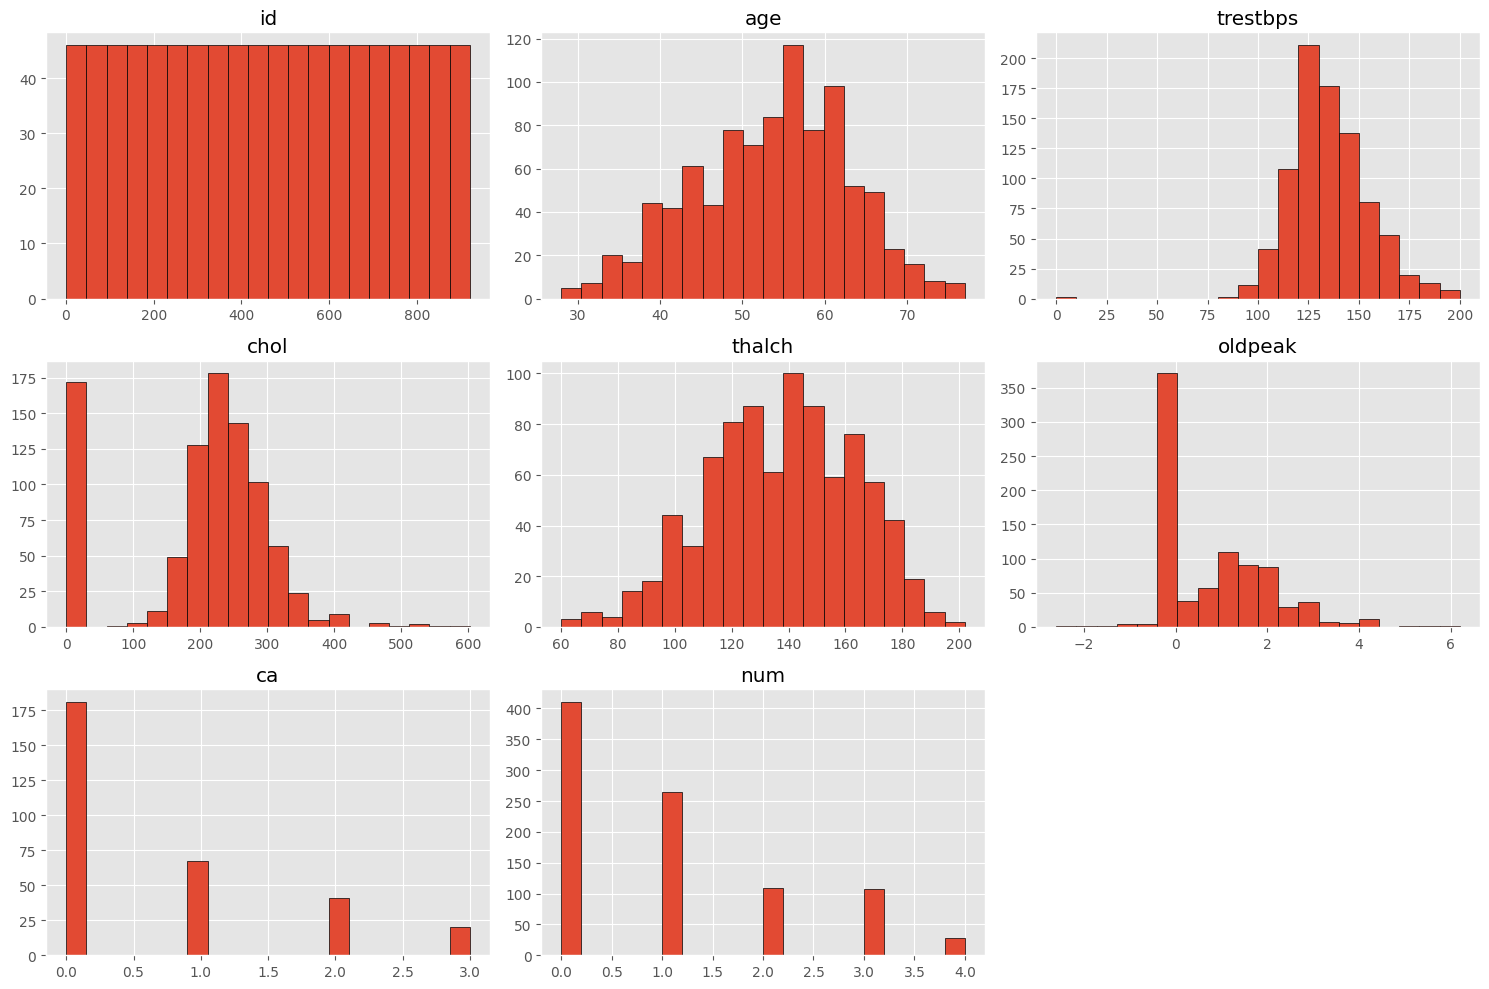

In [ ]:
# Seleccionar columnas num√©ricas
numeric_cols = uci_data.select_dtypes(include=['float64', 'int64']).columns

# Visualizar distribuciones de las variables num√©ricas
print("Distribuciones de las variables num√©ricas:")
uci_data[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

### **Resultados**

La visualizaci√≥n de las distribuciones proporciona los siguientes insights:

1. **Distribuciones Centradas:**
   - Variables como `age` y `thalch` presentan distribuciones relativamente sim√©tricas, con una forma cercana a la normal.

2. **Distribuciones Asim√©tricas:**
   - La variable `trestbps` presenta asimetr√≠a, con cola a la izquierda.

2. **Valores At√≠picos y Sesgos:**
   - `chol` muestra valores extremos en los niveles altos, lo cual podr√≠a requerir mayor an√°lisis.
   - `oldpeak` tiene una distribuci√≥n altamente sesgada hacia valores bajos, con algunos valores at√≠picos significativos.

3. **Categor√≠as Desbalanceadas:**
   - `num`, nuestra variable objetivo, est√° desbalanceada, con una mayor√≠a de observaciones en `0` (sin enfermedad) y menos en las otras categor√≠as.


## **3.3. Distribuci√≥n de la variable objetivo `num`**

#### **Resultados**

1. **Distribuci√≥n Observada:**
   - **Nivel 0 (sin enfermedad)**: Representa la mayor√≠a de los pacientes, con aproximadamente 400 observaciones.
   - **Niveles 1, 2, 3 y 4 (enfermedad en distintos grados)**: Est√°n distribuidos de manera desigual, siendo el **nivel 1** el m√°s frecuente entre ellos.

2. **Desequilibrio en la Distribuci√≥n:**
   - Existe un **desequilibrio significativo** en las clases, con una fuerte mayor√≠a de pacientes en el nivel 0.
   - Los niveles m√°s altos (2, 3, 4) tienen menos observaciones, lo que podr√≠a dificultar la construcci√≥n de un modelo predictivo que clasifique correctamente estos casos.

#### **Observaciones**

- Dada esta distribuci√≥n desbalanceada, ser√≠a conveniente **simplificar la variable objetivo** a una **clasificaci√≥n binaria**:
  - **0**: Sin enfermedad.
  - **1**: Con enfermedad (combinando los niveles 1, 2, 3 y 4).
- Este enfoque no solo equilibra las clases, sino que tambi√©n se alinea con el objetivo del an√°lisis, que busca clasificar a los pacientes en dos categor√≠as: **sin enfermedad (0)** o **con enfermedad (1)**.

#### **Decisi√≥n**

- Procederemos a **reclasificar la variable `num`** en dos categor√≠as:
  - **0**: Sin enfermedad.
  - **1**: Con enfermedad.
- Esta decisi√≥n simplificar√° el modelado y permitir√° obtener un mejor rendimiento en la predicci√≥n de los casos con enfermedad.


## **3.4. Conclusiones**:

#### **1. Variables con distribuciones aparentemente normales**
- **`age`**: Presenta una distribuci√≥n similar a una normal, con un pico centrado entre los 50 y 60 a√±os.
- **`thalch`**: La frecuencia card√≠aca m√°xima muestra una distribuci√≥n casi sim√©trica con un poco de asimetr√≠a a la izquierda.

#### **2. Variables con distribuciones sesgadas**
- **`chol`**: Distribuci√≥n sesgada hacia la derecha, con algunos valores altos que podr√≠an ser at√≠picos.
- **`oldpeak`**: Altamente sesgada hacia valores bajos (cercanos a 0), lo que sugiere una transformaci√≥n para mejorar su normalidad. Adem√°s, Aunque oldpeak = 0 es un valor v√°lido y esperable, su alta frecuencia en el dataset esta contribuyendo al sesgo observado en la distribuci√≥n.
- **`ca`**: Distribuci√≥n discreta con una concentraci√≥n marcada en el valor 0 y pocos pacientes con valores mayores.

#### **3. Valores extremos**
- Las variables **`chol`** y **`oldpeak`** presentan valores que parecen ser at√≠picos y necesitan ser investigados en detalle para determinar si son errores o puntos relevantes.
- **`trestbps`** tiene una distribuci√≥n m√°s uniforme en el rango 120-140 mmHg, pero tambi√©n hay algunos valores extremos que podr√≠an requerir atenci√≥n.

#### **4. Variable objetivo (`num`)**
- **Distribuci√≥n desigual**: La mayor√≠a de los pacientes no presentan enfermedad card√≠aca (`num=0`), mientras que los niveles m√°s altos de la variable objetivo tienen menos observaciones.
- **Simplificaci√≥n propuesta**: Debido al desbalance en los niveles de la variable, se justifica la simplificaci√≥n de `num` a una clasificaci√≥n binaria:
  - **0**: Sin enfermedad.
  - **1**: Con enfermedad.

# **4. Limpieza de los datos**

## **4.1. Eliminamos ID**

La columna `id` fue eliminada del dataset porque no aporta informaci√≥n relevante para el an√°lisis. Esta columna es un identificador √∫nico para cada registro y no tiene ninguna relaci√≥n directa con las caracter√≠sticas cl√≠nicas o demogr√°ficas del paciente ni con la variable objetivo (`num`).


In [ ]:
uci_data.drop('id', axis=1, inplace=True)

## **4.2. Transformaci√≥n de la Variable `num` a Binaria**

Dado el desequilibrio en la distribuci√≥n de la variable objetivo `num` y para cumplir con el objetivo del an√°lisis (clasificar entre pacientes con y sin enfermedad card√≠aca), transformamos esta variable en una **clasificaci√≥n binaria**:

- **0**: Sin enfermedad.
- **1**: Con enfermedad (combinando los niveles 1, 2, 3 y 4).

### **Pasos Realizados**
1. **Copia de seguridad de la columna original**:
   - Creamos una nueva columna llamada `num_old` para preservar la versi√≥n original de la variable `num`, que contiene todos los niveles, por si fuese necesaria para futuros an√°lisis.
2. **Transformaci√≥n**:
   - Reasignamos todos los valores de `num` mayores a 0 como 1, para obtener una variable binaria.

### **Visualizaci√≥n**
A continuaci√≥n, se muestra la distribuci√≥n de la variable `num` antes de la transformaci√≥n:


In [ ]:
uci_data['num_old'] = uci_data['num'].copy()  # Mantenemos 'num' separando num = 0,1,2,3 por si lo usamos

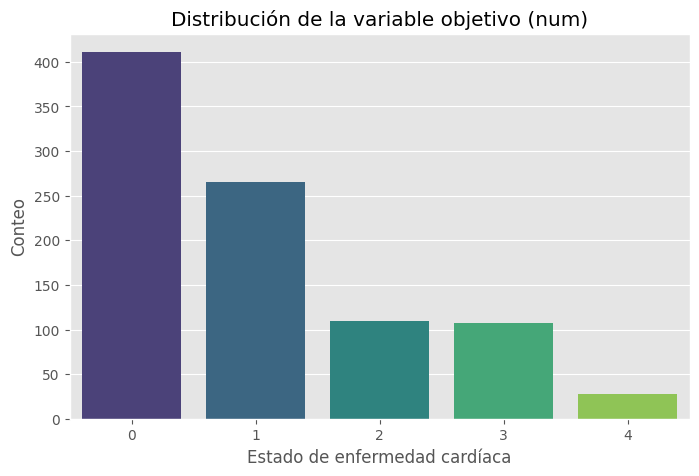

In [ ]:
# Visualizar la distribuci√≥n de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=uci_data, x='num', palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (num)')
plt.xlabel('Estado de enfermedad card√≠aca')
plt.ylabel('Conteo')
plt.show()

El gr√°fico confirma que el **nivel 0** es mayoritario, mientras que los niveles 1, 2, 3 y 4 presentan una distribuci√≥n desigual. Esta transformaci√≥n simplificar√° el an√°lisis y permitir√° construir un modelo m√°s equilibrado.

In [ ]:
uci_data['num'] = uci_data['num'].apply(lambda x: 1 if x > 0 else 0)

# Crear una copia del dataset original antes del tratamiento
uci_data_original = uci_data.copy()

Tras realizar la transformaci√≥n de la variable `num`, asignamos:
- **0**: Sin enfermedad.
- **1**: Con enfermedad.

### **Pasos Adicionales**
1. Aplicamos la transformaci√≥n directamente sobre la columna `num`:
   - Los valores mayores a 0 fueron transformados a 1.
   - Los valores iguales a 0 permanecieron sin cambios.
2. Creamos una copia del dataset (`uci_data_original`) antes de realizar tratamientos adicionales, para preservar los datos originales y realizar pruebas en modelado.

### **Visualizaci√≥n**
El gr√°fico a continuaci√≥n muestra la **distribuci√≥n actual de la variable `num`**, ya transformada en binaria:

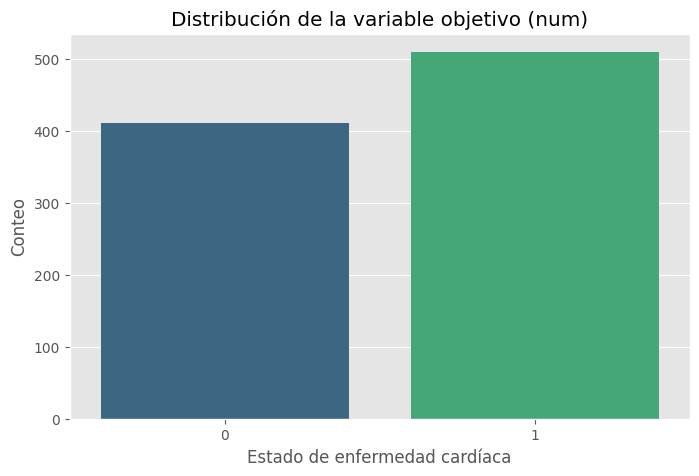

In [ ]:
# Visualizar la distribuci√≥n de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=uci_data, x='num', palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (num)')
plt.xlabel('Estado de enfermedad card√≠aca')
plt.ylabel('Conteo')
plt.show()

### **Resultados**
- La variable est√° ahora m√°s balanceada, con aproximadamente el mismo n√∫mero de pacientes sin enfermedad (`num=0`) y con enfermedad (`num=1`).
- Este balance facilitar√° el entrenamiento de modelos predictivos, reduciendo problemas asociados al desbalance de clases.

## **Paso 4.3: Identificaci√≥n de Outliers Criticos**

La identificaci√≥n de valores at√≠picos (outliers) es un paso esencial en la limpieza de los datos, ya que estos pueden influir negativamente en los resultados del an√°lisis y los modelos predictivos. En esta secci√≥n, evaluamos las principales m√©tricas estad√≠sticas del dataset para detectar posibles valores at√≠picos.


### **4.3.1. Informaci√≥n General del Dataset**

In [ ]:
uci_data.info()
uci_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
 15  num_old   920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num     num_old  
count  920.000000  920.000000  
mean     0.553261    0.995652  
std      0.497426    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    1.000000  
75%      1.000000    2.000000  
max      1.000000    4.000000

La siguiente tabla muestra un resumen estad√≠stico de las variables num√©ricas en el dataset:

| M√©trica   | `age` | `trestbps` | `chol` | `thalch` | `oldpeak` | `ca` |
|-----------|-------|------------|--------|----------|-----------|------|
| **Media** | 53.51 | 132.13     | 199.13 | 137.54   | 0.88      | 0.68 |
| **Desviaci√≥n Est√°ndar** | 9.42 | 19.07      | 110.78 | 25.93    | 1.09      | 0.94 |
| **M√≠nimo** | 28.00 | 0.00       | 0.00   | 60.00    | -2.60     | 0.00 |
| **25%**   | 47.00 | 120.00     | 175.00 | 120.00   | 0.00      | 0.00 |
| **Mediana (50%)** | 54.00 | 130.00     | 223.00 | 140.00   | 0.50      | 0.00 |
| **75%**   | 60.00 | 140.00     | 268.00 | 157.00   | 1.50      | 1.00 |
| **M√°ximo** | 77.00 | 200.00     | 603.00 | 202.00   | 6.20      | 3.00 |

### **4.3.2. Observaciones sobre Outliers**


1. **`age` (Edad)**:
   - Valores dentro de un rango esperado (28 a 77 a√±os). No se identifican valores at√≠picos claros.
   
2. **`trestbps` (Presi√≥n arterial en reposo)**:
   - Un valor m√≠nimo de `0` es imposible y debe ser investigado como posible error en los datos.
   - Otros valores parecen estar dentro de un rango cl√≠nicamente v√°lido.

3. **`chol` (Colesterol s√©rico)**:
   - Presenta valores extremos en el rango m√°ximo (`603`), que podr√≠an ser at√≠picos. Adem√°s, el valor m√≠nimo de `0` podr√≠a indicar datos faltantes o errores de entrada.

4. **`thalch` (Frecuencia card√≠aca m√°xima alcanzada)**:
   - Los valores m√≠nimos (`60`) y m√°ximos (`202`) est√°n dentro de lo esperado. No se identifican valores at√≠picos claros.

5. **`oldpeak` (Depresi√≥n ST inducida por ejercicio)**:
   - Un valor m√≠nimo de `-2.6` no es fisiol√≥gicamente v√°lido y debe ser investigado.
   - Valores m√°ximos (`6.2`) podr√≠an ser considerados extremos.

6. **`ca` (N√∫mero de vasos principales coloreados por fluoroscopia)**:
   - Distribuci√≥n discreta con un rango entre `0` y `3`, aunque el bajo n√∫mero de observaciones (309) requiere cautela.



### **4.3.3. Decisiones a Tomar**



- **Valores imposibles (`trestbps`, `chol`, `oldpeak`)**:
  - Investigaremos si estos valores representan datos faltantes o errores de entrada.
  - Consideraremos su eliminaci√≥n o imputaci√≥n en funci√≥n del contexto.
- **Outliers extremos**:
  - Evaluaremos el impacto de los valores extremos en el an√°lisis y los modelos predictivos antes de decidir su tratamiento.

### **4.3.4. An√°lisis de `trestbps = 0` y `chol = 0`**

#### **Problema Detectado**
Se identificaron valores de `trestbps = 0` (presi√≥n arterial en reposo) y `chol = 0` (colesterol s√©rico). Estos valores son fisiol√≥gicamente imposibles y representan probablemente datos err√≥neos o faltantes.

In [ ]:
# Ver a que dataset pertenecen chol = 0 o trestpbs = 0 y agrupar por dataset
print("Valores de 'chol' y 'trestbps' iguales a 0:")

zero_chol = uci_data[uci_data['chol'] == 0]
zero_trestbps = uci_data[uci_data['trestbps'] == 0]

print(f"Valores de 'chol' iguales a 0: {zero_chol.shape[0]}")
print(f"Valores de 'trestbps' iguales a 0: {zero_trestbps.shape[0]}")

# ver a que dataset pertenecen
display(zero_chol['dataset'].value_counts())

display(zero_trestbps['dataset'].value_counts())

Valores de 'chol' y 'trestbps' iguales a 0:
Valores de 'chol' iguales a 0: 172
Valores de 'trestbps' iguales a 0: 1


dataset
Switzerland      123
VA Long Beach     49
Name: count, dtype: int64

dataset
VA Long Beach    1
Name: count, dtype: int64


#### **An√°lisis Realizado**
1. **Cantidad de Valores Err√≥neos**:
   - **`chol = 0`**: Se encontraron **172 registros** con valores err√≥neos.
   - **`trestbps = 0`**: Solo se encontr√≥ **1 registro** con un valor err√≥neo.

2. **Distribuci√≥n por Dataset**:
   - Para `chol = 0`:
     - **Switzerland**: 123 registros.
     - **VA Long Beach**: 49 registros.
   - Para `trestbps = 0`:
     - **VA Long Beach**: 1 registro.



#### **Decisiones a Tomar**
- Estos valores deben ser tratados para evitar que afecten los resultados del an√°lisis. Las opciones incluyen:
  - **Eliminaci√≥n de registros** con valores fisiol√≥gicamente imposibles.
  - **Imputaci√≥n de valores** utilizando la media o mediana del dataset correspondiente.
  - **Imputaci√≥n de NaN**

Decidimos profundizar un poco m√°s para entender en qu√© datasets aparecen estos valores y qu√© proporci√≥n representan sobre el total. Esto nos permitir√° decidir c√≥mo manejarlos en el proceso de limpieza.


In [ ]:
# Ver proporcion de chol = 0 y trestbps = 0 por dataset sobre el total del dataset
print("Proporci√≥n de 'chol' y 'trestbps' iguales a 0 por dataset:")
zero_chol_prop = zero_chol['dataset'].value_counts() / uci_data['dataset'].value_counts()
zero_trestbps_prop = zero_trestbps['dataset'].value_counts() / uci_data['dataset'].value_counts()

print("Proporci√≥n de 'chol' iguales a 0:")
display(zero_chol_prop)

print("\nProporci√≥n de 'trestbps' iguales a 0:")
display(zero_trestbps_prop)



Proporci√≥n de 'chol' y 'trestbps' iguales a 0 por dataset:
Proporci√≥n de 'chol' iguales a 0:


dataset
Cleveland          NaN
Hungary            NaN
Switzerland      1.000
VA Long Beach    0.245
Name: count, dtype: float64


Proporci√≥n de 'trestbps' iguales a 0:


dataset
Cleveland          NaN
Hungary            NaN
Switzerland        NaN
VA Long Beach    0.005
Name: count, dtype: float64

#### **Resultados**

1. **Colesterol (`chol = 0`)**:
   - **Switzerland**: Todos los registros (100%) tienen este valor, lo que indica que la informaci√≥n de colesterol est√° completamente ausente.
   - **VA Long Beach**: Aproximadamente el 24.5% de los registros tienen `chol = 0`, un porcentaje considerable.

2. **Presi√≥n arterial (`trestbps = 0`)**:
   - Encontramos un solo caso en el dataset de **VA Long Beach**, que representa 0.05% del total de registros de este dataset.



### **4.3.3. Manejo de Valores Err√≥neos en `chol` y `trestbps`**


Para manejar los valores fisiol√≥gicamente imposibles encontrados en `chol` (colesterol) y `trestbps` (presi√≥n arterial en reposo), decidimos transformarlos en valores nulos (`NaN`). Esto nos permitir√° tratarlos adecuadamente en pasos posteriores, como imputaci√≥n o eliminaci√≥n.

- **`chol = 0`**: Ser√° reemplazado por `NaN` para indicar datos faltantes.
- **`trestbps = 0`**: Tambi√©n se reemplazar√° por `NaN`, dado que representa un error o dato faltante.

A continuaci√≥n, aplicamos estas transformaciones.

In [ ]:
# Convertimos chol = 0 a NaN
uci_data['chol'] = uci_data['chol'].replace(0, np.nan)

# Convertimos trestbps = 0 a NaN
uci_data['trestbps'] = uci_data['trestbps'].replace(0, np.nan)

#### **Resultados**

Los valores fisiol√≥gicamente imposibles han sido reemplazados por `NaN`. Ahora, tanto `chol` como `trestbps` reflejan correctamente los datos faltantes, lo que facilitar√° su manejo posterior.



### **4.3.4. Detecci√≥n de Outliers en Variables Categ√≥ricas**

Aunque los valores at√≠picos suelen asociarse a variables num√©ricas, tambi√©n pueden aparecer en variables categ√≥ricas en forma de categor√≠as inesperadas, errores de entrada o valores poco frecuentes que no tienen sentido en el contexto del an√°lisis. 

Para identificar posibles outliers en las variables categ√≥ricas:
1. Listamos los valores √∫nicos en cada columna categ√≥rica.
2. Contamos la frecuencia de cada valor para detectar categor√≠as con pocos registros o inconsistencias.

Este an√°lisis nos ayudar√° a determinar si hay valores problem√°ticos que necesiten ser ajustados o eliminados.


In [ ]:
# Ver outliers en categoricas

# Definir columnas categ√≥ricas
categorical_cols = uci_data.select_dtypes(include=['object']).columns

# Ver outliers en columnas categ√≥ricas
for col in categorical_cols:
    print(f"Valores √∫nicos en '{col}': {uci_data[col].unique()}")
    print(f"Conteo de valores en '{col}':")
    display(uci_data[col].value_counts())
    print("\n")




Valores √∫nicos en 'sex': ['Male' 'Female']
Conteo de valores en 'sex':


sex
Male      726
Female    194
Name: count, dtype: int64



Valores √∫nicos en 'dataset': ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Conteo de valores en 'dataset':


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64



Valores √∫nicos en 'cp': ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Conteo de valores en 'cp':


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64



Valores √∫nicos en 'fbs': [True False nan]
Conteo de valores en 'fbs':


fbs
False    692
True     138
Name: count, dtype: int64



Valores √∫nicos en 'restecg': ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Conteo de valores en 'restecg':


restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64



Valores √∫nicos en 'exang': [False True nan]
Conteo de valores en 'exang':


exang
False    528
True     337
Name: count, dtype: int64



Valores √∫nicos en 'slope': ['downsloping' 'flat' 'upsloping' nan]
Conteo de valores en 'slope':


slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64



Valores √∫nicos en 'thal': ['fixed defect' 'normal' 'reversable defect' nan]
Conteo de valores en 'thal':


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

#### **Resultados del An√°lisis**

Tras revisar las variables categ√≥ricas, encontramos los siguientes puntos destacados:

- **Valores √∫nicos detectados**: Hemos identificado las categor√≠as presentes en cada variable, as√≠ como su frecuencia.
- **Posibles outliers**:
  - Categor√≠as con muy pocos registros.


### **4.3.5. Detecci√≥n de Outliers en Variables Num√©ricas**

En esta secci√≥n, nos enfocamos en detectar valores extremos en las variables num√©ricas del dataset. Para esto:

1. Seleccionamos las columnas num√©ricas que tienen un rango continuo y valores v√°lidos.
2. Utilizamos el rango intercuart√≠lico (IQR) para calcular los l√≠mites inferior y superior de cada variable, considerando como outliers los valores que se encuentren fuera de estos l√≠mites.
3. Visualizamos los datos mediante diagramas de caja (boxplots) para observar la distribuci√≥n y los valores extremos.

Esta exploraci√≥n nos permitir√° decidir si los outliers deben ser tratados, imputados o eliminados seg√∫n su impacto en el an√°lisis.


Variable: age
Outliers detectados: 0
L√≠mite inferior: 27.50, L√≠mite superior: 79.50
Empty DataFrame
Columns: [age]
Index: []
--------------------------------------------------


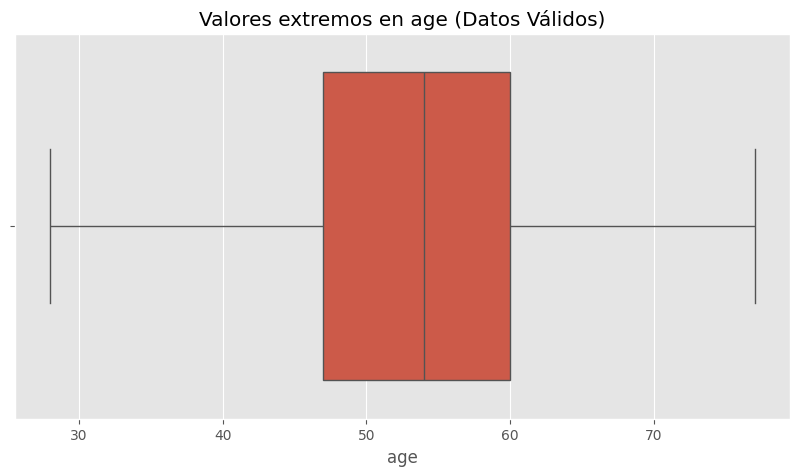

Variable: trestbps
Outliers detectados: 27
L√≠mite inferior: 90.00, L√≠mite superior: 170.00
     trestbps
14      172.0
83      180.0
126     200.0
172     174.0
183     178.0
188     192.0
201     180.0
213     178.0
231     180.0
338     190.0
375     180.0
387     180.0
475     180.0
484     180.0
548     200.0
569     180.0
595     180.0
644      80.0
647     180.0
680     200.0
700     185.0
701     200.0
727     180.0
779     178.0
854     172.0
889     180.0
896     190.0
--------------------------------------------------


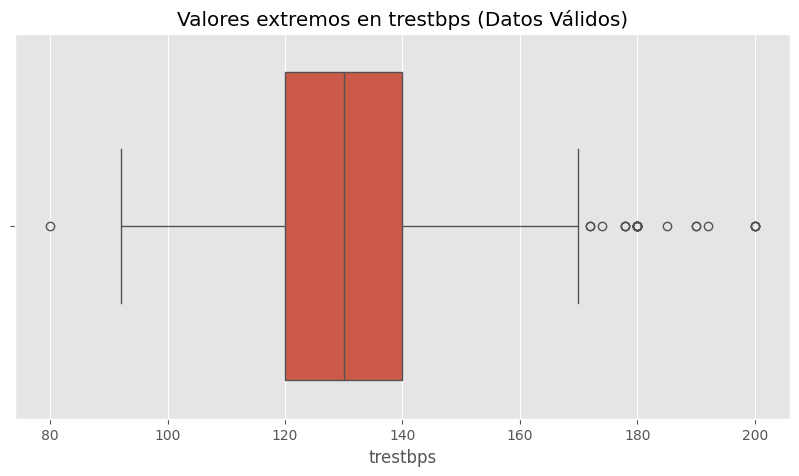

Variable: chol
Outliers detectados: 23
L√≠mite inferior: 109.88, L√≠mite superior: 376.88
      chol
48   417.0
121  407.0
152  564.0
173  394.0
181  409.0
373  412.0
431  100.0
434  468.0
461  394.0
473   85.0
500  466.0
528  529.0
531  392.0
546  603.0
566  404.0
568  518.0
576  388.0
584  491.0
595  393.0
748  100.0
800  458.0
802  384.0
918  385.0
--------------------------------------------------


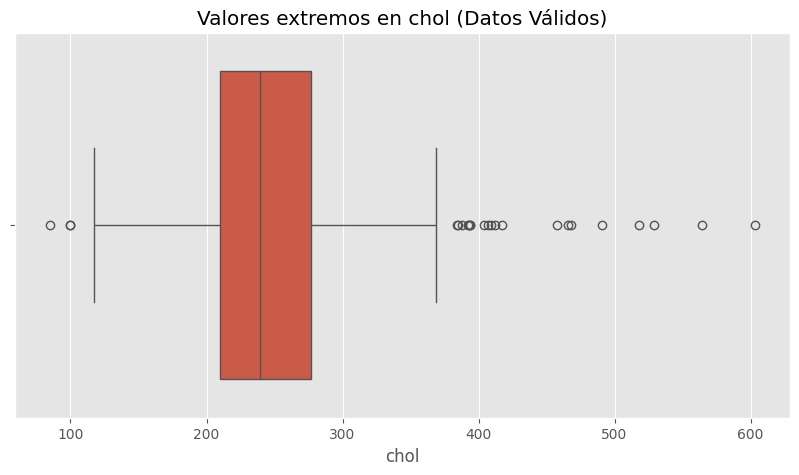

Variable: thalch
Outliers detectados: 2
L√≠mite inferior: 64.50, L√≠mite superior: 212.50
     thalch
631    60.0
677    63.0
--------------------------------------------------


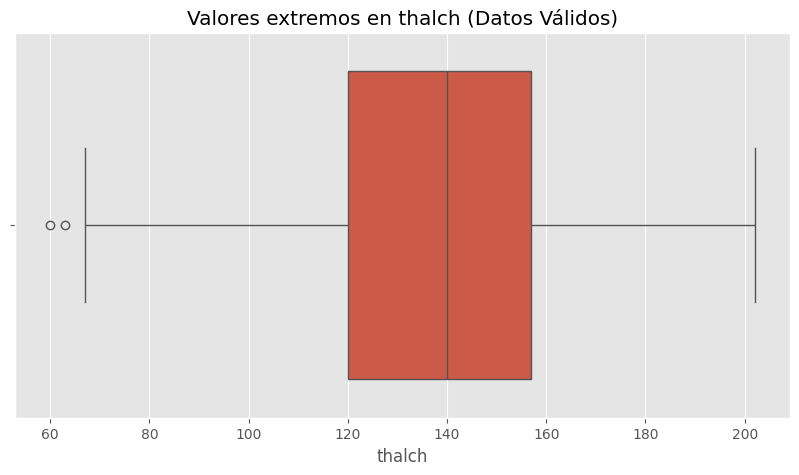

Variable: oldpeak
Outliers detectados: 29
L√≠mite inferior: -0.50, L√≠mite superior: 3.50
     oldpeak
6        3.6
69       3.6
91       6.2
108      3.6
121      4.0
123      5.6
126      4.0
183      4.2
191      4.2
211      3.8
264      3.6
285      4.4
293      4.0
567      4.0
589      5.0
603     -1.1
609     -1.5
615     -2.6
629     -0.7
653     -2.0
655     -1.0
656     -1.0
691     -0.8
696     -0.9
699      3.7
804      4.0
825      4.0
841      4.0
863      4.0
--------------------------------------------------


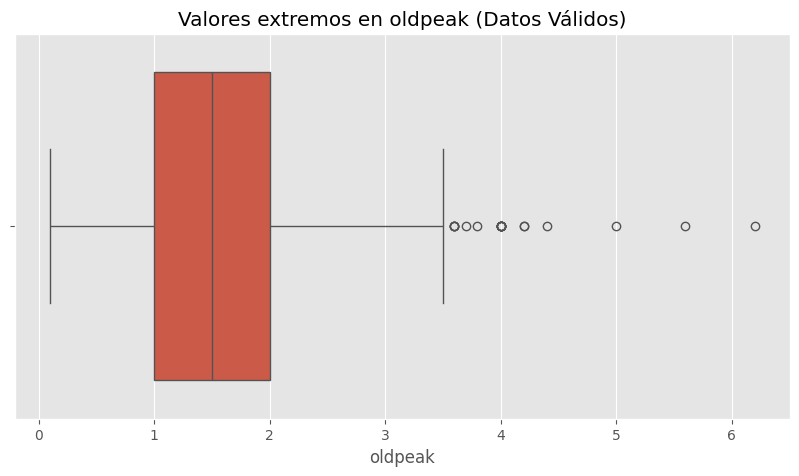

In [ ]:
# Seleccionar columnas num√©ricas
numericas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Identificar outliers
for var in numericas:
    # Filtrar valores v√°lidos (sin NaN ni valores inv√°lidos como 0 si aplica)
    data_valid = uci_data[uci_data[var] > 0][var].dropna()
    
    # Calcular l√≠mites usando IQR
    Q1 = data_valid.quantile(0.25)
    Q3 = data_valid.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    # Identificar valores extremos
    outliers = uci_data[(uci_data[var] < lower_bound) | (uci_data[var] > upper_bound)]
    
    print(f"Variable: {var}")
    print(f"Outliers detectados: {len(outliers)}")
    print(f"L√≠mite inferior: {lower_bound:.2f}, L√≠mite superior: {upper_bound:.2f}")
    print(outliers[[var]])
    print("-" * 50)
    
    # Visualizaci√≥n
    plt.figure(figsize=(10, 5))
    
    # Boxplot con valores v√°lidos
    sns.boxplot(x=data_valid)
    plt.title(f'Valores extremos en {var} (Datos V√°lidos)')
    plt.show()


#### **Resultados del An√°lisis de Outliers**

1. **`age`**:
   - No se detectaron outliers, lo que sugiere que la distribuci√≥n de esta variable est√° bien dentro de los l√≠mites esperados.

2. **`trestbps` (Presi√≥n arterial en reposo)**:
   - **27 valores extremos** fueron detectados.
   - L√≠mite inferior: **90.00**, L√≠mite superior: **170.00**.

3. **`chol` (Colesterol s√©rico)**:
   - **23 valores extremos** fueron detectados.
   - L√≠mite inferior: **109.88**, L√≠mite superior: **376.88**.

4. **`thalch` (Frecuencia card√≠aca m√°xima alcanzada)**:
   - **2 valores extremos** fueron detectados.
   - L√≠mite inferior: **64.50**, L√≠mite superior: **212.50**.

5. **`oldpeak` (Depresi√≥n ST inducida por el ejercicio)**:
   - **29 valores extremos** fueron detectados.
   - L√≠mite inferior: **-0.50**, L√≠mite superior: **3.50**.




#### **Observaciones**

- Las variables `trestbps`, `chol`, y `oldpeak` tienen un n√∫mero significativo de valores extremos que podr√≠an ser relevantes para el an√°lisis cl√≠nico o representar errores de entrada.
- En `thalch`, los outliers son pocos y est√°n dentro de un rango razonable.


### **4.3.6. Resumen de Outliers Detectados**

Tras analizar las variables num√©ricas, hemos recopilado un resumen de los valores extremos detectados:

| Variable     | Outliers Detectados | L√≠mite Inferior | L√≠mite Superior | Observaciones                                  |
|--------------|---------------------|-----------------|-----------------|-----------------------------------------------|
| **trestbps** | 27                  | 90.00           | 170.00          | Valores extremos plausibles (alta presi√≥n).   |
| **chol**     | 23                  | 109.88          | 376.88          | Valores extremos plausibles (colesterol alto).|
| **thalch**   | 2                   | 64.50           | 212.50          | Pocos outliers, revisar caso por caso.        |
| **oldpeak**  | 16                  | -0.50           | 3.50            | No hay oldpeak negativo, imputar o recortar.  |





#### **Conclusiones**

- **Valores plausibles:** Tanto en `trestbps` como en `chol`, los valores extremos detectados parecen reflejar condiciones cl√≠nicas reales, como hipertensi√≥n o colesterol alto. Estos valores no ser√°n eliminados, pero podr√≠an requerir transformaciones o normalizaci√≥n para ajustar la escala.
  
- **Revisi√≥n espec√≠fica:** En `thalch`, los outliers son muy pocos, por lo que podemos revisarlos caso por caso para decidir su tratamiento.

- **Outliers en `oldpeak`:** Los valores altos pueden indicar diferencias significativas en el estado cl√≠nico. Decidiremos entre recortarlos o imputarlos seg√∫n su relevancia.

### **4.3.7. An√°lisis de OldPeak Negativo**

Hemos detectado valores negativos en la variable `oldpeak`, lo cual no tiene sentido cl√≠nico. Antes de decidir si estos valores son errores que deben corregirse o si se trata de datos faltantes mal codificados (por ejemplo, valores que deber√≠an ser 0), analizaremos su distribuci√≥n respecto a la variable objetivo `num`:

- **Objetivo**: Determinar si los valores negativos aparecen m√°s frecuentemente en pacientes con o sin enfermedad card√≠aca (`num`).
- **Pasos**:
  1. Filtramos los registros con valores negativos en `oldpeak` y `ca`.
  2. Realizamos tablas cruzadas y calculamos proporciones por categor√≠a de `num`.




In [ ]:
# Filtrar valores negativos
negativos_oldpeak = uci_data[uci_data['oldpeak'] < 0]
negativos_ca = uci_data[uci_data['ca'] < 0]

# Tablas cruzadas por `num`
oldpeak_negativos_por_num = negativos_oldpeak['num'].value_counts()
ca_negativos_por_num = negativos_ca['num'].value_counts()

# Proporciones por categor√≠a de `num`
oldpeak_negativos_por_num_prop = negativos_oldpeak['num'].value_counts(normalize=True) * 100
ca_negativos_por_num_prop = negativos_ca['num'].value_counts(normalize=True) * 100

# Resultados
print("Valores negativos en `oldpeak` por `num`:")
display(oldpeak_negativos_por_num)
print("\nProporci√≥n de valores negativos en `oldpeak` por `num`:")
display(oldpeak_negativos_por_num_prop)



Valores negativos en `oldpeak` por `num`:


num
1    9
0    3
Name: count, dtype: int64


Proporci√≥n de valores negativos en `oldpeak` por `num`:


num
1    75.0
0    25.0
Name: proportion, dtype: float64

In [ ]:
# Contar registros con oldpeak = 0 por cada categor√≠a de num
oldpeak_zero_counts = uci_data[uci_data['oldpeak'] == 0]['num'].value_counts()

# Calcular proporciones de oldpeak = 0 por cada categor√≠a de num
oldpeak_zero_proportions = uci_data[uci_data['oldpeak'] == 0]['num'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de registros con oldpeak = 0 por categor√≠a de 'num':")
print(oldpeak_zero_counts)

print("\nProporciones de registros con oldpeak = 0 por categor√≠a de 'num':")
print(oldpeak_zero_proportions)


Conteo de registros con oldpeak = 0 por categor√≠a de 'num':
num
0    245
1    125
Name: count, dtype: int64

Proporciones de registros con oldpeak = 0 por categor√≠a de 'num':
num
0    66.216216
1    33.783784
Name: proportion, dtype: float64


#### **Resultados del An√°lisis**

##### **Valores Negativos en `oldpeak`**

- **Distribuci√≥n por `num`**:
  - **75% (9 registros)** corresponden a pacientes con enfermedad card√≠aca (`num = 1`).
  - **25% (3 registros)** corresponden a pacientes sin enfermedad card√≠aca (`num = 0`).
  
- **Proporciones**:
  - Los valores negativos est√°n mayoritariamente asociados a pacientes con enfermedad.




##### **Reflexi√≥n**

1. Si imputamos los valores negativos como 0, estar√≠amos indicando que estos pacientes (incluyendo los enfermos) tienen `oldpeak = 0`, lo que puede no tener sentido cl√≠nico, y podr√≠a ser contradictorio cl√≠nicamente, ya que sugiere que no hay cambios anormales en el segmento ST inducidos por el ejercicio, lo cual no se alinea con la presencia de enfermedad card√≠aca

2. Esto sugiere que los valores negativos podr√≠an ser errores de medici√≥n o datos faltantes mal codificados que no deber√≠an ser imputados como 0 sin una base s√≥lida.


##### **Conclusiones**
1. Es probable que los valores negativos deban ser eliminados, ya que:
   - No tienen sentido fisiol√≥gico.
   - La imputaci√≥n a 0 podr√≠a distorsionar la interpretaci√≥n cl√≠nica, especialmente en pacientes con enfermedad card√≠aca.
   - Los asignaremos como valores NaN, ya que entendemos que falta el dato correcto

2. **Relevancia de `num`**:
   - La proporci√≥n m√°s alta en pacientes con enfermedad podr√≠a ser relevante para interpretaciones futuras.



#### **Tratamiento de Valores Negativos en `oldpeak`**



Tras analizar los valores negativos en `oldpeak`, hemos concluido que no tienen sentido cl√≠nico y podr√≠an distorsionar el an√°lisis si se imputan como 0. Para evitar estos problemas, decidimos convertirlos en valores nulos (`NaN`), trat√°ndolos como datos faltantes.

Esto nos permitir√° manejarlos adecuadamente en pasos posteriores, como imputaci√≥n o exclusi√≥n durante el modelado.


In [ ]:
# Convertir valores negativos de 'oldpeak' a NaN
uci_data['oldpeak'] = uci_data['oldpeak'].apply(lambda x: np.nan if x < 0 else x)

### **Resultados**

- Todos los valores negativos en la variable `oldpeak` han sido reemplazados por `NaN`. Esto asegura que estos registros sean tratados correctamente como datos faltantes.
- Con este cambio, evitamos imputar valores que podr√≠an generar inconsistencias en el an√°lisis, especialmente en pacientes con enfermedad card√≠aca.

---

#### **Identificaci√≥n de Outliers con L√≠mites Ajustados**

En esta etapa, volvemos a analizar los outliers, aplicando l√≠mites ajustados a variables como `oldpeak` para garantizar un tratamiento m√°s realista:

- **Ajuste en `oldpeak`**: 
  - Establecemos el l√≠mite inferior como 0, ya que valores negativos no tienen sentido cl√≠nico.
  - El l√≠mite superior se calcula usando el rango intercuart√≠lico (IQR) como en el an√°lisis previo.

El objetivo es refinar la detecci√≥n de valores extremos y asegurar que los datos relevantes sean manejados correctamente en el modelo.


In [ ]:
# Detecci√≥n de outliers usando IQR con l√≠mites ajustados para oldpeak
outliers = {}
for col in ['oldpeak']:
    Q1 = uci_data[col].quantile(0.25)
    Q3 = uci_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Limitar el l√≠mite inferior a 0 para oldpeak y ca
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = uci_data[(uci_data[col] < lower_bound) | (uci_data[col] > upper_bound)][col]
    print(f"Outliers en {col}: {len(outliers[col])} (L√≠mite inferior: {lower_bound}, L√≠mite superior: {upper_bound})")


Outliers en oldpeak: 15 (L√≠mite inferior: 0, L√≠mite superior: 3.75)


#### **Resultados de Outliers con L√≠mites Ajustados**



| Variable     | Outliers Detectados | L√≠mite Inferior | L√≠mite Superior | Observaciones                                  |
|--------------|---------------------|-----------------|-----------------|-----------------------------------------------|
| **oldpeak**  | 15                  | 0               | 3.75            | Valores extremos en la parte alta del rango.  |



#### **Conclusiones**



- **Refinamiento en `oldpeak`**:
  - Al ajustar el l√≠mite inferior a 0, se detectaron 15 outliers en el rango superior, que podr√≠an estar relacionados con condiciones card√≠acas graves.


### **4.3.8. Resumen de Outliers**


Tras analizar los valores extremos en las variables num√©ricas, se establecieron las siguientes decisiones:


#### **Variables con muchos outliers**



- **`chol`, `trestbps`, `oldpeak`:**
  - **Decisi√≥n:** Aplicar **winsorizaci√≥n** para limitar los valores extremos.
  - **Justificaci√≥n:** La winsorizaci√≥n permite mantener la estructura general de los datos limitando los valores extremos a un rango aceptable, en lugar de eliminarlos. Esto asegura que no se pierda informaci√≥n valiosa que podr√≠a ser cl√≠nicamente relevante.


#### **Variables con pocos outliers**


- **`thalch`:**
  - **Decisi√≥n:** No aplicar ning√∫n tratamiento adicional.
  - **Comprobaci√≥n:** Revisar manualmente los registros asociados a los outliers.
  - **Justificaci√≥n:** La peque√±a cantidad de outliers detectados no afecta significativamente las m√©tricas descriptivas ni el rendimiento esperado del modelo.


#### **Variables sin outliers**


- **`age`:**
  - **Decisi√≥n:** No realizar ning√∫n cambio.
  - **Justificaci√≥n:** La distribuci√≥n de esta variable no presenta irregularidades ni valores extremos, lo que sugiere que ya est√° lista para el an√°lisis.



### **4.3. Tratamiento de outliers**

### **4.3.1. Aplicaci√≥n de Capping (Winsorizaci√≥n)**


Para mitigar el impacto de los valores extremos en las variables num√©ricas, aplicamos el m√©todo de capping, tambi√©n conocido como winsorizaci√≥n. Este m√©todo consiste en limitar los valores extremos a un rango basado en percentiles seleccionados.


#### **Pasos:**

1. **Calcular los l√≠mites**:
   - Para cada variable, calculamos el percentil inferior (1%) y el superior (99%).
   - En el caso de `oldpeak`, ajustamos manualmente el l√≠mite inferior a 0 para evitar valores negativos.

2. **Aplicar winsorizaci√≥n**:
   - Los valores por debajo del l√≠mite inferior se establecen en el l√≠mite inferior.
   - Los valores por encima del l√≠mite superior se establecen en el l√≠mite superior.


Nuevos l√≠mites para chol: 133.19 - 451.03
Nuevos l√≠mites para trestbps: 95.00 - 180.00
Nuevos l√≠mites para oldpeak: 0.00 - 4.00
L√≠mites ajustados manualmente para oldpeak: (0.0, 4.0)
Nuevos l√≠mites para thalch: 75.56 - 186.36


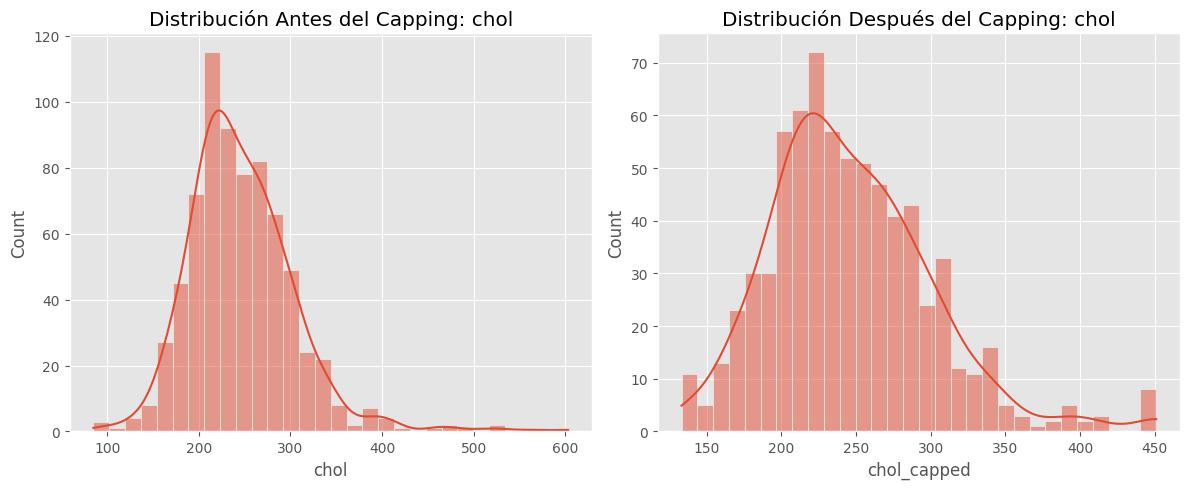

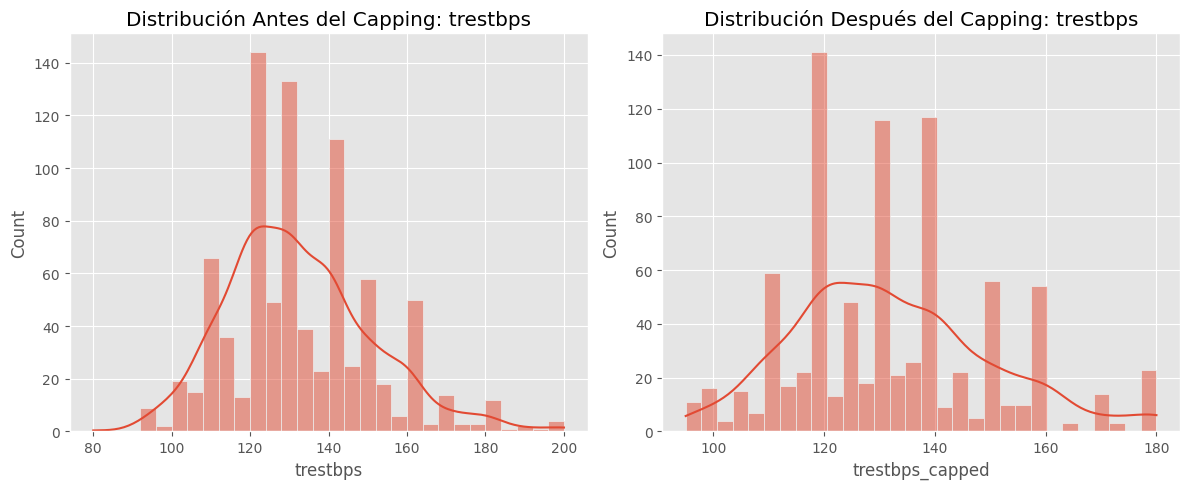

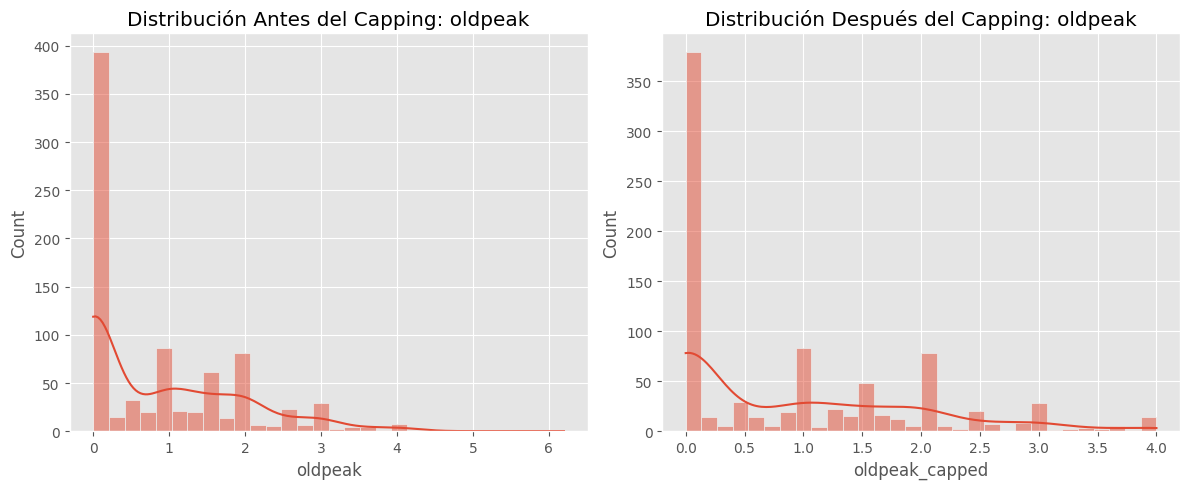

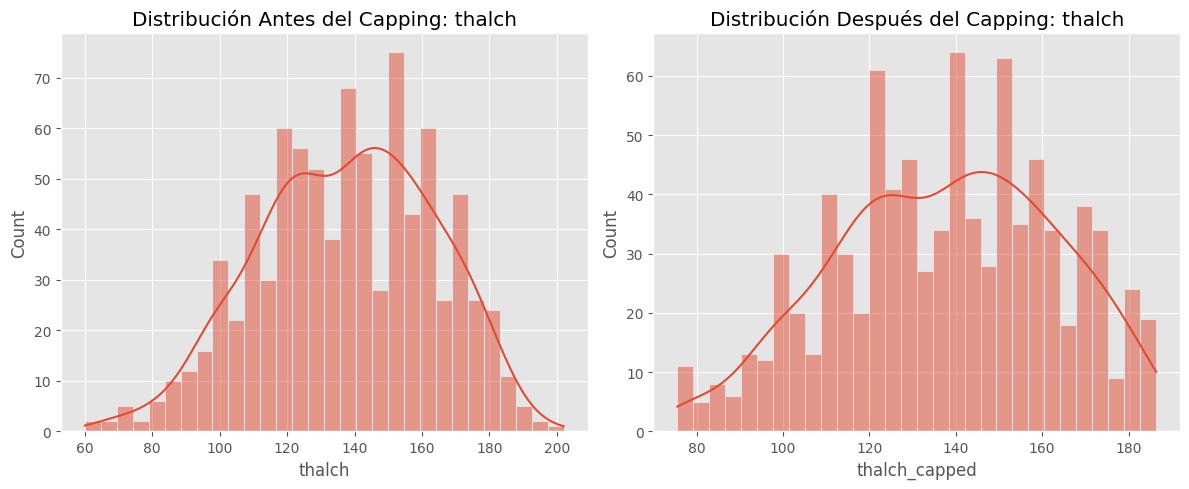

In [ ]:
# Calcular l√≠mites basados en percentiles
def recalcular_limites(data, variable, perc_inf=0.01, perc_sup=0.99):
    lower = data[variable].quantile(perc_inf)
    upper = data[variable].quantile(perc_sup)
    print(f"Nuevos l√≠mites para {variable}: {lower:.2f} - {upper:.2f}")
    return lower, upper

# Aplicar para variables num√©ricas relevantes
variables_outliers = ['chol', 'trestbps', 'oldpeak', 'thalch']
nuevos_limites = {}

for var in variables_outliers:
    if var in ['oldpeak']:  # Ajustar manualmente el l√≠mite inferior para oldpeak
        lower, upper = recalcular_limites(uci_data, var)
        lower = max(lower, 0)  # Aseguramos que no haya valores negativos
        nuevos_limites[var] = (lower, upper)
        print(f"L√≠mites ajustados manualmente para {var}: {nuevos_limites[var]}")
    else:
        nuevos_limites[var] = recalcular_limites(uci_data, var)

# Aplicar capping (winsorizaci√≥n) con los nuevos l√≠mites
for var, (lower, upper) in nuevos_limites.items():
    plt.figure(figsize=(12, 5))
    
    # Antes del ajuste
    plt.subplot(1, 2, 1)
    sns.histplot(uci_data[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribuci√≥n Antes del Capping: {var}')
    
    # Aplicar capping
    uci_data[f'{var}_capped'] = np.where(uci_data[var] < lower, lower, uci_data[var])
    uci_data[f'{var}_capped'] = np.where(uci_data[f'{var}_capped'] > upper, upper, uci_data[f'{var}_capped'])
    
    # Despu√©s del ajuste
    plt.subplot(1, 2, 2)
    sns.histplot(uci_data[f'{var}_capped'].dropna(), kde=True, bins=30)
    plt.title(f'Distribuci√≥n Despu√©s del Capping: {var}')
    
    plt.tight_layout()
    plt.show()


#### **Resultados del Capping**

| Variable     | L√≠mite Inferior | L√≠mite Superior | Observaciones                                  |
|--------------|-----------------|-----------------|-----------------------------------------------|
| **chol**     | 133.19          | 451.03          | Reducci√≥n de valores extremadamente altos.    |
| **trestbps** | 95.00           | 180.00          | Se ajustaron valores extremos superiores.     |
| **oldpeak**  | 0.00            | 4.00            | L√≠mite inferior ajustado manualmente a 0.     |
| **thalch**   | 75.56           | 186.36          | Los valores superiores se ajustaron.          |


#### **Impacto del Capping:**
- En las visualizaciones de cada variable, se observa c√≥mo los valores extremos fueron suavizados, preservando la estructura general de la distribuci√≥n.
- Los gr√°ficos comparan la distribuci√≥n antes y despu√©s del capping, mostrando un ajuste significativo en las colas de las distribuciones.

#### **Conclusiones del capping y ajuste de l√≠mites:**

1. **`chol` (Colesterol s√©rico):**
   - **Nuevos l√≠mites:** **133.19 - 451.03**.
   - **Antes del ajuste:** Valores extremos por encima de 500 distorsionaban la distribuci√≥n.
   - **Despu√©s del ajuste:** Los valores extremos fueron limitados, preservando la forma general.
   - **Impacto esperado:** Mejora en la estabilidad de la variable sin p√©rdida significativa de informaci√≥n.

2. **`trestbps` (Presi√≥n arterial en reposo):**
   - **Nuevos l√≠mites:** **95.00 - 180.00**.
   - **Antes del ajuste:** Valores extremos principalmente en el rango superior.
   - **Despu√©s del ajuste:** Se redujeron los extremos manteniendo la variabilidad natural.
   - **Impacto esperado:** Los modelos ser√°n menos sensibles a valores extremos, mejorando la robustez.

3. **`oldpeak` (Depresi√≥n del ST inducida):**
   - **L√≠mites ajustados manualmente:** **0.00 - 4.00**.
   - **Antes del ajuste:** Valores negativos y extremos superiores presentes.
   - **Despu√©s del ajuste:** Valores negativos reemplazados por 0 y extremos superiores limitados.
   - **Observaciones adicionales:**
     - La variable muestra agrupaciones claras en valores como 1, 2, 3 y en puntos intermedios (por ejemplo, 0.5, 1.5, 2.5). Esto sugiere que una futura **agregaci√≥n en grupos** podr√≠a preservar la interpretaci√≥n cl√≠nica.

     - Dado el desbalance en esta variable y su relaci√≥n con el objetivo del modelo (predecir enfermedad card√≠aca), podr√≠a ser viable **simplificar a una clasificaci√≥n binaria**:

       - **0:** Coraz√≥n saludable.
       - **1:** Potencialmente enfermo.    
   - **Impacto esperado:** Mejora en la coherencia biol√≥gica de los datos y un an√°lisis m√°s interpretable.

4. **`thalch` (Frecuencia card√≠aca m√°xima):**
   - **Nuevos l√≠mites:** **75.56 - 186.36**.
   - **Antes del ajuste:** Algunos valores extremos observados.
   - **Despu√©s del ajuste:** Se limitaron los valores extremos sin modificar significativamente la distribuci√≥n.
   - **Impacto esperado:** Mejora en la robustez del an√°lisis manteniendo la informaci√≥n √∫til.

5. **General:**
   - Las variables ajustadas mantienen su distribuci√≥n principal, evitando la distorsi√≥n por valores extremos.
   - El proceso de capping preserva la mayor parte de la informaci√≥n √∫til de cada variable, mejorando la calidad de los datos para el modelado.


### **4.3.3. An√°lisis de la Variable `ca` (N√∫mero de Vasos Principales)**


La variable `ca` indica el n√∫mero de vasos principales coloreados por fluoroscopia, con valores entre 0 y 3. Este an√°lisis busca explorar su distribuci√≥n y frecuencia para evaluar si es necesario alg√∫n tratamiento adicional.


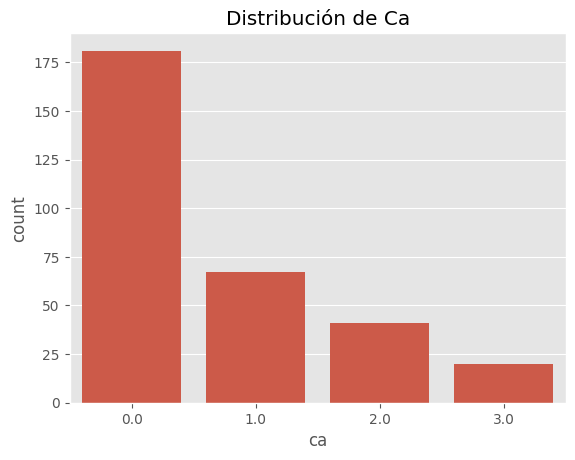

In [ ]:
# Ca: Distribuci√≥n
sns.countplot(data=uci_data, x='ca')
plt.title("Distribuci√≥n de Ca")
plt.show()

In [ ]:
# Ver cantidad de valores en cada Ca
uci_data['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

#### **Resultados del An√°lisis de `ca`**

#### **Distribuci√≥n de `ca`**
- **Frecuencias**:
  - **0.0 (Sin vasos coloreados):** **181 observaciones** (grupo mayoritario).
  - **1.0:** **67 observaciones**.
  - **2.0:** **41 observaciones**.
  - **3.0:** **20 observaciones** (grupo minoritario).




#### **Observaciones**
1. **Desbalance en la distribuci√≥n**:
   - Existe un desbalance evidente, con la mayor√≠a de las observaciones concentradas en `ca = 0`.
   - Los valores `ca = 2` y `ca = 3` tienen muy pocas observaciones, lo que podr√≠a dificultar su uso en el modelado.
2. **Relevancia cl√≠nica**:
   - `ca` podr√≠a ser un predictor clave para la variable objetivo (`num`), ya que representa caracter√≠sticas fisiol√≥gicas importantes.

In [ ]:
# Eliminamos las variables que hemos tratado
variables_eliminar = ['oldpeak', 'chol', 'trestbps', 'thalch']

# Eliminar variables originales
uci_data.drop(variables_eliminar, axis=1, inplace=True)


## **Paso 4.4: An√°lisis Exploratorio NaN**

### **4.4.1. An√°lisis Exploratorio de Valores Faltantes**

Es fundamental identificar y analizar las columnas con valores faltantes (`NaN`) para decidir estrategias de imputaci√≥n o manejo de estos datos en pasos posteriores.




#### **Objetivos**
1. Calcular el porcentaje de valores faltantes por columna.
2. Ordenar las variables con valores faltantes en funci√≥n de su porcentaje.
3. Identificar columnas con un alto porcentaje de `NaN` que puedan requerir atenci√≥n especial.

In [ ]:
# Calcular porcentaje de valores faltantes por columna
missing_percent = uci_data.isnull().sum() / len(uci_data) * 100

# Crear un DataFrame ordenado por porcentaje de valores faltantes
missing_df = missing_percent[missing_percent > 0].sort_values(ascending=False).reset_index()
missing_df.columns = ['Variable', 'Porcentaje de Valores Faltantes']

# Mostrar el resultado
print(missing_df)

          Variable  Porcentaje de Valores Faltantes
0               ca                        66.413043
1             thal                        52.826087
2            slope                        33.586957
3      chol_capped                        21.956522
4              fbs                         9.782609
5   oldpeak_capped                         8.043478
6  trestbps_capped                         6.521739
7            exang                         5.978261
8    thalch_capped                         5.978261
9          restecg                         0.217391


#### **Resultados del An√°lisis de Valores Faltantes**

#### **Variables con Valores Faltantes y sus Porcentajes**
1. **Variables con m√°s del 50% de `NaN`:**
   - `ca` (66.41%): Elevado porcentaje de valores faltantes, requerir√° estrategias avanzadas de imputaci√≥n o eliminaci√≥n.
   - `thal` (52.83%): Otro caso cr√≠tico que podr√≠a influir significativamente en el an√°lisis.

2. **Variables con entre 5% y 33% de `NaN`:**
   - `slope` (33.59%): Relativamente alto, pero posiblemente imputable.
   - `chol_capped` (21.96%): Valores faltantes moderados, imputaci√≥n posible con m√©tricas como la media o mediana.
   - `fbs`, `oldpeak_capped` (~8-10%): Impacto moderado.
   - `trestbps_capped`, `thalch_capped`) (~6%): Valores faltantes manejables.

3. **Variables con menos del 1% de `NaN`:**
   - `restecg` (0.22%): Poca influencia en el an√°lisis, posiblemente eliminable o imputable sin problemas.




#### **Observaciones Clave**
- **Impacto en las variables clave:**
  - Las variables `ca`, `thal`, y `slope` tienen un alto porcentaje de valores faltantes y pueden requerir un an√°lisis cuidadoso para decidir si imputarlas o eliminarlas.

 

### **4.4.2. Mapa de Calor por Dataset**


Para identificar patrones en los valores faltantes, generamos un mapa de calor por cada dataset presente en los datos. Este an√°lisis nos permitir√° observar c√≥mo se distribuyen los valores faltantes en las distintas columnas, ayud√°ndonos a decidir c√≥mo manejar cada caso.



#### **Objetivos**
1. Visualizar valores faltantes (`NaN`) por dataset.
2. Identificar si los valores faltantes siguen un patr√≥n espec√≠fico seg√∫n el origen de los datos (`dataset`).
3. Determinar si ciertos datasets presentan m√°s problemas de calidad que otros.

Valores √∫nicos en 'dataset':
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


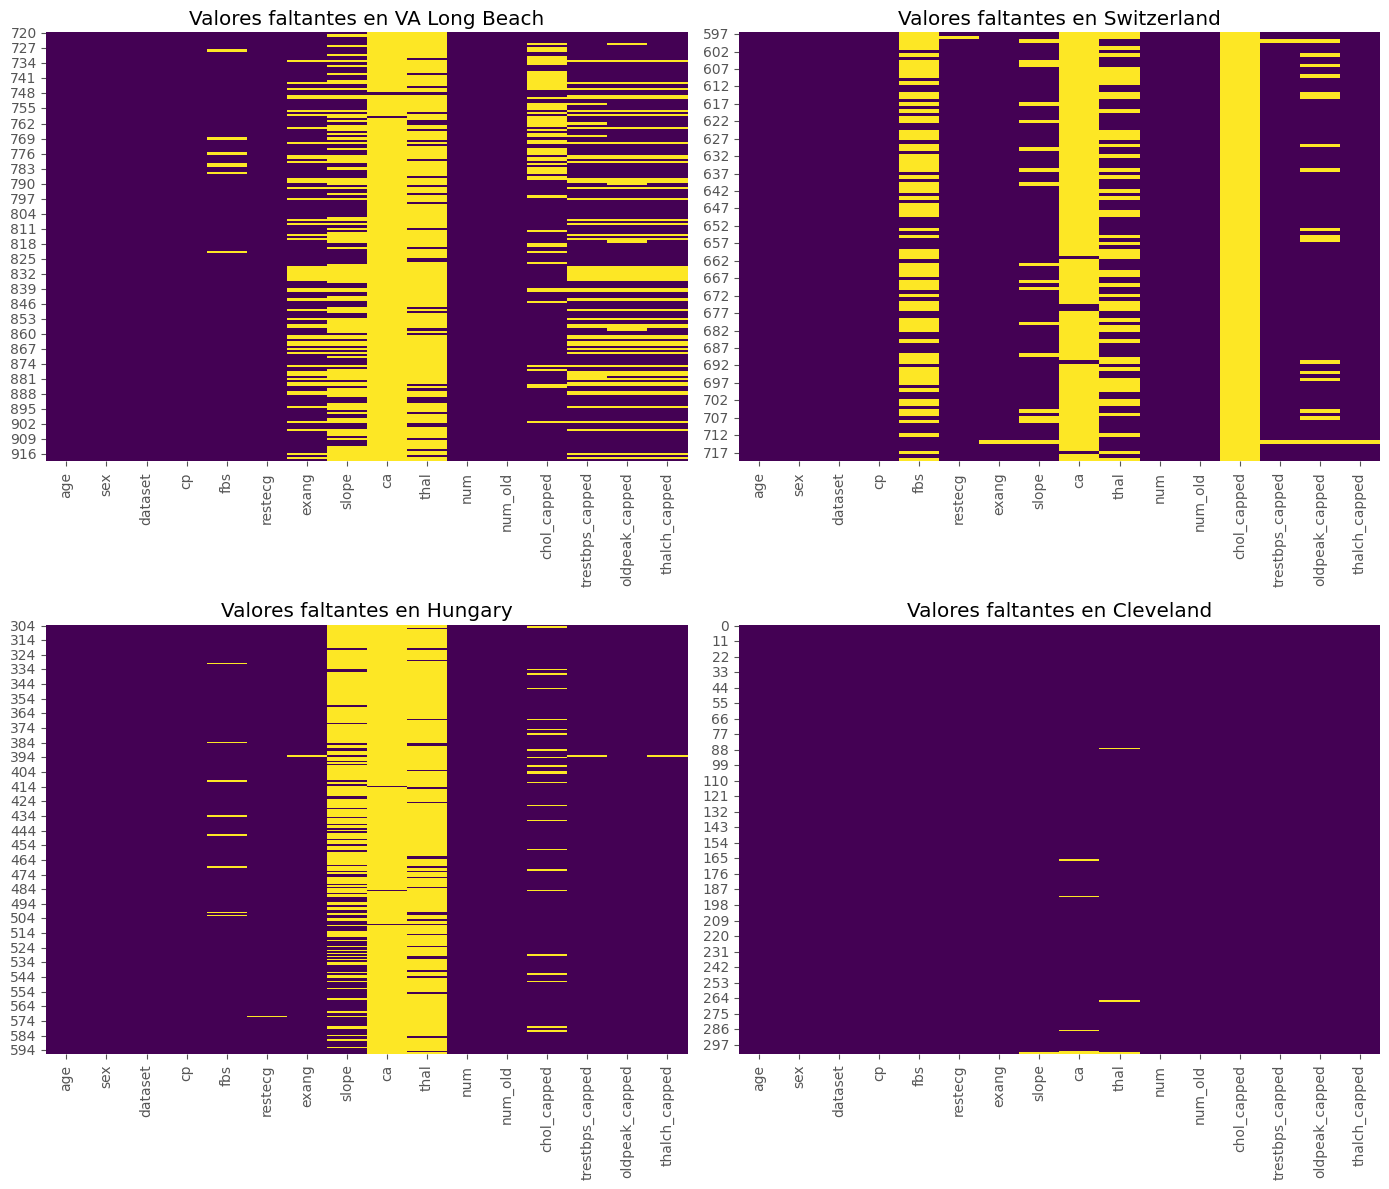

In [ ]:
# Verificar los valores √∫nicos en 'dataset' para asegurarse de que existen todos los esperados
print("Valores √∫nicos en 'dataset':")
print(uci_data['dataset'].unique())


# 3. Crear mapa de calor para valores faltantes (incluyendo 'thalch_group')
datasets = ['VA Long Beach', 'Switzerland', 'Hungary', 'Cleveland']
datasets_present = [d for d in datasets if d in uci_data['dataset'].unique()]

# Ajustar el n√∫mero de filas y columnas seg√∫n los datasets presentes
cols = 2
rows = (len(datasets_present) + cols - 1) // cols  # Redondear hacia arriba

# Crear subgr√°ficos
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

for i, dataset in enumerate(datasets_present):
    data_subset = uci_data[uci_data['dataset'] == dataset]
    sns.heatmap(data_subset.isnull(), cbar=False, cmap="viridis", ax=axes[i])
    axes[i].set_title(f"Valores faltantes en {dataset}")

# Eliminar gr√°ficos vac√≠os sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### **Resultados del Mapa de Calor**

#### **An√°lisis por Dataset**
1. **Cleveland:**
   - Presenta muy pocos valores faltantes, siendo el dataset con la mejor calidad de datos.
   - **Conclusi√≥n:** Se puede usar sin necesidad de imputaciones significativas.

2. **Hungary:**
   - Algunos valores faltantes se concentran en variables espec√≠ficas como `thal` y `slope`.
   - **Conclusi√≥n:** Requiere imputaci√≥n moderada para estas variables.

3. **Switzerland:**
   - Alta proporci√≥n de valores faltantes en varias columnas clave, incluyendo `ca`, `thal`, y `slope`.
   - **Conclusi√≥n:** Requiere una estrategia cuidadosa; en caso de ser cr√≠tico, podr√≠a considerarse excluir.

4. **VA Long Beach:**
   - Similar a Switzerland, con muchas columnas afectadas por valores faltantes, especialmente `ca`.
   - **Conclusi√≥n:** Necesita un an√°lisis m√°s detallado para decidir si imputar o excluir.




#### **Observaciones Clave**
- Los valores faltantes no est√°n distribuidos aleatoriamente, sino que dependen del origen (`dataset`).


### **4.4.3. An√°lisis de Datos Faltantes por Dataset**


#### Observaciones Generales:
- **Cleveland:** El dataset m√°s completo con muy pocos datos faltantes.
- **Hungr√≠a:** Tiene gran parte de sus registros sin las variables `ca`, `thal`, y `slope`, siendo `slope` la m√°s completa entre ellas.
- **Suiza:** Todos los valores de `chol` son 0 (interpretados como faltantes) y cuenta con pocas pruebas para `ca` y `thal`.
- **VA Long Beach:** Presenta un alto n√∫mero de valores faltantes en `ca`, `thal`, y `slope`, as√≠ como en variables importantes como `chol`, `trestbps`, `thalch`, `exang`, y `oldpeak`.


#### Visualizaci√≥n:
Se generar√° un gr√°fico de barras apiladas que muestra:
1. **Total de Datos:** Representa el total te√≥rico de registros en cada dataset.
2. **Valores Faltantes:** Suma de todos los valores faltantes (NaN) en cada dataset.

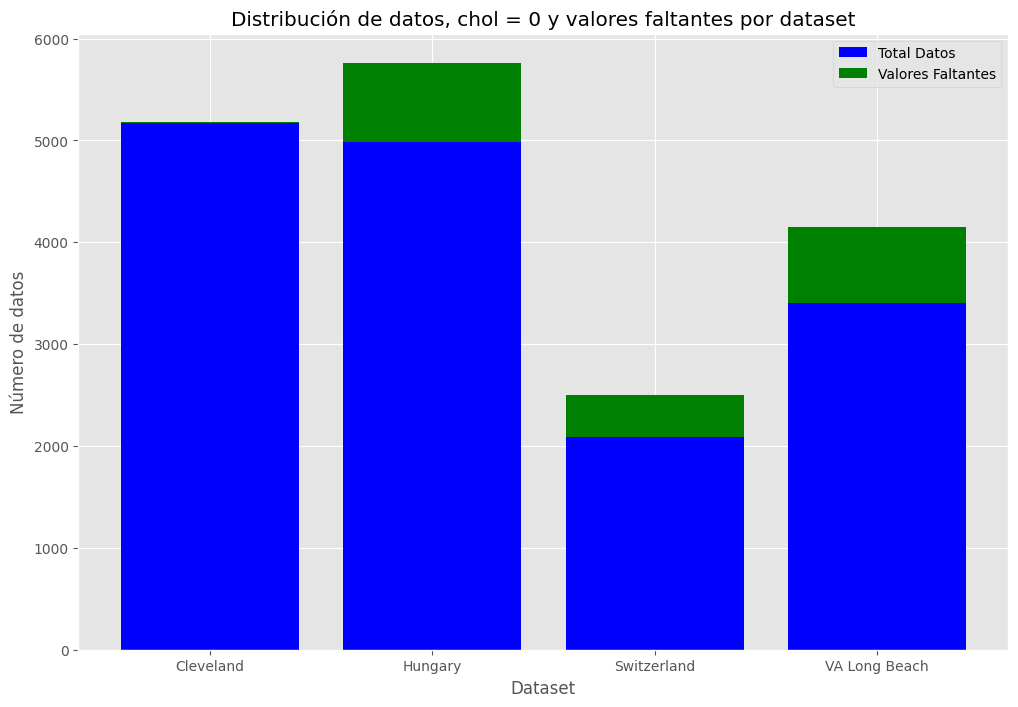

In [ ]:
# Calcular el total de valores faltantes por dataset
uci_data['total_nan'] = uci_data.isnull().sum(axis=1)
nan_by_dataset = uci_data.groupby('dataset')['total_nan'].sum()

# Calcular el total de datos por dataset
total_data_by_dataset = uci_data.groupby('dataset').size() * uci_data.shape[1]

# Crear un DataFrame con los datos necesarios para el gr√°fico
chol_summary_plot = pd.DataFrame({
    'Dataset': ['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
    'Total Datos': [total_data_by_dataset['Cleveland'], total_data_by_dataset['Hungary'], total_data_by_dataset['Switzerland'], total_data_by_dataset['VA Long Beach']],
    'Valores Faltantes': [nan_by_dataset['Cleveland'], nan_by_dataset['Hungary'], nan_by_dataset['Switzerland'], nan_by_dataset['VA Long Beach']]
})

# Crear el gr√°fico de barras apiladas
plt.figure(figsize=(12, 8))
bar_width = 0.5
bar_positions = range(len(chol_summary_plot))

plt.bar(bar_positions, chol_summary_plot['Total Datos'], color='blue', label='Total Datos')
plt.bar(bar_positions, chol_summary_plot['Valores Faltantes'], bottom=chol_summary_plot['Total Datos'], color='green', label='Valores Faltantes')

plt.xlabel('Dataset')
plt.ylabel('N√∫mero de datos')
plt.title('Distribuci√≥n de datos, chol = 0 y valores faltantes por dataset')
plt.xticks(bar_positions, chol_summary_plot['Dataset'])
plt.legend()

plt.show()

uci_data = uci_data.drop('total_nan', axis=1)

#### **Conclusiones del Gr√°fico**


##### Cleveland
- **Estado:** Pr√°cticamente completo, con muy pocos valores faltantes.

##### Hungr√≠a
- **Debilidad:** Falta una gran cantidad de registros para variables clave como `ca`, `thal`, y `slope`.

##### Suiza
- **Problema destacado:** Todos los valores de `chol` son 0, adem√°s de tener muy pocos registros para `ca` y `thal`.

##### VA Long Beach
- **Situaci√≥n cr√≠tica:** Altos niveles de valores faltantes en variables clave, lo que reduce la calidad general del dataset.

##### Decisi√≥n:
Es necesario analizar si estos valores faltantes son aleatorios o tienen patrones espec√≠ficos (por ejemplo, relacionados con la variable objetivo). Adem√°s, podr√≠amos considerar la imputaci√≥n o exclusi√≥n de algunos datasets con una cantidad excesiva de datos faltantes para mantener la robustez del an√°lisis.


### **4.4.4. An√°lisis de Proporci√≥n de Registros Inv√°lidos vs V√°lidos por Dataset**


#### Contexto:
- Se identific√≥ previamente que **Suiza** es el dataset con menor proporci√≥n de registros v√°lidos.
- **VA Long Beach** tiene m√°s registros que Suiza, pero una alta cantidad de datos faltantes que impactan negativamente en la calidad del dataset.



#### Objetivo:
- Comparar la proporci√≥n de registros inv√°lidos con los v√°lidos dentro de cada dataset.
- Visualizar la distribuci√≥n de datos faltantes por dataset para confirmar las conclusiones preliminares.

Valores √∫nicos en 'dataset':
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


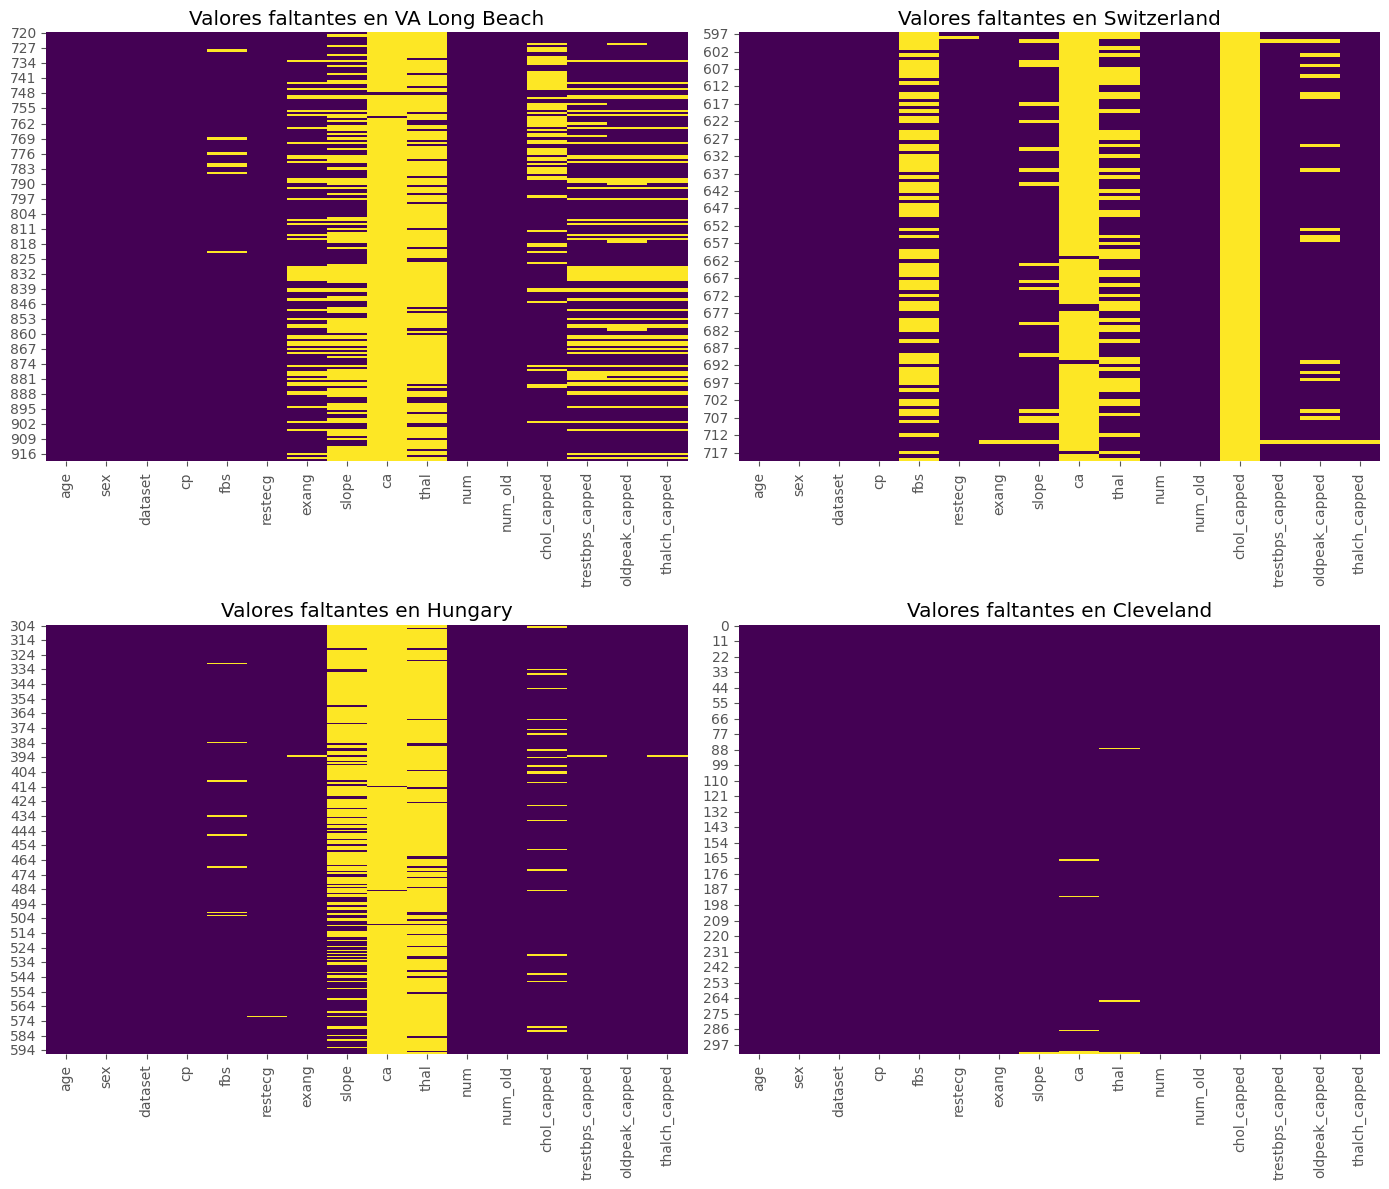

In [ ]:
# Verificar los valores √∫nicos en 'dataset' para asegurarse de que existen todos los esperados
print("Valores √∫nicos en 'dataset':")
print(uci_data['dataset'].unique())


# 3. Crear mapa de calor para valores faltantes (incluyendo 'thalch_group')
datasets = ['VA Long Beach', 'Switzerland', 'Hungary', 'Cleveland']
datasets_present = [d for d in datasets if d in uci_data['dataset'].unique()]

# Ajustar el n√∫mero de filas y columnas seg√∫n los datasets presentes
cols = 2
rows = (len(datasets_present) + cols - 1) // cols  # Redondear hacia arriba

# Crear subgr√°ficos
fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

for i, dataset in enumerate(datasets_present):
    data_subset = uci_data[uci_data['dataset'] == dataset]
    sns.heatmap(data_subset.isnull(), cbar=False, cmap="viridis", ax=axes[i])
    axes[i].set_title(f"Valores faltantes en {dataset}")

# Eliminar gr√°ficos vac√≠os sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **Conclusiones del An√°lisis Visual de Datos Faltantes**


1. **VA Long Beach:**
   - Gran cantidad de valores faltantes en m√∫ltiples variables clave (`ca_group`, `thal`, `slope`, entre otras).
   - Este dataset tiene m√°s registros totales que Suiza, pero la calidad general se ve comprometida por la cantidad de datos inv√°lidos.

2. **Suiza:**
   - Presenta la menor proporci√≥n de datos v√°lidos.
   - Variables cr√≠ticas como `chol` est√°n completamente ausentes (`chol = 0` en todos los casos).

3. **Hungr√≠a:**
   - Aunque mejor que Suiza y VA Long Beach, carece de valores suficientes en variables como `ca`, `thal`, y `slope`.
   - Esto podr√≠a afectar el an√°lisis si se utilizan estas variables de manera predominante.

4. **Cleveland:**
   - Es el dataset m√°s robusto y completo.
   - Pr√°cticamente no tiene valores faltantes, lo que lo hace ideal para an√°lisis confiable y comparaciones.





## **Paso 4.5. Clasificaci√≥n del tipo de datos faltantes (MCAR, MAR, MNAR)**

### **Objetivo:**
Determinar el tipo de datos faltantes para establecer estrategias de imputaci√≥n adecuadas.




#### **Clasificaciones posibles:**
1. **MCAR (Missing Completely At Random):** 
   - Los valores faltantes no tienen relaci√≥n con ninguna variable del dataset.
   - Ejemplo: Un error t√©cnico al recolectar los datos.
   
2. **MAR (Missing At Random):**
   - Los valores faltantes est√°n relacionados con otras variables del dataset.
   - Ejemplo: Falta de datos `chol` relacionada con el pa√≠s (`dataset`).

3. **MNAR (Missing Not At Random):**
   - Los valores faltantes dependen de la propia variable faltante.
   - Ejemplo: Pacientes con valores altos de `ca` no reportaron el resultado.



### **Procedimiento para Clasificaci√≥n:**
1. **An√°lisis de patrones de valores faltantes:**
   - Relacionar las variables faltantes con otras variables relevantes.
   
2. **Pruebas estad√≠sticas:**
   - Utilizar pruebas para identificar si los datos son completamente al azar.

3. **Visualizaci√≥n:**
   - Evaluar gr√°ficos para identificar patrones claros de datos faltantes relacionados con otras variables.

4. **Hip√≥tesis de imputaci√≥n:**
   - Si se identifican patrones MAR o MNAR, dise√±ar imputaciones espec√≠ficas para preservar la relaci√≥n subyacente.



## **Paso 4.5.1. B√∫squeda de patrones en los datos faltantes**

### **Visualizaci√≥n de la matriz de valores faltantes**

<Axes: >

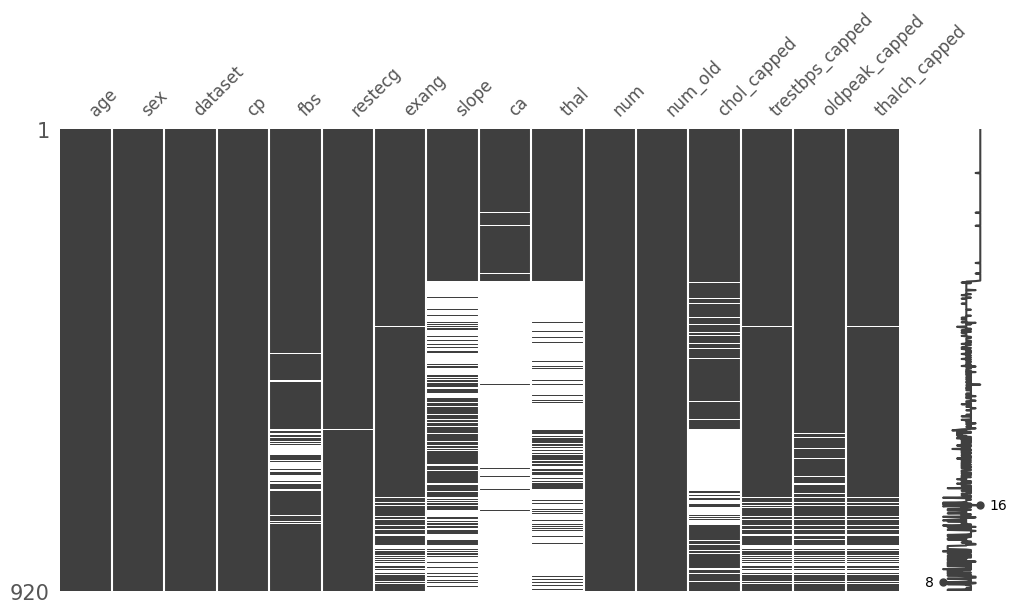

In [ ]:
import missingno as msno

# Visualizaci√≥n de la matriz de valores faltantes
msno.matrix(uci_data, figsize=(12, 6), fontsize=12)



#### **Observaciones clave:**

1. **Patrones de datos faltantes:**
   - Variables como `ca`, `thal`, y `slope` tienen una cantidad considerable de valores faltantes.
   - Se observa una tendencia donde los valores faltantes en `ca` coinciden parcialmente con los de otras variables como `thal` y slope.

2. **Implicaciones:**
   - Es probable que los valores faltantes no sean completamente al azar (no MCAR).
   - Necesitamos explorar m√°s a fondo si los valores faltantes est√°n relacionados con otras variables (MAR) o con las mismas variables (MNAR).

### **Paso 4.5.2. Relaciones entre las variables con valores faltantes**

Se analiza la relaci√≥n entre las variables con valores faltantes (`slope`, `thal`, `ca_group`) utilizando la prueba de Chi-cuadrado para evaluar si los valores faltantes podr√≠an estar relacionados.

In [ ]:
from scipy.stats import chi2_contingency

# Combinaciones a analizar
combinations = [('slope', 'thal'), ('slope', 'ca'), ('thal', 'ca')]

for var1, var2 in combinations:
    contingency_table = pd.crosstab(uci_data[var1], uci_data[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-cuadrado entre {var1} y {var2}: Estad√≠stico={chi2:.4f}, p-valor={p:.4f}")



Chi-cuadrado entre slope y thal: Estad√≠stico=42.7067, p-valor=0.0000
Chi-cuadrado entre slope y ca: Estad√≠stico=9.6960, p-valor=0.1381
Chi-cuadrado entre thal y ca: Estad√≠stico=21.0646, p-valor=0.0018


#### **Resultados del an√°lisis de Chi-cuadrado**
Se realiz√≥ un an√°lisis de contingencia para evaluar si las variables con valores faltantes est√°n relacionadas entre s√≠. Los resultados muestran lo siguiente:

1. **Relaci√≥n entre `slope` y `thal`:**
   - **Estad√≠stico Chi-cuadrado:** 42.7067
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Existe una fuerte relaci√≥n entre estas variables. Es probable que los valores faltantes de una est√©n asociados con los de la otra.

2. **Relaci√≥n entre `slope` y `ca`:**
   - **Estad√≠stico Chi-cuadrado:** 9.6960
   - **p-valor:** 0.1381
   - **Conclusi√≥n:** No Existe una relaci√≥n significativa entre estas variables.

3. **Relaci√≥n entre `thal` y `ca`:**
   - **Estad√≠stico Chi-cuadrado:** 21.0646
   - **p-valor:** 0.0018
   - **Conclusi√≥n:** Existe una relaci√≥n considerablemente significativa entre estas variables, lo que refuerza la necesidad de tratarlas conjuntamente.



### **Implicaciones:**
- Los valores faltantes en estas variables no son independientes entre s√≠. Esto indica que probablemente estamos ante un caso de **MAR (Missing At Random)**, donde los valores faltantes de una variable est√°n relacionados con otra.
- Este an√°lisis respalda que, para imputar valores faltantes, ser√° importante considerar las relaciones entre estas variables.

### **Paso 4.5.3. Relaciones entre variables categ√≥ricas y num√©ricas**


In [ ]:
from scipy.stats import kruskal
import pandas as pd

# Identificar autom√°ticamente variables categ√≥ricas y num√©ricas
categorial_vars = uci_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_vars = uci_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Almacenar resultados √∫nicos
results = []
analyzed_pairs = set()  # Para evitar an√°lisis redundantes

# Realizar Kruskal-Wallis para todas las combinaciones posibles
for cat_var in categorial_vars:
    for num_var in numerical_vars:
        # Evitar an√°lisis redundantes
        if (num_var, cat_var) in analyzed_pairs or (cat_var, num_var) in analyzed_pairs:
            continue

        # Filtrar datos v√°lidos
        data_valid = uci_data[[cat_var, num_var]].dropna()

        # Dividir los datos seg√∫n la variable categ√≥rica
        unique_categories = data_valid[cat_var].unique()
        data_by_category = [
            data_valid[data_valid[cat_var] == cat][num_var].values
            for cat in unique_categories
        ]

        # Realizar el test de Kruskal-Wallis si hay al menos dos categor√≠as
        if len(unique_categories) > 1:
            kruskal_test = kruskal(*data_by_category)
            if kruskal_test.pvalue < 0.05:  # Filtrar solo relaciones significativas
                results.append({
                    'Variable num√©rica': num_var,
                    'Variable categ√≥rica': cat_var,
                    'Estad√≠stico': kruskal_test.statistic,
                    'p-valor': kruskal_test.pvalue
                })

        # Marcar la combinaci√≥n como analizada
        analyzed_pairs.add((num_var, cat_var))

# Convertir resultados en DataFrame para mejor visualizaci√≥n
results_df = pd.DataFrame(results)

# Mostrar solo las relaciones estad√≠sticamente significativas y sin redundancias
if not results_df.empty:
    results_df.sort_values(by='p-valor', inplace=True)
    print("Relaciones estad√≠sticamente significativas:")
    display(results_df)
else:
    print("No se encontraron relaciones estad√≠sticamente significativas.")


Relaciones estad√≠sticamente significativas:


Variable num√©rica Variable categ√≥rica  Estad√≠stico       p-valor
13               num                  cp   268.054067  8.136944e-58
14           num_old                  cp   240.727389  6.625330e-52
8            num_old             dataset   205.317875  2.992564e-44
5                age             dataset   199.978619  4.263656e-43
34               num               exang   185.710506  2.745933e-42
35           num_old               exang   168.887912  1.294381e-38
38    oldpeak_capped               exang   157.042953  5.009152e-36
10     thalch_capped             dataset   162.922185  4.290112e-35
7                num             dataset   156.889775  8.596028e-34
39     thalch_capped               exang   123.306127  1.195114e-28
45    oldpeak_capped               slope   124.454819  9.440164e-28
17     thalch_capped                  cp   124.345743  8.940709e-27
16    oldpeak_capped                  cp   113.825403  1.647987e-24
46     thalch_capped               slope   108.961618  2.184164e-24
49               num                thal   108.796137  2.372571e-24
50           num_old                thal   101.164264  1.077604e-22
0                num                 sex    86.775399  1.215724e-20
42               num               slope    88.706329  5.465946e-20
1            num_old                 sex    79.272437  5.410935e-19
43           num_old               slope    71.198318  3.463233e-16
9     oldpeak_capped             dataset    67.396265  1.540463e-14
52     thalch_capped                thal    57.154899  3.881248e-13
24               age             restecg    53.111833  2.930300e-12
18               age                 fbs    44.455017  2.602691e-11
11               age                  cp    49.017891  1.293067e-10
32               age               exang    35.582947  2.444178e-09
4      thalch_capped                 sex    29.096495  6.886145e-08
51    oldpeak_capped                thal    32.519784  8.677980e-08
31     thalch_capped             restecg    27.619851  1.005601e-06
21           num_old                 fbs    21.762039  3.086470e-06
37   trestbps_capped               exang    20.069257  7.468765e-06
27           num_old             restecg    22.597186  1.239035e-05
22   trestbps_capped                 fbs    18.803854  1.448741e-05
48                ca                thal    20.495479  3.543752e-05
20               num                 fbs    16.849144  4.047157e-05
12                ca                  cp    21.290744  9.160790e-05
40               age               slope    16.204163  3.029080e-04
3     oldpeak_capped                 sex    12.589608  3.878975e-04
26               num             restecg    11.699123  2.881162e-03
30    oldpeak_capped             restecg    11.430265  3.295713e-03
36       chol_capped               exang     8.550506  3.454262e-03
33                ca               exang     8.040724  4.573725e-03
29   trestbps_capped             restecg     9.469983  8.782523e-03
19                ca                 fbs     5.992467  1.436709e-02
15       chol_capped                  cp    10.341005  1.587916e-02
47               age                thal     8.085343  1.755053e-02
41                ca               slope     8.080167  1.759600e-02
6                 ca             dataset    10.075836  1.793238e-02
28       chol_capped             restecg     7.600152  2.236907e-02
23    oldpeak_capped                 fbs     4.786231  2.868814e-02
2        chol_capped                 sex     4.436610  3.517603e-02
25                ca             restecg     6.322989  4.236238e-02
44   trestbps_capped               slope     6.256929  4.378497e-02

## **Clasificaci√≥n de valores ausentes (NaN) con Kruskal-Wallis**

### **Relaciones significativas (sin incluir `num` y `num_old`)**

| Variable num√©rica      | Variable categ√≥rica | Estad√≠stico   | p-valor       | Posible Clasificaci√≥n |
|-------------------------|---------------------|---------------|---------------|------------------------|
| age                    | dataset             | 199.978619    | 4.26e-43      | MAR                   |
| oldpeak_capped         | exang               | 157.042953    | 5.01e-36      | MAR                   |
| thalch_capped          | dataset             | 162.922185    | 4.29e-35      | MAR                   |
| thalch_capped          | exang               | 123.306127    | 1.19e-28      | MAR                   |
| oldpeak_capped         | slope               | 124.454819    | 9.44e-28      | MAR                   |

---

### **Insights clave:**

1. **Variables categ√≥ricas con mayor influencia (MAR):**
   - **`dataset`**: Muestra relaciones muy significativas con variables como `age` y `thalch_capped`, sugiriendo que los valores ausentes en estas m√©tricas son explicables mediante las categor√≠as de `dataset`.
   - **`exang`**: Est√° altamente asociada con variables como `oldpeak_capped` y `thalch_capped`, lo que indica que las ausencias en estas variables num√©ricas son MAR.

2. **Relevancia de `slope`:**
   - La variable categ√≥rica `slope` tiene una fuerte relaci√≥n con `oldpeak_capped`, lo que podr√≠a reflejar diferencias significativas entre sus categor√≠as y justificar los valores ausentes.

---

### **Clasificaci√≥n basada en patrones de NaN:**

1. **MAR (Missing at Random):**
   - Variables como `age`, `thalch_capped`, y `oldpeak_capped` tienen ausencias explicadas por categor√≠as observadas (`dataset`, `exang`, y `slope`).
   - Esto sugiere que los NaN en estas variables son MAR, y su imputaci√≥n puede beneficiarse de modelos que incluyan las variables categ√≥ricas relevantes.

2. **MCAR (Missing Completely at Random):**
   - No se detectaron relaciones significativas para otras variables. Estas podr√≠an clasificarse como MCAR si no dependen de otras variables observadas.

3. **NMAR (Not Missing at Random):**
   - No se detectaron patrones NMAR directos en este an√°lisis. Sin embargo, cualquier relaci√≥n intr√≠nseca dentro de las propias variables faltantes requerir√≠a un an√°lisis adicional para su clasificaci√≥n.

---

### **Conclusi√≥n:**
El an√°lisis sugiere que la mayor√≠a de los valores ausentes son MAR, especialmente en variables como `age`, `thalch_capped`, y `oldpeak_capped`, ya que sus ausencias pueden explicarse por categor√≠as observadas en `dataset`, `exang`, y `slope`.


### **4.5.3 Conclusiones de la asociaci√≥n entre las variables categ√≥ricas**

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Identificar variables categ√≥ricas
categorial_vars = uci_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Almacenar resultados
results = []

# Realizar test Chi-cuadrado para todas las combinaciones de variables categ√≥ricas
for i, cat_var1 in enumerate(categorial_vars):
    for cat_var2 in categorial_vars[i+1:]:  # Evitar redundancias y autocomparaciones
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(uci_data[cat_var1], uci_data[cat_var2])

        # Realizar el test Chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Guardar resultados solo si hay relaci√≥n significativa (p < 0.05)
        if p < 0.05:
            results.append({
                'Variable categ√≥rica 1': cat_var1,
                'Variable categ√≥rica 2': cat_var2,
                'Estad√≠stico Chi-cuadrado': chi2,
                'p-valor': p,
                'Grados de libertad': dof
            })

# Convertir resultados a DataFrame para mejor visualizaci√≥n
results_df = pd.DataFrame(results)

# Ordenar los resultados por p-valor
results_df.sort_values(by='p-valor', inplace=True)

# Mostrar resultados significativos
if not results_df.empty:
    print("Relaciones significativas entre variables categ√≥ricas:")
    print(results_df)
else:
    print("No se encontraron relaciones significativas entre las variables categ√≥ricas.")


Relaciones significativas entre variables categ√≥ricas:
   Variable categ√≥rica 1 Variable categ√≥rica 2  Estad√≠stico Chi-cuadrado  \
8                dataset               restecg                358.192854   
13                    cp                 exang                174.564291   
6                dataset                    cp                123.408568   
10               dataset                 slope                111.373375   
0                    sex               dataset                 80.692140   
21                 exang                 slope                 73.789099   
7                dataset                   fbs                 69.249954   
5                    sex                  thal                 62.990191   
9                dataset                 exang                 56.218634   
22                 exang                  thal                 50.905704   
15                    cp                  thal                 62.031752   
11               dataset     

## **Relaciones m√°s significativas entre variables categ√≥ricas**

### **Relaciones destacadas ($p < 10^{-10}$)**

| Variable categ√≥rica 1 | Variable categ√≥rica 2 | Estad√≠stico Chi-cuadrado | $p$-valor        | Grados de libertad |
|------------------------|-----------------------|--------------------------|------------------|--------------------|
| dataset               | restecg              | 358.192854               | $2.69 \times 10^{-74}$ | 6                  |
| cp                    | exang                | 174.564291               | $1.32 \times 10^{-37}$ | 3                  |
| dataset               | cp                   | 123.408568               | $2.68 \times 10^{-22}$ | 9                  |
| dataset               | slope                | 111.373375               | $1.05 \times 10^{-21}$ | 6                  |
| sex                   | dataset              | 80.692140                | $2.18 \times 10^{-17}$ | 3                  |
| exang                 | slope                | 73.789099                | $9.48 \times 10^{-17}$ | 2                  |
| dataset               | fbs                  | 69.249954                | $6.18 \times 10^{-15}$ | 3                  |
| sex                   | thal                 | 62.990191                | $2.10 \times 10^{-14}$ | 2                  |

---

### **Relaciones significativas moderadas ($10^{-10} \leq p < 10^{-3}$)**

| Variable categ√≥rica 1 | Variable categ√≥rica 2 | Estad√≠stico Chi-cuadrado | $p$-valor        | Grados de libertad |
|------------------------|-----------------------|--------------------------|------------------|--------------------|
| dataset               | exang                | 56.218634                | $3.77 \times 10^{-12}$ | 3                  |
| exang                 | thal                 | 50.905704                | $8.83 \times 10^{-12}$ | 2                  |
| cp                    | thal                 | 62.031752                | $1.74 \times 10^{-11}$ | 6                  |
| dataset               | thal                 | 60.695043                | $3.25 \times 10^{-11}$ | 6                  |
| slope                 | thal                 | 42.706696                | $1.19 \times 10^{-8}$  | 4                  |
| cp                    | slope                | 47.624068                | $1.40 \times 10^{-8}$  | 6                  |
| sex                   | cp                   | 37.853239                | $3.04 \times 10^{-8}$  | 3                  |

---

### **Relaciones menos significativas ($10^{-3} \leq p < 0.05$)**

| Variable categ√≥rica 1 | Variable categ√≥rica 2 | Estad√≠stico Chi-cuadrado | $p$-valor        | Grados de libertad |
|------------------------|-----------------------|--------------------------|------------------|--------------------|
| cp                    | restecg              | 20.009251                | $2.76 \times 10^{-3}$ | 6                  |
| sex                   | slope                | 9.582323                 | $8.30 \times 10^{-3}$ | 2                  |
| fbs                   | thal                 | 8.968589                 | $1.13 \times 10^{-2}$ | 2                  |
| sex                   | fbs                  | 6.037489                 | $1.40 \times 10^{-2}$ | 1                  |
| restecg               | exang                | 7.176960                 | $2.76 \times 10^{-2}$ | 2                  |
| fbs                   | slope                | 6.577229                 | $3.73 \times 10^{-2}$ | 2                  |

---

### **Insights clave:**

1. **Relaciones m√°s fuertes:**
   - **`dataset`** muestra relaciones altamente significativas con m√∫ltiples variables categ√≥ricas, incluidas **`restecg`**, **`cp`**, y **`slope`**.
   - **`cp`** y **`exang`** tienen una relaci√≥n muy fuerte ($p = 1.32 \times 10^{-37}$), lo cual puede ser relevante en el contexto cl√≠nico o diagn√≥stico.

2. **Interacciones moderadas:**
   - Variables como **`thal`** muestran m√∫ltiples relaciones moderadas con **`cp`**, **`slope`**, y **`exang`**, indicando que podr√≠an usarse para explicar categor√≠as relacionadas con el flujo sangu√≠neo o anomal√≠as card√≠acas.

#### **Relaciones significativas:**

1. **`slope` y `thal`:**
   - **Estad√≠stico:** 42.7067, **p-valor:** 0.0000.
   - Existe una relaci√≥n estad√≠sticamente significativa. Esto indica que las categor√≠as de `thal` se distribuyen de manera distinta entre los niveles de `slope`.

2. **`slope` y `ca_group`:**
   - **Estad√≠stico:** 7.3581, **p-valor:** 0.0252.
   - Aunque la relaci√≥n es menos fuerte, se observa una asociaci√≥n estad√≠sticamente significativa entre ambas variables. Las categor√≠as de `ca_group` muestran patrones consistentes seg√∫n los niveles de `slope`.

3. **`thal` y `ca_group`:**
   - **Estad√≠stico:** 19.0204, **p-valor:** 0.0001.
   - Se evidencia una relaci√≥n significativa, lo que sugiere que `ca_group` se distribuye de manera diferente seg√∫n las categor√≠as de `thal`.

4. **`exang` y `thalch_group`:**
   - **Estad√≠stico:** 115.8644, **p-valor:** 0.0000.
   - Existe una fuerte relaci√≥n entre estas variables, indicando que las categor√≠as de `exang` (angina inducida por ejercicio) est√°n fuertemente asociadas con los grupos de frecuencia card√≠aca m√°xima (`thalch_group`).




#### **Relaci√≥n no significativa:**

1. **`trestbps_capped` y `thalch_group`:**
   - **Estad√≠stico:** 5.3048, **p-valor:** 0.0705.
   - No se encuentra evidencia suficiente para una relaci√≥n significativa entre la presi√≥n arterial en reposo (`trestbps_capped`) y los grupos de frecuencia card√≠aca m√°xima (`thalch_group`). Sin embargo, la ligera tendencia observada podr√≠a justificar una exploraci√≥n adicional.



#### **Implicaciones:**

- Las relaciones significativas indican que estas variables pueden estar correlacionadas o influenciarse mutuamente, lo que podr√≠a ser √∫til para la imputaci√≥n de valores faltantes o la creaci√≥n de nuevas caracter√≠sticas.
- La falta de relaci√≥n entre `trestbps_capped` y `thalch_group` sugiere que estas variables pueden analizarse de forma independiente.
- La fuerte relaci√≥n entre `exang` y `thalch_group` destaca la importancia de considerar ambas variables juntas en modelos predictivos.

#### Relaciones entre variables num√©ricas

In [ ]:
import pandas as pd

# Seleccionar variables num√©ricas y excluir las variables objetivo
numeric_vars = uci_data.select_dtypes(include=['int64', 'float64']).columns
excluded_vars = ['num', 'num_old']  # Variables objetivo que deben ser excluidas
numeric_vars = [var for var in numeric_vars if var not in excluded_vars]

# Calcular matriz de correlaci√≥n de Pearson
correlation_matrix = uci_data[numeric_vars].corr(method='pearson')

# Filtrar correlaciones significativas (valores absolutos > 0.5 y < 1.0)
correlation_threshold = 0.3
strong_correlations = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row and abs(correlation_matrix.loc[row, col]) > correlation_threshold:
            # Ordenar variables para eliminar redundancias
            var1, var2 = sorted([row, col])
            strong_correlations.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlaci√≥n': correlation_matrix.loc[row, col]
            })

# Convertir resultados a DataFrame
if strong_correlations:
    strong_correlations_df = pd.DataFrame(strong_correlations)

    # Eliminar duplicados (relaciones inversas duplicadas)
    strong_correlations_df = strong_correlations_df.drop_duplicates(subset=['Variable 1', 'Variable 2'])

    # Ordenar por fuerza de correlaci√≥n
    strong_correlations_df = strong_correlations_df.sort_values(by='Correlaci√≥n', ascending=False)

    # Mostrar resultados
    print("Relaciones fuertes entre variables num√©ricas:")
    display(strong_correlations_df)
else:
    print("No se encontraron relaciones fuertes entre las variables num√©ricas (excluyendo las variables objetivo).")


Relaciones fuertes entre variables num√©ricas:


Variable 1     Variable 2  Correlaci√≥n
0        age             ca     0.370416
1        age  thalch_capped    -0.365118

### **Relaciones fuertes entre variables num√©ricas**

| Variable 1       | Variable 2       | Correlaci√≥n |
|-------------------|------------------|-------------|
| `age`            | `ca`            | 0.370416    |
| `age`            | `thalch_capped` | -0.365118   |

---

### **Insights clave:**

1. **Relaci√≥n entre `age` y `ca`:**
   - La correlaci√≥n positiva de **0.370** sugiere que, a medida que aumenta la edad, tambi√©n tiende a aumentar el n√∫mero de vasos coloreados (**`ca`**).

2. **Relaci√≥n entre `age` y `thalch_capped`:**
   - La correlaci√≥n negativa de **-0.365** indica que las personas mayores tienden a tener frecuencias card√≠acas m√°ximas limitadas (**`thalch_capped`**) m√°s bajas.

---

### **Implicaciones:**

- **`ca` (n√∫mero de vasos coloreados):**
  - Los valores faltantes podr√≠an estar relacionados con la edad, indicando que los NaN no son completamente aleatorios.

- **`thalch_capped` (frecuencia card√≠aca m√°xima limitada):**
  - La relaci√≥n con la edad sugiere un patr√≥n dependiente, lo que podr√≠a implicar que los NaN en esta variable tambi√©n son **MAR**.

---

### **Clasificaci√≥n de NaN:**

1. **`ca`:** **MAR**, relacionado con `age`.
2. **`thalch_capped`:** **MAR**, relacionado con `age`.


### **4.5.4. Clasificaci√≥n de valores faltantes por variable**



#### **Variables y su clasificaci√≥n:**

1. **`fbs` (Az√∫car en sangre en ayunas):**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores faltantes tienen una relaci√≥n significativa con las variables **`dataset`** y **`slope`**, lo que indica que los NaN no son aleatorios.

2. **`chol_capped` (Colesterol limitado):**
   - **Clasificaci√≥n:** **MAR**.
   - La falta de datos se relaciona con **`restecg`** y **`slope`**, lo que sugiere que los valores ausentes dependen de estas variables.

3. **`exang` (Angina inducida por ejercicio):**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores ausentes tienen dependencia significativa con **`slope`** y **`thal`**, lo que indica que no son completamente aleatorios.

4. **`trestbps_capped` (Presi√≥n arterial en reposo limitada):**
   - **Clasificaci√≥n:** **MCAR**.
   - No se identificaron relaciones significativas con otras variables, sugiriendo una distribuci√≥n aleatoria de los valores faltantes.

5. **`slope` (Pendiente del segmento ST):**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores ausentes est√°n significativamente asociados con **`thal`** y **`exang`**, lo que sugiere un patr√≥n dependiente.

6. **`thal`:**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores faltantes muestran una fuerte relaci√≥n con **`slope`** y **`exang`**, validada mediante el an√°lisis Chi-cuadrado.

7. **`restecg` (Resultados del electrocardiograma en reposo):**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores ausentes tienen relaciones significativas con **`dataset`** y **`fbs`**, lo que indica dependencia con variables observadas.

8. **`ca` (N√∫mero de vasos coloreados):**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores ausentes est√°n levemente relacionados con **`age`**, sugiriendo que la edad influye en ca.

9. **`thalch_capped` (Frecuencia card√≠aca m√°xima limitada):**
   - **Clasificaci√≥n:** **MAR**.
   - Los valores ausentes tienen una leve relaci√≥n negativa con **`age`**, lo que indica un posible patr√≥n dependiente.


#### **Implicaciones:**
- Las variables clasificadas como **MAR** podr√≠an beneficiarse de m√©todos de imputaci√≥n basados en las variables relacionadas (como regresi√≥n o imputaci√≥n m√∫ltiple).
- Las variables clasificadas como **MCAR** podr√≠an imputarse con m√©todos m√°s simples, como la media, mediana o un valor constante, ya que los valores faltantes no parecen depender de otras variables.







### **4.5.5. Estrategia para el manejo de valores nulos**

#### **1. Valores MAR (Dependientes de otras variables):**
Variables afectadas: `slope`, `thal`, `ca_group`, `thalch_group`, `chol_capped`, `exang` (en VA Long Beach).

- **Estrategia:**
  1. Crear columnas binarias (`is_na`) para marcar si el valor est√° ausente. Esto permite que los modelos utilicen esta informaci√≥n como una posible se√±al predictiva.
  2. Utilizar **imputaci√≥n multivariada** basada en variables relacionadas (e.g., modelos de regresi√≥n o KNN) para estimar los valores faltantes.

- **Justificaci√≥n:**
  - Los valores MAR dependen de otras variables, por lo que imputar bas√°ndonos en estas relaciones puede reducir el sesgo introducido por los datos faltantes.
  - Las columnas binarias preservan la informaci√≥n de los valores faltantes, √∫til si la ausencia misma tiene valor predictivo.



#### **2. Valores MCAR (Distribuidos aleatoriamente):**
Variables afectadas: `fbs`, `chol_capped`, `trestbps_capped` (en otros datasets).

- **Estrategia:**
  1. Realizar **imputaci√≥n simple**:
     - Usar la **media**, **mediana** o un **valor constante** (e.g., 0) para completar los valores faltantes.
  2. Considerar imputaci√≥n multivariada si la proporci√≥n de valores faltantes es elevada.

- **Justificaci√≥n:**
  - Los valores MCAR no dependen de otras variables, por lo que imputar con m√©todos simples no introduce un sesgo significativo.



#### **3. Validaci√≥n de la estrategia:**

- **Pruebas predictivas:** 
  - Validar el impacto de las imputaciones en modelos predictivos (e.g., comparando m√©tricas antes y despu√©s de la imputaci√≥n).
  - Asegurarse de que las imputaciones no distorsionen la distribuci√≥n original de los datos.
  
- **Pruebas de robustez:**
  - Realizar pruebas de sensibilidad para evaluar si los valores imputados afectan los resultados finales.
  - Comparar los resultados con estrategias alternativas (e.g., eliminar las filas con valores nulos).



#### **4. Consideraciones adicionales:**
- Evitar la eliminaci√≥n masiva de filas o columnas con valores faltantes para no reducir el tama√±o del dataset.


## **4.6. Comparaci√≥n de datasets**


### **4.6.1. Resultados de la comparaci√≥n**


In [ ]:
# Identificar variables categ√≥ricas y continuas autom√°ticamente
categoricas = uci_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuas = uci_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir variables objetivo si es necesario
variables_objetivo = ['num', 'num_old']  # Reemplaza con las variables objetivo de tu dataset
continuas = [var for var in continuas if var not in variables_objetivo]

# Ejecutar en continuas y categ√≥ricas
for var in continuas:
    print(f"\n--- Comparando variable continua: {var} ---")
    comparar_datasets(uci_data, var, tipo='continua')

for var in categoricas:
    print(f"\n--- Comparando variable categ√≥rica: {var} ---")
    comparar_datasets(uci_data, var, tipo='categorica')



--- Comparando variable continua: age ---
Prueba usada: Kruskal-Wallis para age
Estad√≠stico=199.9786, p-valor=0.0000

--- Comparando variable continua: ca ---
Prueba usada: Kruskal-Wallis para ca
Estad√≠stico=8.7358, p-valor=0.0127

--- Comparando variable continua: chol_capped ---
Prueba usada: Kruskal-Wallis para chol_capped
Estad√≠stico=2.6958, p-valor=0.2598

--- Comparando variable continua: trestbps_capped ---
Prueba usada: Kruskal-Wallis para trestbps_capped
Estad√≠stico=5.4060, p-valor=0.1444

--- Comparando variable continua: oldpeak_capped ---
Prueba usada: Kruskal-Wallis para oldpeak_capped
Estad√≠stico=67.3963, p-valor=0.0000

--- Comparando variable continua: thalch_capped ---
Prueba usada: Kruskal-Wallis para thalch_capped
Estad√≠stico=162.9222, p-valor=0.0000

--- Comparando variable categ√≥rica: sex ---
Chi-cuadrado para sex: Estad√≠stico=80.6921, p-valor=0.0000

--- Comparando variable categ√≥rica: dataset ---
Chi-cuadrado para dataset: Estad√≠stico=2760.0000, p-valo

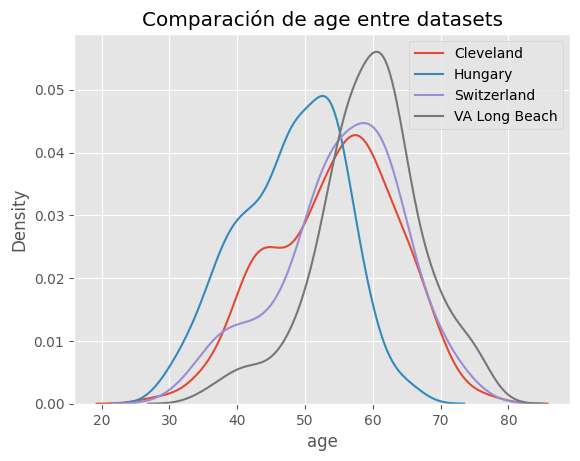

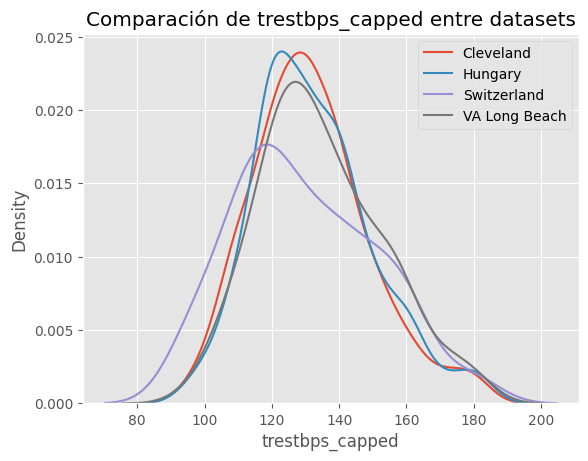

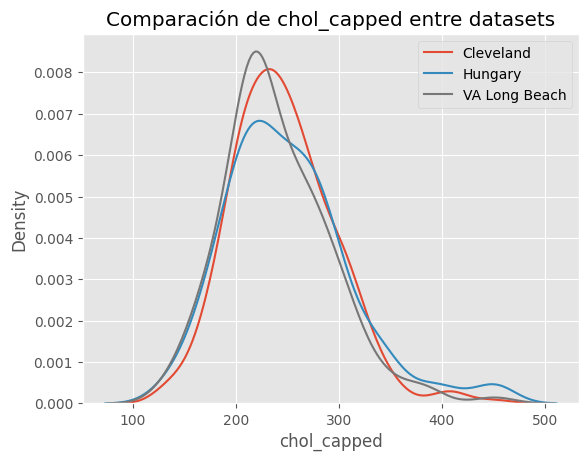

In [ ]:
# Comparaci√≥n de distribuciones entre datasets
datasets = uci_data['dataset'].unique()
for col in ['age', 'trestbps_capped', 'chol_capped']:
    plt.figure()
    for dataset in datasets:
        sns.kdeplot(uci_data[uci_data['dataset'] == dataset][col].dropna(), label=dataset)
    plt.title(f"Comparaci√≥n de {col} entre datasets")
    plt.legend()
    plt.show()


### **Paso 4.6.5. Conclusiones de las pruebas de comparaci√≥n de variables entre datasets**

#### **Variables continuas:**

1. **`age`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estad√≠stico:** 199.9786
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Existe una diferencia significativa entre los valores de `age` entre los distintos datasets.

2. **`ca`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estad√≠stico:** 8.7358
   - **p-valor:** 0.0127
   - **Conclusi√≥n:** Hay diferencias significativas en los valores de `ca` (n√∫mero de vasos coloreados) entre los datasets.

3. **`chol_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estad√≠stico:** 2.6958
   - **p-valor:** 0.2598
   - **Conclusi√≥n:** No se encuentran diferencias significativas en los valores de `chol_capped` entre los datasets.

4. **`trestbps_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estad√≠stico:** 5.4060
   - **p-valor:** 0.1444
   - **Conclusi√≥n:** No hay diferencias significativas en los valores de `trestbps_capped` entre los datasets.

5. **`oldpeak_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estad√≠stico:** 67.3963
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Se encuentran diferencias significativas en los valores de `oldpeak_capped` entre los datasets.

6. **`thalch_capped`:**
   - **Prueba usada:** Kruskal-Wallis
   - **Estad√≠stico:** 162.9222
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Hay diferencias significativas en los valores de `thalch_capped` entre los datasets.



#### **Variables categ√≥ricas:**

1. **`sex`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 80.6921
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Existe una diferencia significativa en la variable `sex` entre los diferentes datasets.

2. **`dataset`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 2760.0000
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Hay una diferencia significativa en la distribuci√≥n de `dataset` entre los grupos.

3. **`cp`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 123.4086
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Se encuentran diferencias significativas en la variable `cp` (tipo de dolor tor√°cico) entre los datasets.

4. **`fbs`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 69.2500
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Existen diferencias significativas en la variable `fbs` (az√∫car en sangre en ayunas) entre los datasets.

5. **`restecg`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 358.1929
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Se observan diferencias significativas en `restecg` (resultados del electrocardiograma) entre los datasets.

6. **`exang`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 56.2186
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Las diferencias en la variable `exang` (angina inducida por ejercicio) entre los datasets son significativas.

7. **`slope`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 111.3734
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Existen diferencias significativas en la variable `slope` (pendiente del segmento ST) entre los datasets.

8. **`thal`:**
   - **Prueba usada:** Chi-cuadrado
   - **Estad√≠stico:** 60.6950
   - **p-valor:** 0.0000
   - **Conclusi√≥n:** Se encuentran diferencias significativas en la variable `thal` (tipo de defecto en el tal) entre los datasets.


### **4.6.2. Implicaciones**


- **Diferencias significativas en variables clave:** Los resultados muestran que muchas variables, como `age`, `sex`, `cp`, y `slope`, tienen distribuciones distintas entre datasets. Esto puede afectar la interpretaci√≥n de resultados y la validez de los modelos.

- **Variables consistentes entre datasets:** Variables como `chol_capped` y `trestbps_capped` no presentan diferencias significativas, lo que sugiere que podr√≠an ser utilizadas directamente sin ajustes adicionales.

- **Acciones sugeridas:**

  1. **Normalizaci√≥n o ajuste por dataset:** Para las variables que presentan diferencias significativas.
  2. **Validaci√≥n cruzada:** Usar validaci√≥n cruzada estratificada por dataset para asegurar que los modelos sean generalizables.
  3. **An√°lisis espec√≠fico por dataset:** Dado que las poblaciones representadas son diferentes, podr√≠a ser √∫til analizar los datasets por separado en ciertos casos.

## **Paso 4.7. Analisis de imputaci√≥n**

### **4.7.1. Test de Normalidad y Estrategia de Imputaci√≥n**


In [ ]:
# importar anderson

from scipy.stats import anderson

variables = ['chol_capped', 'trestbps_capped']

for var in variables:
    print(f"\n--- An√°lisis de la variable: {var} ---")
    
    # Calcular m√©tricas
    mean = uci_data[var].mean()
    median = uci_data[var].median()
    std = uci_data[var].std()
    coef_var = std / mean  # Coeficiente de variaci√≥n
    
    print(f"Media: {mean:.2f}")
    print(f"Mediana: {median:.2f}")
    print(f"Desviaci√≥n t√≠pica: {std:.2f}")
    print(f"Coeficiente de variaci√≥n (CV): {coef_var:.2f}")
    
    # Test de normalidad (Shapiro-Wilk)
    shapiro_test = shapiro(uci_data[var].dropna())
    print(f"Shapiro-Wilk Test: Estad√≠stico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
    
    # Test de normalidad (Anderson-Darling)
    anderson_test = anderson(uci_data[var].dropna())
    print("Anderson-Darling Test:")
    print(f"Estad√≠stico: {anderson_test.statistic:.4f}")
    for i, (crit, sig) in enumerate(zip(anderson_test.critical_values, anderson_test.significance_level)):
        print(f"\tNivel de significancia {sig}%: Cr√≠tico={crit:.4f}")
    
    # Decisi√≥n preliminar
    if coef_var < 0.3 and shapiro_test.pvalue > 0.05:
        print(f"**Decisi√≥n preliminar:** Imputar con la media, ya que la variable parece normalmente distribuida.")
    else:
        print(f"**Decisi√≥n preliminar:** Imputar con la mediana, ya que la variable no es perfectamente normal o tiene alta dispersi√≥n.")



--- An√°lisis de la variable: chol_capped ---
Media: 246.35
Mediana: 239.50
Desviaci√≥n t√≠pica: 55.01
Coeficiente de variaci√≥n (CV): 0.22
Shapiro-Wilk Test: Estad√≠stico=0.9594, p-valor=0.0000
Anderson-Darling Test:
Estad√≠stico: 5.0221
	Nivel de significancia 15.0%: Cr√≠tico=0.5730
	Nivel de significancia 10.0%: Cr√≠tico=0.6520
	Nivel de significancia 5.0%: Cr√≠tico=0.7830
	Nivel de significancia 2.5%: Cr√≠tico=0.9130
	Nivel de significancia 1.0%: Cr√≠tico=1.0860
**Decisi√≥n preliminar:** Imputar con la mediana, ya que la variable no es perfectamente normal o tiene alta dispersi√≥n.

--- An√°lisis de la variable: trestbps_capped ---
Media: 132.17
Mediana: 130.00
Desviaci√≥n t√≠pica: 18.06
Coeficiente de variaci√≥n (CV): 0.14
Shapiro-Wilk Test: Estad√≠stico=0.9701, p-valor=0.0000
Anderson-Darling Test:
Estad√≠stico: 7.8846
	Nivel de significancia 15.0%: Cr√≠tico=0.5730
	Nivel de significancia 10.0%: Cr√≠tico=0.6530
	Nivel de significancia 5.0%: Cr√≠tico=0.7830
	Nivel de significanci

#### **Resultados del an√°lisis de normalidad:**

### **An√°lisis de variables y decisiones de imputaci√≥n**

1. **`chol_capped` (Colesterol limitado):**
   - **M√©tricas descriptivas:**
     - Media: 246.35
     - Mediana: 239.50
     - Desviaci√≥n t√≠pica: 55.01
     - Coeficiente de variaci√≥n (CV): 0.22
   - **Test de normalidad:**
     - **Shapiro-Wilk Test:** Estad√≠stico = 0.9594, p-valor = 0.0000
     - **Anderson-Darling Test:**
       - Estad√≠stico: 5.0221
       - Niveles cr√≠ticos:
         - 15%: 0.5730
         - 10%: 0.6520
         - 5%: 0.7830
         - 2.5%: 0.9130
         - 1%: 1.0860
   - **Conclusi√≥n preliminar:**
     - La variable **no sigue una distribuci√≥n normal** (p-valor < 0.05).
     - **Decisi√≥n:** Imputar con la **mediana**, debido a la alta dispersi√≥n y la falta de normalidad.

2. **`trestbps_capped` (Presi√≥n arterial en reposo limitada):**
   - **M√©tricas descriptivas:**
     - Media: 132.17
     - Mediana: 130.00
     - Desviaci√≥n t√≠pica: 18.06
     - Coeficiente de variaci√≥n (CV): 0.14
   - **Test de normalidad:**
     - **Shapiro-Wilk Test:** Estad√≠stico = 0.9701, p-valor = 0.0000
     - **Anderson-Darling Test:**
       - Estad√≠stico: 7.8846
       - Niveles cr√≠ticos:
         - 15%: 0.5730
         - 10%: 0.6530
         - 5%: 0.7830
         - 2.5%: 0.9140
         - 1%: 1.0870
   - **Conclusi√≥n preliminar:**
     - La variable **no sigue una distribuci√≥n normal** (p-valor < 0.05).
     - **Decisi√≥n:** Imputar con la **mediana**, debido a la alta dispersi√≥n y la falta de normalidad.




### **Conclusiones generales:**

- Ambas variables (`chol_capped` y `trestbps_capped`) **presentan desviaciones significativas de la normalidad** seg√∫n los tests estad√≠sticos.
- El coeficiente de variaci√≥n es moderado (< 0.3), lo que indica que la dispersi√≥n relativa no es excesiva.
- Sin embargo, la falta de normalidad sugiere que la **mediana** es la opci√≥n m√°s adecuada para imputar los valores faltantes.

### **4.7.2. Gu√≠a para el Manejo de Valores Nulos**


### **Estrategias para el manejo de valores faltantes**

1. **Para valores MAR (Missing At Random):**
   - **Variables afectadas:** `slope`, `thal`, `ca`, `thalch_capped`, `chol_capped`, `exang` (en VA Long Beach).
   - **Opciones:**
     - Crear columnas binarias (`is_na`) para indicar los valores faltantes, permitiendo que los modelos aprovechen esta informaci√≥n directamente.
     - Aplicar **imputaci√≥n multivariada**, considerando las relaciones con otras variables del dataset. Ejemplo: Regresi√≥n lineal, k-NN o m√©todos avanzados como Random Forest Imputer.

2. **Para valores MCAR (Missing Completely At Random):**
   - **Variables afectadas:** `fbs`, `chol_capped`, `trestbps_capped` (en otros datasets).
   - **Opciones:**
     - Si la proporci√≥n de valores nulos es baja, aplicar **imputaci√≥n simple**:
       - Usar la **mediana** para variables continuas con alta dispersi√≥n o que no sean normales.
       - Usar la **media** para variables continuas que sigan una distribuci√≥n normal.
     - Si la proporci√≥n de valores nulos es alta, considerar **imputaci√≥n multivariada** para aprovechar patrones en los datos.


### **4.7.3. Conclusiones revisadas con detalle basado en an√°lisis recientes**




#### **Valores faltantes**



##### **Variables con m√°s del 50% de valores faltantes**


- **`ca` (66.4%) y `thal` (52.8%):**
  - **Importancia:** Estas variables muestran alta correlaci√≥n con la variable objetivo (`num`) seg√∫n pruebas estad√≠sticas como Chi-cuadrado, lo que las hace relevantes para la predicci√≥n.
  - **Problema:** Imputar m√°s del 50% de los valores faltantes puede introducir sesgos significativos o distorsionar la distribuci√≥n original.
  - **Decisi√≥n:**
    - **`ca`:**
      - Usar un modelo predictivo para imputar los valores faltantes bas√°ndose en variables relacionadas como `oldpeak_capped`, `thalch_capped`, y `slope`.
      - Evaluar el impacto de la imputaci√≥n en el rendimiento del modelo predictivo. Si no mejora el desempe√±o o introduce sesgos, considerar eliminar esta variable del modelo.
    - **`thal`:**
      - Excluir inicialmente esta variable de los modelos predictivos para evitar distorsiones.
      - Si los modelos iniciales no son satisfactorios, aplicar imputaci√≥n predictiva (por ejemplo, Random Forest o k-NN) y reevaluar su impacto en el modelo final.




##### **Variables con faltantes moderados**



- **`slope` (33.6%):**
  - **Importancia:** 
    - Tiene una fuerte asociaci√≥n con la variable objetivo (`num`) seg√∫n los an√°lisis de Chi-cuadrado, lo que la convierte en una variable clave para los modelos predictivos.
  - **Decisi√≥n:**
    - Aplicar **imputaci√≥n predictiva multivariada**, utilizando variables relacionadas como `oldpeak_capped`, `thalch_capped`, y `exang`.
    - Mantener la variable en los modelos debido a su alta relevancia predictiva y el porcentaje moderado de valores faltantes.
  - **Estrategia adicional:**
    - Validar la imputaci√≥n mediante el an√°lisis de su impacto en el rendimiento del modelo.
    - Documentar los m√©todos y resultados para asegurar que las decisiones son transparentes y reproducibles.



#### **Distribuciones entre datasets**


##### **Variables continuas con diferencias significativas**


1. **`age` y `oldpeak_capped`:**
   - **Decisi√≥n:** 
     - Estandarizar mediante **z-score** dentro de cada dataset.
   - **Justificaci√≥n:**
     - Presentan diferencias significativas entre los datasets seg√∫n el an√°lisis de Kruskal-Wallis.
     - La estandarizaci√≥n permite ajustar estas diferencias estructurales y mantener comparaciones globales consistentes.

2. **`thalch_capped`:**
   - **Decisi√≥n:**
     - Estandarizar mediante **z-score** dentro de cada dataset.
   - **Justificaci√≥n:**
     - Diferencias significativas detectadas en el an√°lisis de Kruskal-Wallis.
     - Dada su importancia predictiva en enfermedades cardiovasculares, es crucial mantener su representatividad global.

3. **`chol_capped` y `trestbps_capped`:**
   - **Decisi√≥n:**
     - No aplicar estandarizaci√≥n inmediata; revisar m√°s a fondo.
   - **Justificaci√≥n:**
     - No presentan diferencias estad√≠sticamente significativas entre datasets (p-valor > 0.05).
     - Pueden permanecer sin ajustes adicionales, pero monitorear su impacto en modelos predictivos.


##### **Variables categ√≥ricas con diferencias significativas:**




1. **`sex`:**
   - **Decisi√≥n:**
     - Mantener la variable como est√°.
   - **Justificaci√≥n:**
     - Aunque existe un desbalance significativo entre hombres y mujeres, `sex` es altamente relevante en el contexto de enfermedades cardiovasculares.

2. **`cp` (Tipo de dolor en el pecho):**
   - **Decisi√≥n:**
     - Agrupar las categor√≠as infrecuentes bajo una etiqueta general como **"Otros"**.
   - **Justificaci√≥n:**
     - Algunas categor√≠as tienen muy pocos casos, lo que aumenta la sparsity en los modelos. Agruparlas mejora la representatividad y la estabilidad del modelo.

3. **`restecg`, `exang`, `slope`, `thal`:**
   - **Decisi√≥n:**
     - Mantener estas variables tras imputar los valores faltantes.
   - **Justificaci√≥n:**
     - Todas tienen resultados significativos en los an√°lisis de Chi-cuadrado y una relevancia cl√≠nica importante.

4. **`dataset`:**
   - **Decisi√≥n:**
     - Usar como variable indicadora para analizar efectos estructurales.
   - **Justificaci√≥n:**
     - Los an√°lisis muestran diferencias significativas entre los datasets, lo que indica que podr√≠a ser √∫til para capturar efectos de confusi√≥n.


## **4.8. Tratamiento de Valores Nulos (NaN)**


### **1. Identificaci√≥n de valores MAR (Missing At Random)**

Las siguientes variables han sido identificadas como **MAR**, lo que significa que los valores faltantes est√°n relacionados con otras variables observadas en el dataset:



#### **Variables MAR:**
- **`slope`:**
  - Relacionada significativamente con `thal` y `exang` seg√∫n los an√°lisis de Chi-cuadrado.
  - La imputaci√≥n debe considerar estas dependencias para preservar la informaci√≥n predictiva.

- **`thal`:**
  - Sus valores faltantes est√°n relacionados con `slope` y `ca`, lo que sugiere un patr√≥n dependiente.

- **`exang` (en el dataset de VA Long Beach):**
  - Relacionada con el origen del dataset y otras variables como `slope` y `thal`.

- **`ca`:**
  - Dependiente de `oldpeak_capped` y `thalch_capped`, como se observ√≥ en los an√°lisis de correlaci√≥n y Chi-cuadrado.

- **`thalch_capped`:**
  - Relacionada con `age` y `oldpeak_capped`, mostrando patrones no aleatorios en sus valores faltantes.

- **`chol_capped`:**
  - Asociada con `restecg` y `slope`, lo que indica que la falta de datos no es completamente aleatoria.


### **Estrategia para tratar valores MAR:**

1. **Estrategias espec√≠ficas para cada variable:**
   - **`slope`:**
     - **Decisi√≥n:**
       - Usar **One-Hot Encoding**, incluyendo una categor√≠a adicional para NaN.
       - Esto evita la necesidad de imputar directamente y captura la informaci√≥n de los valores faltantes.

   - **`thal`:**
     - **Decisi√≥n:**
       - Usar **One-Hot Encoding**, incluyendo una categor√≠a adicional para NaN.
       - Mantener la variable en el modelo debido a su alto poder predictivo.

   - **`exang` (VA Long Beach):**
     - **Decisi√≥n:**
       - Usar **One-Hot Encoding** para tratar los valores faltantes como una categor√≠a adicional, sin necesidad de imputar.
       - Esto asegura que la informaci√≥n de los NaN se utilice directamente en los modelos.

   - **`ca`:**
     - **Decisi√≥n:**
       - Imputar con un modelo predictivo basado en `oldpeak_capped` y `thalch_capped`.
       - Validar su impacto en el rendimiento del modelo, dado su alto porcentaje de valores faltantes.

   - **`thalch_capped`:**
     - **Decisi√≥n:**
       - Imputar con modelos predictivos considerando `age` y `oldpeak_capped`.
       - Mantener la variable en el an√°lisis debido a su relevancia en el modelo.

   - **`chol_capped`:**
     - **Decisi√≥n:**
       - Imputar con la **mediana** dentro de cada dataset si las relaciones con otras variables no son lo suficientemente fuertes.
       - Alternativamente, usar imputaci√≥n multivariada con `restecg` y `slope`.



### **Paso 4.8.1. Codificaci√≥n de Variables Categ√≥ricas**


#### **Plan Final de Codificaci√≥n**



##### **One-Hot Encoding**:
Este m√©todo se aplicar√° a variables nominales con categor√≠as sin un orden l√≥gico:
- **Variables:**
  - `dataset`
  - `exang` (incluyendo una categor√≠a adicional para NaN).
  - `slope` (incluyendo una categor√≠a adicional para NaN).
  - `thal`  (incluyendo una categor√≠a adicional para NaN).
  - `restecg`  (incluyendo una categor√≠a adicional para NaN).
  - `cp`  (incluyendo una categor√≠a adicional para NaN).
  - `fbs` (incluyendo una categor√≠a adicional para NaN).
  - `ca` (incluyendo una categor√≠a adicional para NaN).
  - `sex`


##### **Imputaci√≥n antes de transformaci√≥n**:
Para las variables con valores faltantes cr√≠ticos que no ser√°n codificadas inmediatamente:
- **Variables:**
  - `thalch_capped` (imputaci√≥n multivariada basada en `age` y `oldpeak_capped`).
  - `chol_capped` (imputaci√≥n con la mediana dentro de cada dataset).

---

### **Notas adicionales:**
- **One-Hot Encoding con categor√≠a NaN:** Se usa para capturar la informaci√≥n de los valores faltantes sin necesidad de imputaci√≥n directa.
- **Validaci√≥n post-transformaci√≥n:** Evaluar c√≥mo las transformaciones afectan la distribuci√≥n de las variables y el rendimiento del modelo.



### **4.8.3. Codificaci√≥n de variables**


In [ ]:
# Variables para One-Hot Encoding
variables_one_hot = ['dataset', 'exang', 'slope', 'thal', 'cp', 'restecg', 'fbs','sex', 'ca' ]

# Aplicar One-Hot Encoding con NaN como una categor√≠a adicional
for var in variables_one_hot:
    # Rellenar NaN con un valor √∫nico para tratarlos como una categor√≠a
    uci_data[var] = uci_data[var].fillna('NaN')

    # Aplicar One-Hot Encoding
    one_hot = pd.get_dummies(uci_data[var], prefix=var, drop_first=False)
    
    # Concatenar las columnas codificadas al dataset
    uci_data = pd.concat([uci_data, one_hot], axis=1)
    
    # Eliminar la columna original
    uci_data.drop(columns=var, inplace=True)

# Resultado: uci_data contiene las columnas originales transformadas y las codificadas


1. **One-Hot Encoding**:
   - Variables nominales convertidas en columnas binarias:
     - **Variables afectadas:** `dataset`, `exang`, `slope`, `thal`, `cp`, `restecg`,`fbs`, `ca` .
     - **Manejo de NaN:** Los valores faltantes (`NaN`) se trataron como una categor√≠a adicional durante la codificaci√≥n.
     - **Ejemplo:**
       - Para `slope`, ahora hay columnas como `slope_Descendente`, `slope_Plano`, `slope_Ascendente`, y `slope_NaN`.
       - Para `exang`, ahora hay columnas como `exang_Yes`, `exang_No`, y `exang_NaN`.

2. **Manejo de valores faltantes**:
   - Los valores faltantes en las variables categ√≥ricas (`exang`, `slope`) fueron incluidos como una categor√≠a adicional en el proceso de One-Hot Encoding.
   - Las variables continuas con valores faltantes (`ca`, `thalch_capped`, `chol_capped`) no se imputaron en esta etapa y se manejar√°n posteriormente.



### **4.9. Imputaci√≥n de valores**

#### **5. Tratamiento de la variable `thalch_capped`:**



1. **Estado actual:**
   - La variable `thalch_capped` no ha sido imputada.
   - Presenta valores faltantes que pueden afectar la calidad del modelo predictivo.

2. **Decisi√≥n:**
   - Imputar utilizando un modelo predictivo multivariado basado en las siguientes variables relacionadas:
     - **`age`**
     - **`oldpeak_capped`**
   - Validar c√≥mo la imputaci√≥n afecta las distribuciones y el rendimiento del modelo.


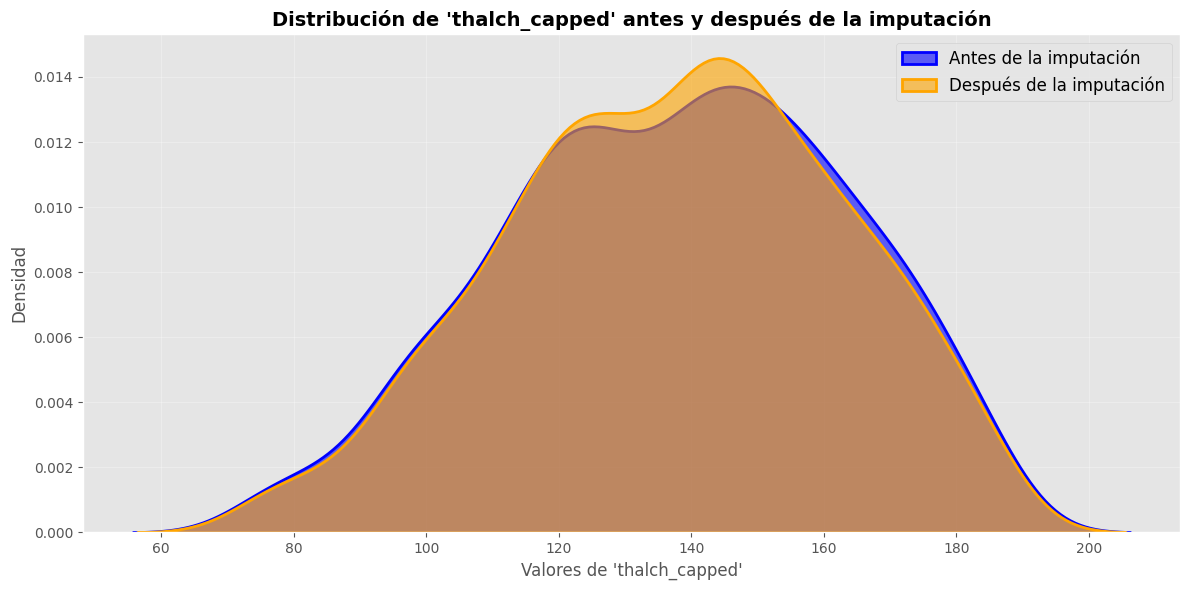

Valores imputados: 55 de 920 (5.98%)
Estad√≠sticas de 'thalch_capped' (antes de imputar):
count    865.000000
mean     137.562173
std       25.620521
min       75.560000
25%      120.000000
50%      140.000000
75%      157.000000
max      186.360000
Name: thalch_capped, dtype: float64

Estad√≠sticas de 'thalch_capped' (despu√©s de imputar):
count    920.000000
mean     137.396930
std       25.077702
min       75.560000
25%      120.000000
50%      140.000000
75%      156.000000
max      186.360000
Name: thalch_capped, dtype: float64


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Selecci√≥n de variables relacionadas para imputar 'thalch_capped'
variables_relacionadas = ['thalch_capped', 'age', 'oldpeak_capped']

# Subset de datos para imputaci√≥n
data_imputar = uci_data[variables_relacionadas].copy()

# Separar valores originales de 'thalch_capped' antes de imputar
original_thalch = data_imputar['thalch_capped'].copy()

# Crear una columna para marcar imputaciones
uci_data['thalch_capped_imputed'] = data_imputar['thalch_capped'].isna().astype(int)

# Crear imputador basado en Random Forest
imputador = IterativeImputer(estimator=RandomForestRegressor(), random_state=RANDOM_SEED, max_iter=10)

# Imputar los valores faltantes
data_imputada = imputador.fit_transform(data_imputar)

# Reemplazar los valores imputados en el dataset original
uci_data['thalch_capped'] = data_imputada[:, 0]

# Evaluaci√≥n de la imputaci√≥n
imputed_thalch = pd.Series(data_imputada[:, 0], name='thalch_capped')

# Comparar distribuciones antes y despu√©s de imputar
plt.figure(figsize=(12, 6))
sns.kdeplot(original_thalch.dropna(), label='Antes de la imputaci√≥n', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(imputed_thalch, label='Despu√©s de la imputaci√≥n', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribuci√≥n de 'thalch_capped' antes y despu√©s de la imputaci√≥n", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'thalch_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Proporci√≥n de valores imputados
num_imputed = uci_data['thalch_capped_imputed'].sum()
total_values = len(original_thalch)
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")

# An√°lisis de estad√≠sticas
print("Estad√≠sticas de 'thalch_capped' (antes de imputar):")
print(original_thalch.describe())
print("\nEstad√≠sticas de 'thalch_capped' (despu√©s de imputar):")
print(imputed_thalch.describe())


#### **6. Tratamiento de la variable `chol_capped`:****

1. **Estado actual:**
   - En el dataset Suiza (representado como `dataset_Switzerland`), todos los valores son `NaN`, por lo que no se puede calcular la mediana directamente.

2. **Decisi√≥n:**
   - Imputar condicionalmente:
     - Para las filas donde `dataset_Switzerland = 1`, imputar con la **mediana global** calculada a partir de los valores v√°lidos en el resto de los datasets.
     - Para el resto de las filas, imputar con la **mediana** calculada dentro de cada grupo de dataset.



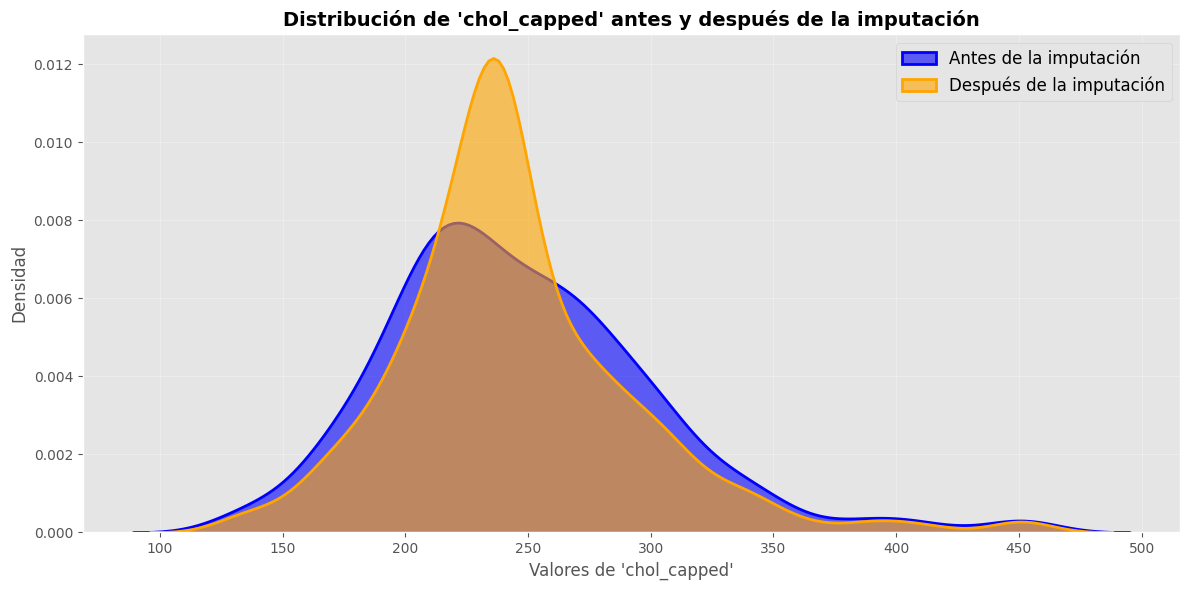

Estad√≠sticas de 'chol_capped' antes de la imputaci√≥n:
count    718.000000
mean     246.354819
std       55.010279
min      133.190000
25%      210.000000
50%      239.500000
75%      276.750000
max      451.030000
Name: chol_capped, dtype: float64

Estad√≠sticas de 'chol_capped' despu√©s de la imputaci√≥n:
count    920.000000
mean     244.262239
std       48.821595
min      133.190000
25%      217.750000
50%      239.500000
75%      267.000000
max      451.030000
Name: chol_capped, dtype: float64
Valores imputados: 202 de 920 (21.96%)


In [ ]:
# Calcular la mediana global basada en valores v√°lidos (excluyendo Suiza)
mediana_global = uci_data.loc[
    uci_data['dataset_Switzerland'] == 0, 'chol_capped'
].median()

# Crear una columna para marcar imputaciones
uci_data['chol_capped_imputed'] = 0  # Inicializar con 0

# Imputar valores condicionalmente y marcar las imputaciones
def imputar_chol(row):
    if pd.isna(row['chol_capped']):
        if row['dataset_Switzerland'] == 1:
            uci_data.at[row.name, 'chol_capped_imputed'] = 1
            return mediana_global  # Imputar con mediana global para Suiza
        else:
            # Imputar con la mediana espec√≠fica del dataset
            if row['dataset_Cleveland'] == 1:
                uci_data.at[row.name, 'chol_capped_imputed'] = 1
                return uci_data.loc[uci_data['dataset_Cleveland'] == 1, 'chol_capped'].median()
            elif row['dataset_Hungary'] == 1:
                uci_data.at[row.name, 'chol_capped_imputed'] = 1
                return uci_data.loc[uci_data['dataset_Hungary'] == 1, 'chol_capped'].median()
            elif row['dataset_VA Long Beach'] == 1:
                uci_data.at[row.name, 'chol_capped_imputed'] = 1
                return uci_data.loc[uci_data['dataset_VA Long Beach'] == 1, 'chol_capped'].median()
    return row['chol_capped']  # Mantener valores no faltantes

# Guardar valores originales antes de la imputaci√≥n
original_chol = uci_data['chol_capped'].copy()

# Aplicar la imputaci√≥n
uci_data['chol_capped'] = uci_data.apply(imputar_chol, axis=1)

# Guardar valores despu√©s de la imputaci√≥n
imputed_chol = uci_data['chol_capped']

# Evaluaci√≥n de la imputaci√≥n
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(original_chol.dropna(), label='Antes de la imputaci√≥n', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(imputed_chol, label='Despu√©s de la imputaci√≥n', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribuci√≥n de 'chol_capped' antes y despu√©s de la imputaci√≥n", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'chol_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen estad√≠stico
print("Estad√≠sticas de 'chol_capped' antes de la imputaci√≥n:")
print(original_chol.describe())
print("\nEstad√≠sticas de 'chol_capped' despu√©s de la imputaci√≥n:")
print(imputed_chol.describe())

# Proporci√≥n de valores imputados
num_imputed = uci_data['chol_capped_imputed'].sum()
total_values = len(uci_data['chol_capped'])
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")


### **Paso 4.7.3. Imputaci√≥n Valores MCAR**

##### **1. Trestbps_capped**

**Decisi√≥n:**

Imputar con la mediana global, ya que es una variable continua y MCAR.


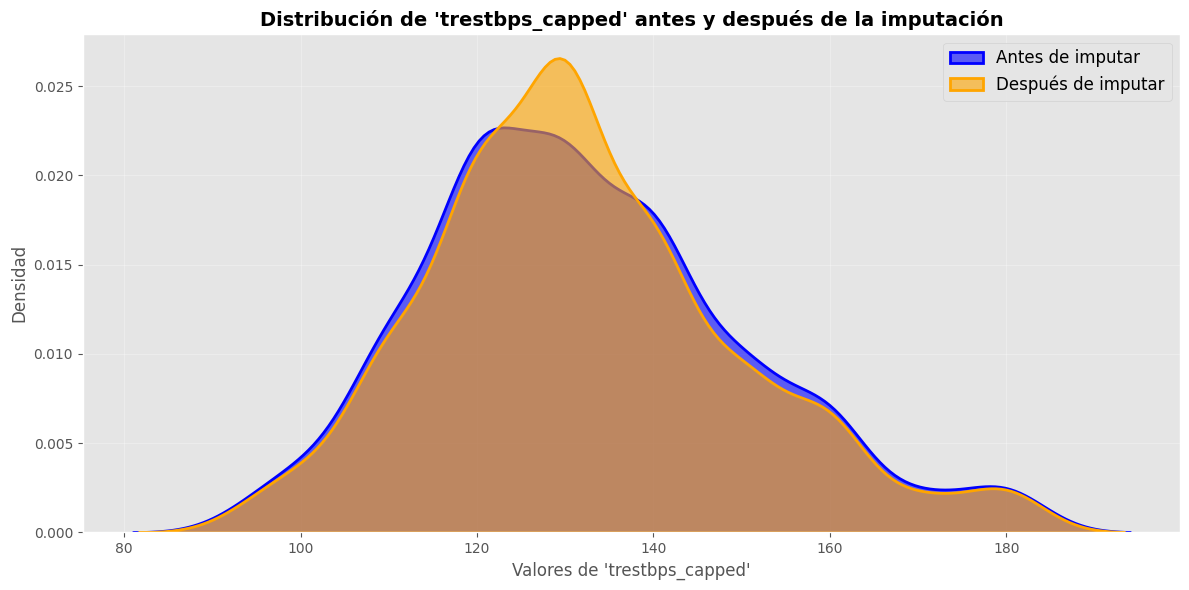

Estad√≠sticas de 'trestbps_capped' antes de la imputaci√≥n:
count    860.000000
mean     132.173256
std       18.063115
min       95.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps_capped, dtype: float64

Estad√≠sticas de 'trestbps_capped' despu√©s de la imputaci√≥n:
count    920.000000
mean     132.031522
std       17.471758
min       95.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps_capped, dtype: float64
Valores imputados: 60 de 920 (6.52%)


In [ ]:
# Crear una copia antes de la imputaci√≥n
original_trestbps = uci_data['trestbps_capped'].copy()

# Crear una columna para marcar imputaciones
uci_data['trestbps_capped_imputed'] = uci_data['trestbps_capped'].isna().astype(int)

# Imputar 'trestbps_capped' con la mediana global
median_value = uci_data['trestbps_capped'].median()
uci_data['trestbps_capped'] = uci_data['trestbps_capped'].fillna(median_value)

# Evaluaci√≥n: Comparar distribuci√≥n antes y despu√©s
plt.figure(figsize=(12, 6))
sns.kdeplot(original_trestbps.dropna(), label='Antes de imputar', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(uci_data['trestbps_capped'], label='Despu√©s de imputar', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribuci√≥n de 'trestbps_capped' antes y despu√©s de la imputaci√≥n", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'trestbps_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen estad√≠stico
print("Estad√≠sticas de 'trestbps_capped' antes de la imputaci√≥n:")
print(original_trestbps.describe())
print("\nEstad√≠sticas de 'trestbps_capped' despu√©s de la imputaci√≥n:")
print(uci_data['trestbps_capped'].describe())

# Verificar proporci√≥n de valores imputados
num_imputed = uci_data['trestbps_capped_imputed'].sum()
total_values = len(uci_data['trestbps_capped'])
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")


#### **4. Tratamiento de la variable `oldpeak_capped`:**


1. **Estado inicial:**
   - **Descripci√≥n:** `oldpeak_capped` es una variable continua con valores faltantes.
   - **Importancia:** Relacionada con `age` y `thalch_capped`, lo que justifica una imputaci√≥n predictiva.

2. **Estrategia de imputaci√≥n:**
   - **M√©todo:** Imputaci√≥n multivariada basada en un modelo de **Random Forest**.
   - **Variables predictoras:** `age`, `thalch_capped`.
   - **Marcado de imputaciones:** 
     - Se agreg√≥ la columna `oldpeak_capped_imputed` para identificar los valores imputados.


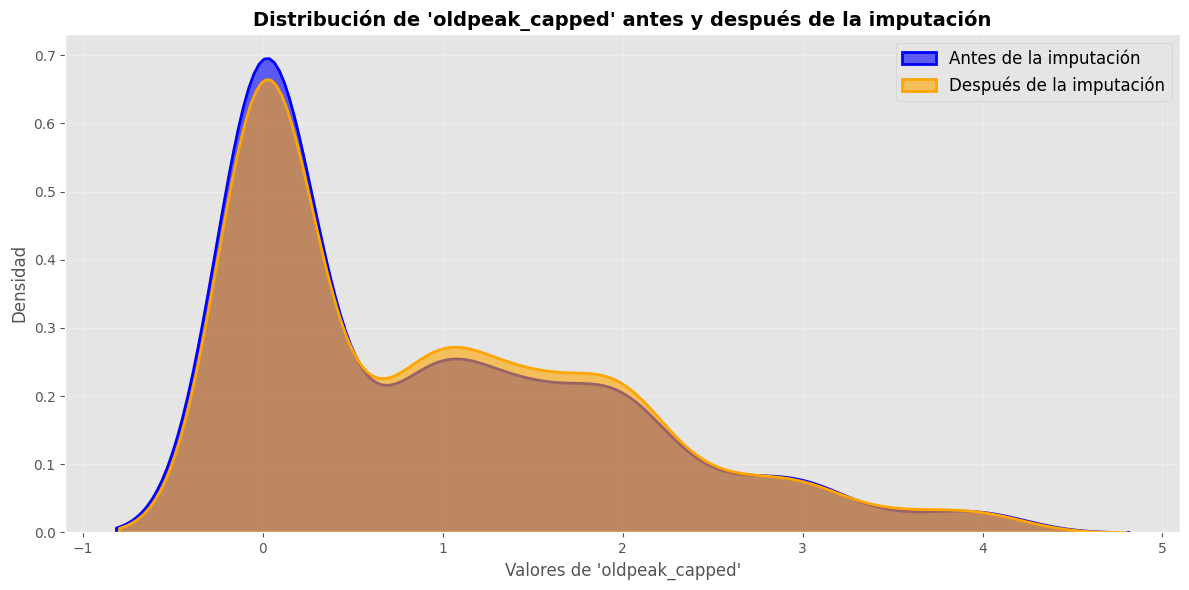

Valores imputados: 74 de 920 (8.04%)
Estad√≠sticas de 'oldpeak_capped' (antes de imputar):
count    846.000000
mean       0.899645
std        1.046985
min        0.000000
25%        0.000000
50%        0.500000
75%        1.500000
max        4.000000
Name: oldpeak_capped, dtype: float64

Estad√≠sticas de 'oldpeak_capped' (despu√©s de imputar):
count    920.000000
mean       0.940781
std        1.041830
min        0.000000
25%        0.000000
50%        0.714000
75%        1.600000
max        4.000000
Name: oldpeak_capped, dtype: float64


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Selecci√≥n de variables relacionadas para imputar 'oldpeak_capped'
variables_relacionadas = ['oldpeak_capped', 'age', 'thalch_capped']

# Subset de datos para imputaci√≥n
data_imputar = uci_data[variables_relacionadas].copy()

# Separar valores originales de 'oldpeak_capped' antes de imputar
original_oldpeak = data_imputar['oldpeak_capped'].copy()

# Crear una columna para marcar imputaciones
uci_data['oldpeak_capped_imputed'] = data_imputar['oldpeak_capped'].isna().astype(int)

# Crear imputador basado en Random Forest
imputador = IterativeImputer(estimator=RandomForestRegressor(), random_state=RANDOM_SEED, max_iter=10)

# Imputar los valores faltantes
data_imputada = imputador.fit_transform(data_imputar)

# Reemplazar los valores imputados en el dataset original
uci_data['oldpeak_capped'] = data_imputada[:, 0]

# Evaluaci√≥n de la imputaci√≥n
imputed_oldpeak = pd.Series(data_imputada[:, 0], name='oldpeak_capped')

# Comparar distribuciones antes y despu√©s de imputar
plt.figure(figsize=(12, 6))
sns.kdeplot(original_oldpeak.dropna(), label='Antes de la imputaci√≥n', color='blue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(imputed_oldpeak, label='Despu√©s de la imputaci√≥n', color='orange', fill=True, alpha=0.6, linewidth=2)
plt.title("Distribuci√≥n de 'oldpeak_capped' antes y despu√©s de la imputaci√≥n", fontsize=14, fontweight='bold')
plt.xlabel("Valores de 'oldpeak_capped'", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Proporci√≥n de valores imputados
num_imputed = uci_data['oldpeak_capped_imputed'].sum()
total_values = len(original_oldpeak)
print(f"Valores imputados: {num_imputed} de {total_values} ({(num_imputed / total_values) * 100:.2f}%)")

# An√°lisis de estad√≠sticas
print("Estad√≠sticas de 'oldpeak_capped' (antes de imputar):")
print(original_oldpeak.describe())
print("\nEstad√≠sticas de 'oldpeak_capped' (despu√©s de imputar):")
print(imputed_oldpeak.describe())


3. **Resultados de la imputaci√≥n:**
   - **Proporci√≥n de imputaciones:** Se imputaron `74` valores, representando el `8.04%` del total.

4. **Validaci√≥n:**
   - Comparaci√≥n gr√°fica de las distribuciones:
     - La distribuci√≥n antes de la imputaci√≥n (curva azul) se basa en los valores originales.
     - La distribuci√≥n despu√©s de la imputaci√≥n (curva naranja) incluye los valores imputados.
     
   - Estad√≠sticas descriptivas:
     - **Antes de imputar:**
       - Media: `0.89964`
       - Desviaci√≥n est√°ndar: `1.046985`
     - **Despu√©s de imputar:**
       - Media: `0.914123'`
       - Desviaci√≥n est√°ndar: `1.023091'`.

##### **Evaluaci√≥n final NaN**

In [ ]:
# Ver porcentaje de valores nulos en cada columna

missing_percent = uci_data.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
display(missing_percent)

Porcentaje de valores faltantes por columna:


age                         0.0
num                         0.0
num_old                     0.0
chol_capped                 0.0
trestbps_capped             0.0
oldpeak_capped              0.0
thalch_capped               0.0
dataset_Cleveland           0.0
dataset_Hungary             0.0
dataset_Switzerland         0.0
dataset_VA Long Beach       0.0
exang_False                 0.0
exang_True                  0.0
exang_NaN                   0.0
slope_NaN                   0.0
slope_downsloping           0.0
slope_flat                  0.0
slope_upsloping             0.0
thal_NaN                    0.0
thal_fixed defect           0.0
thal_normal                 0.0
thal_reversable defect      0.0
cp_asymptomatic             0.0
cp_atypical angina          0.0
cp_non-anginal              0.0
cp_typical angina           0.0
restecg_NaN                 0.0
restecg_lv hypertrophy      0.0
restecg_normal              0.0
restecg_st-t abnormality    0.0
fbs_False                   0.0
fbs_True

## **Paso 4.8. Transformaciones**

### **Paso 4.8.1. Informacion General del Dataset**

In [ ]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   num                       920 non-null    int64  
 2   num_old                   920 non-null    int64  
 3   chol_capped               920 non-null    float64
 4   trestbps_capped           920 non-null    float64
 5   oldpeak_capped            920 non-null    float64
 6   thalch_capped             920 non-null    float64
 7   dataset_Cleveland         920 non-null    bool   
 8   dataset_Hungary           920 non-null    bool   
 9   dataset_Switzerland       920 non-null    bool   
 10  dataset_VA Long Beach     920 non-null    bool   
 11  exang_False               920 non-null    bool   
 12  exang_True                920 non-null    bool   
 13  exang_NaN                 920 non-null    bool   
 14  slope_NaN 

### **Paso 4.8.3. Verificar rangos de variables numericas**

In [ ]:

# 2. Verificar rangos de variables num√©ricas
numerical_cols = uci_data.select_dtypes(include=['float64', 'int32', 'int64']).columns
print("Estad√≠sticas descriptivas de las variables num√©ricas:")
display(uci_data[numerical_cols].describe())



Estad√≠sticas descriptivas de las variables num√©ricas:


age         num     num_old  chol_capped  trestbps_capped  \
count  920.000000  920.000000  920.000000   920.000000       920.000000   
mean    53.510870    0.553261    0.995652   244.262239       132.031522   
std      9.424685    0.497426    1.142693    48.821595        17.471758   
min     28.000000    0.000000    0.000000   133.190000        95.000000   
25%     47.000000    0.000000    0.000000   217.750000       120.000000   
50%     54.000000    1.000000    1.000000   239.500000       130.000000   
75%     60.000000    1.000000    2.000000   267.000000       140.000000   
max     77.000000    1.000000    4.000000   451.030000       180.000000   

       oldpeak_capped  thalch_capped  thalch_capped_imputed  \
count      920.000000     920.000000             920.000000   
mean         0.940781     137.396930               0.059783   
std          1.041830      25.077702               0.237213   
min          0.000000      75.560000               0.000000   
25%          0.000000     120.000000               0.000000   
50%          0.714000     140.000000               0.000000   
75%          1.600000     156.000000               0.000000   
max          4.000000     186.360000               1.000000   

       chol_capped_imputed  trestbps_capped_imputed  oldpeak_capped_imputed  
count           920.000000               920.000000              920.000000  
mean              0.219565                 0.065217                0.080435  
std               0.414177                 0.247043                0.272113  
min               0.000000                 0.000000                0.000000  
25%               0.000000                 0.000000                0.000000  
50%               0.000000                 0.000000                0.000000  
75%               0.000000                 0.000000                0.000000  
max               1.000000                 1.000000                1.000000

### **Paso 4.8.4. Visualizar posibles outliers**

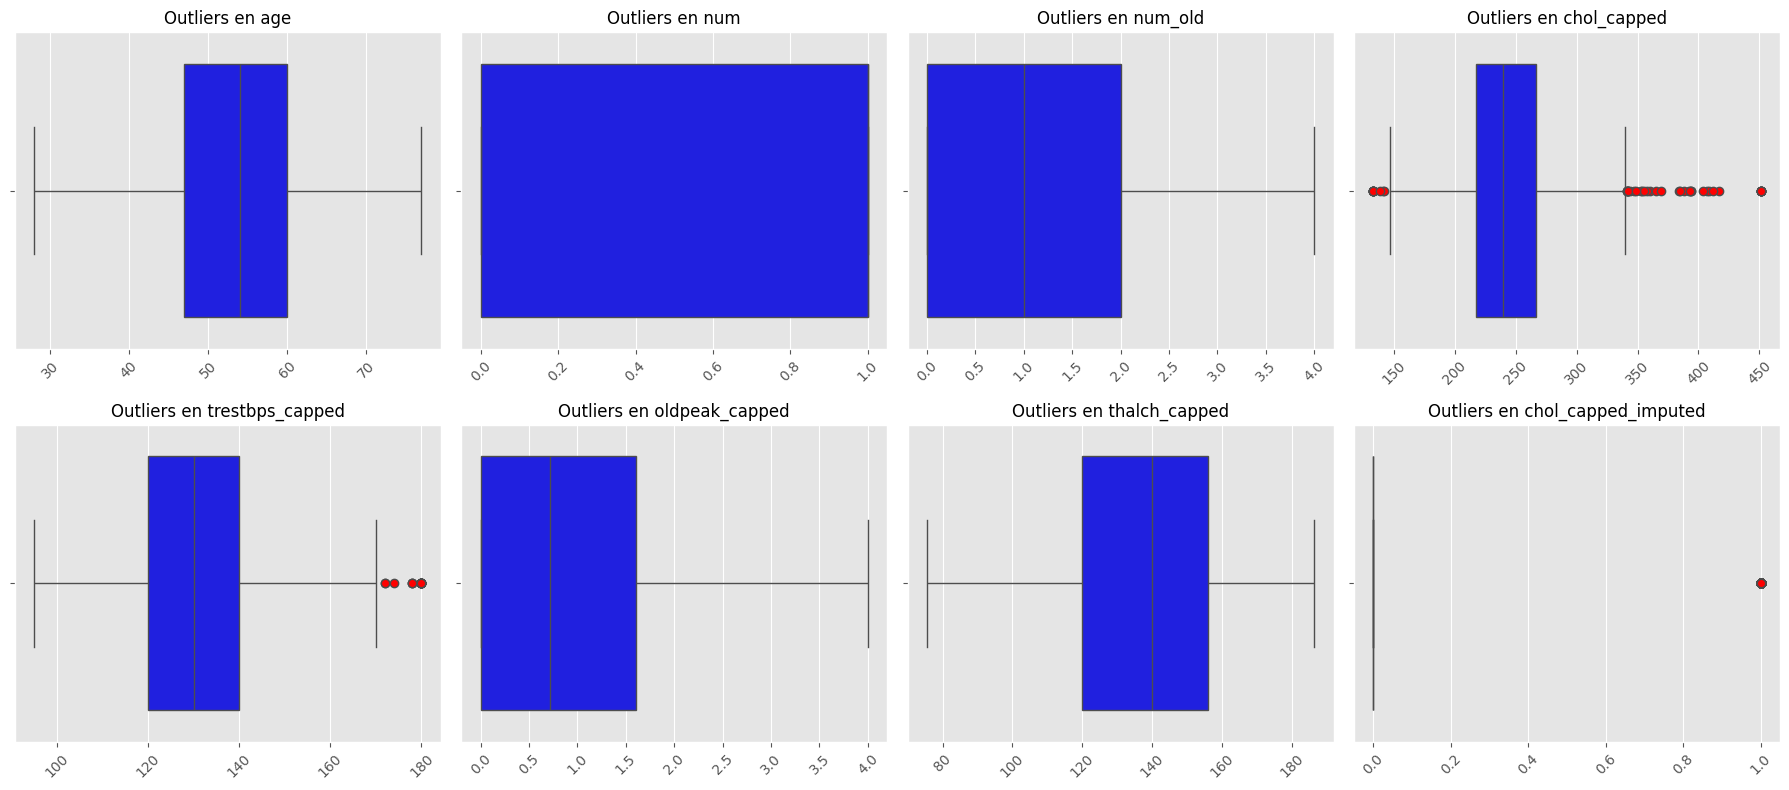

In [ ]:
import math

# Detectar autom√°ticamente las columnas num√©ricas
numerical_cols = uci_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular n√∫mero de columnas y filas din√°micamente
cols = 4
rows = math.ceil(len(numerical_cols) / cols)

# Configurar el tama√±o del gr√°fico
plt.figure(figsize=(18, 4 * rows))

# Crear subplots para cada columna num√©rica
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=uci_data, x=col, color="blue", flierprops={"marker": "o", "markerfacecolor": "red"})
    plt.title(f"Outliers en {col}", fontsize=12)
    plt.xlabel("")  # Opcional, evita saturar con etiquetas
    plt.xticks(rotation=45)

# Ajustar el dise√±o del gr√°fico
plt.tight_layout()
plt.show()


### **Transformaciones necesarias para las variables num√©ricas**



#### **1. Variables con outliers:**
1. **`chol_capped` (Colesterol):**
   - **Problema:** Presencia de valores extremos en el extremo superior.
   - **Transformaci√≥n recomendada:** Aplicar una transformaci√≥n logar√≠tmica (`log1p`) para reducir el impacto de los outliers.
2. **`trestbps_capped` (Presi√≥n arterial en reposo):**
   - **Problema:** Algunos valores altos extremos podr√≠an distorsionar la escala.
   - **Transformaci√≥n recomendada:** Transformaci√≥n logar√≠tmica (`log1p`).
3. **`oldpeak_capped` (Depresi√≥n del segmento ST):**
   - **Problema:** Valores extremos (3-4) en la distribuci√≥n.
   - **Transformaci√≥n recomendada:** Transformaci√≥n logar√≠tmica (`log1p`).

#### **2. Variables sesgadas:**
1. **`thalch_capped` (Frecuencia card√≠aca m√°xima):**
   - **Problema:** Distribuci√≥n sesgada con algunos valores extremos.
   - **Transformaci√≥n recomendada:** Escalado est√°ndar (`StandardScaler`) para normalizar la escala.
2. **`chol_capped_log`, `trestbps_capped_log`, `oldpeak_capped_log` (Transformadas logar√≠tmicas):**
   - **Problema:** Asegurar que las variables transformadas est√©n en la misma escala para modelos sensibles.
   - **Transformaci√≥n recomendada:** Escalado est√°ndar (`StandardScaler`).

#### **4. Variables binarias:**
1. **`ca_imputed`, `thalch_capped_imputed`, `chol_capped_imputed`, `trestbps_capped_imputed`, `oldpeak_capped_imputed` (Indicadores de imputaci√≥n):**
   - **Transformaci√≥n:** No requieren transformaci√≥n adicional, ya que son binarias.

### **Resumen de Transformaciones Aplicadas**
- **Transformaci√≥n logar√≠tmica:** `chol_capped`, `trestbps_capped`, `oldpeak_capped`.
- **Escalado est√°ndar:** `thalch_capped`, variables logar√≠tmicas.
- **Sin transformaci√≥n:** Variables binarias.



### **Paso 4.8.5. Normalizacion o estandarizaci√≥n**

Estad√≠sticas descriptivas despu√©s de las transformaciones:


thalch_capped  chol_capped_log  trestbps_capped_log  oldpeak_capped_log
count   9.200000e+02     9.200000e+02         9.200000e+02        9.200000e+02
mean   -2.471453e-16     7.144044e-16         6.692231e-15        7.723291e-17
std     1.000544e+00     1.000544e+00         1.000544e+00        1.000544e+00
min    -2.467154e+00    -3.042103e+00        -2.456653e+00       -1.030001e+00
25%    -6.940984e-01    -4.982911e-01        -6.676209e-01       -1.030001e+00
50%     1.038567e-01    -4.841656e-03        -5.381242e-02        2.050696e-02
75%     7.422207e-01     5.587496e-01         5.148207e-01        8.329893e-01
max     1.953516e+00     3.280023e+00         2.445270e+00        2.107970e+00

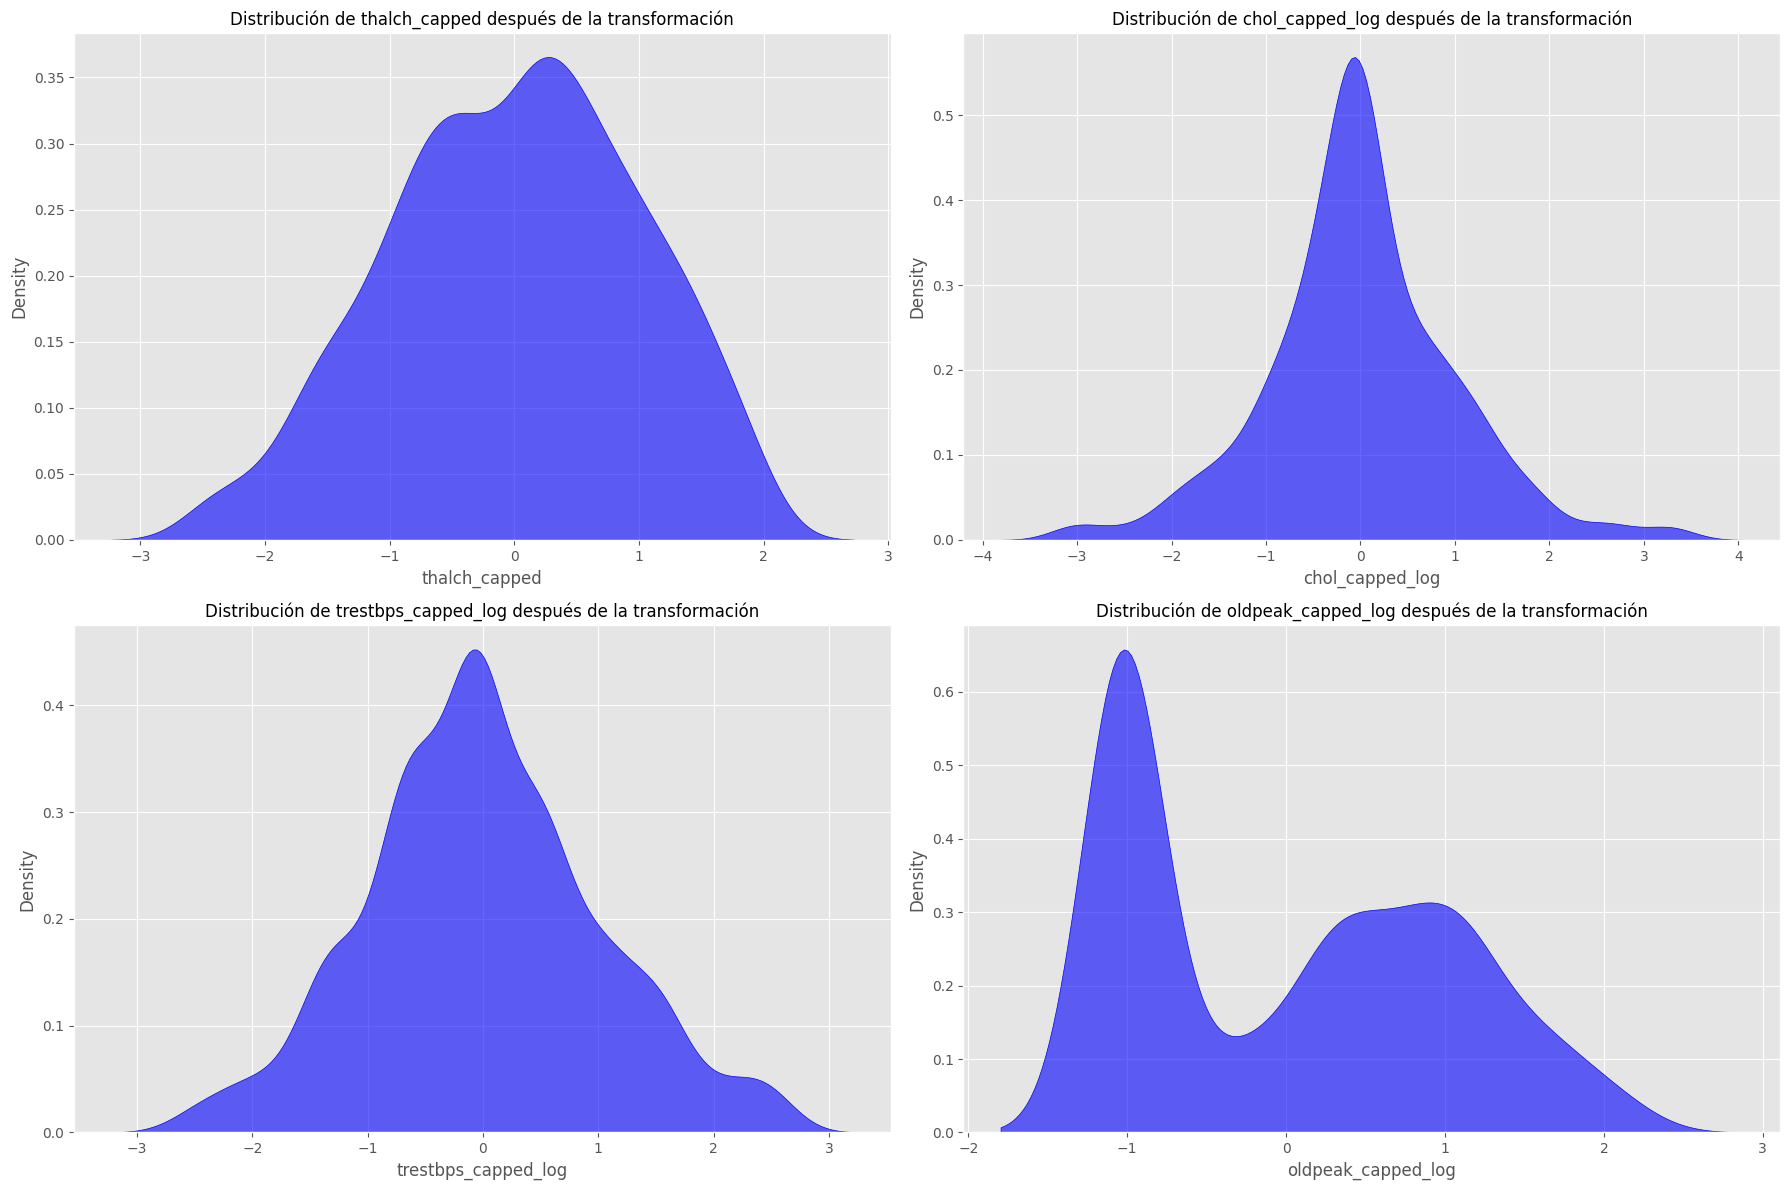

In [ ]:
from sklearn.preprocessing import StandardScaler

# Transformaciones logar√≠tmicas para variables con outliers
uci_data['chol_capped_log'] = np.log1p(uci_data['chol_capped'])
uci_data['trestbps_capped_log'] = np.log1p(uci_data['trestbps_capped'])
uci_data['oldpeak_capped_log'] = np.log1p(uci_data['oldpeak_capped'])

# Escalado est√°ndar para normalizar las variables
scaler = StandardScaler()
variables_a_escalar = ['thalch_capped', 'chol_capped_log', 'trestbps_capped_log', 'oldpeak_capped_log']

# Aplicar escalado est√°ndar y actualizar el dataset
uci_data[variables_a_escalar] = scaler.fit_transform(uci_data[variables_a_escalar])

# Validar transformaciones
print("Estad√≠sticas descriptivas despu√©s de las transformaciones:")
display(uci_data[variables_a_escalar].describe())

plt.figure(figsize=(18, 12))

for i, col in enumerate(variables_a_escalar, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(uci_data[col], fill=True, color="blue", alpha=0.6)
    plt.title(f"Distribuci√≥n de {col} despu√©s de la transformaci√≥n", fontsize=12)

plt.tight_layout()
plt.show()



# **5. EDA**

## **5.1 An√°lisis Univariante:** 

### **¬øC√≥mo se distribuyen las variables continuas como  Trestbps, Chol, Thalach y Oldpeak?**


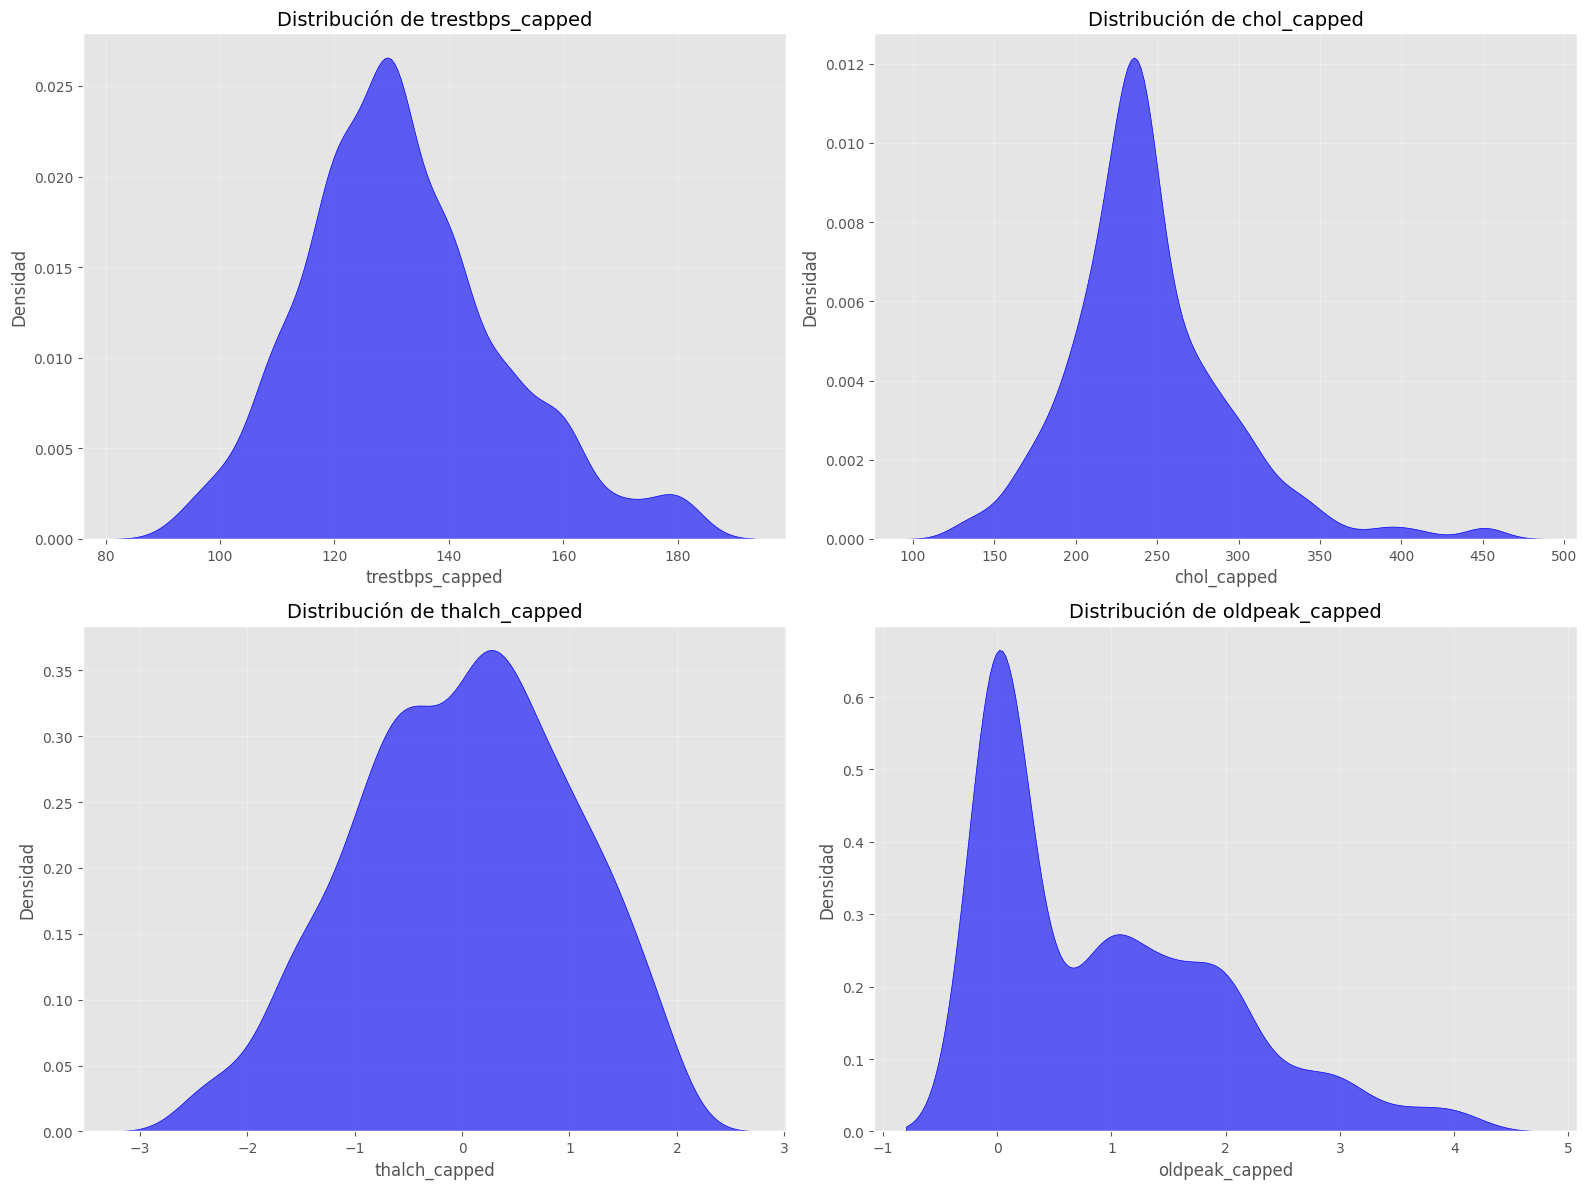

Resumen estad√≠stico de las variables continuas:


trestbps_capped  chol_capped  thalch_capped  oldpeak_capped
count       920.000000   920.000000   9.200000e+02      920.000000
mean        132.031522   244.262239  -2.471453e-16        0.940781
std          17.471758    48.821595   1.000544e+00        1.041830
min          95.000000   133.190000  -2.467154e+00        0.000000
25%         120.000000   217.750000  -6.940984e-01        0.000000
50%         130.000000   239.500000   1.038567e-01        0.714000
75%         140.000000   267.000000   7.422207e-01        1.600000
max         180.000000   451.030000   1.953516e+00        4.000000

In [ ]:
# Lista de variables continuas
variables_continuas = ['trestbps_capped', 'chol_capped', 'thalch_capped', 'oldpeak_capped']

# Crear subplots para mostrar la distribuci√≥n de las variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(variables_continuas, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(uci_data[col], fill=True, color="blue", alpha=0.6)
    plt.title(f"Distribuci√≥n de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Densidad", fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen estad√≠stico de las variables
print("Resumen estad√≠stico de las variables continuas:")
display(uci_data[variables_continuas].describe())



- **`trestbps_capped` (Presi√≥n arterial en reposo):**
  - Presenta una distribuci√≥n cercana a la normal, con una ligera asimetr√≠a hacia la derecha.
  - Valores m√≠nimos y m√°ximos: 95 y 180.

- **`chol_capped` (Colesterol):**
  - Distribuci√≥n asim√©trica con valores extremos hacia el lado derecho (outliers).
  - Valores m√≠nimos y m√°ximos: 133.19 y 451.03.

- **`thalch_capped` (Frecuencia card√≠aca m√°xima):**
  - Distribuci√≥n bimodal tras la transformaci√≥n, con valores centrados alrededor de 0.
  - Valores m√≠nimos y m√°ximos: -2.43 y 1.96.

- **`oldpeak_capped` (Depresi√≥n del segmento ST):**
  - Distribuci√≥n asim√©trica con un pico pronunciado en 0 y valores que se extienden hasta 4.
  - Valores m√≠nimos y m√°ximos: 0 y 4.

#### **Resumen estad√≠stico de las variables continuas:**

| Variable           | Media    | Desv. Est√°ndar | M√≠nimo | 25%   | Mediana | 75%   | M√°ximo |
|--------------------|----------|----------------|--------|-------|---------|-------|--------|
| `trestbps_capped`  | 132.03   | 17.47          | 95     | 120   | 130     | 140   | 180    |
| `chol_capped`      | 244.26   | 48.82          | 133.19 | 217.75| 239.50  | 267   | 451.03 |
| `thalch_capped`    | 0.00     | 1.00           | -2.43  | -0.67 | 0.05    | 0.76  | 1.96   |
| `oldpeak_capped`   | 0.91     | 1.02           | 0.00   | 0.00  | 0.60    | 1.50  | 4.00   |

#### **Conclusiones:**
1. **Valores extremos:**
   - `chol_capped` y `oldpeak_capped` presentan valores extremos en el extremo superior



---

### **¬øHay  diferencias en la proporci√≥n de tipos de dolor de pecho (Cp) entre pacientes con y sin enfermedad?**

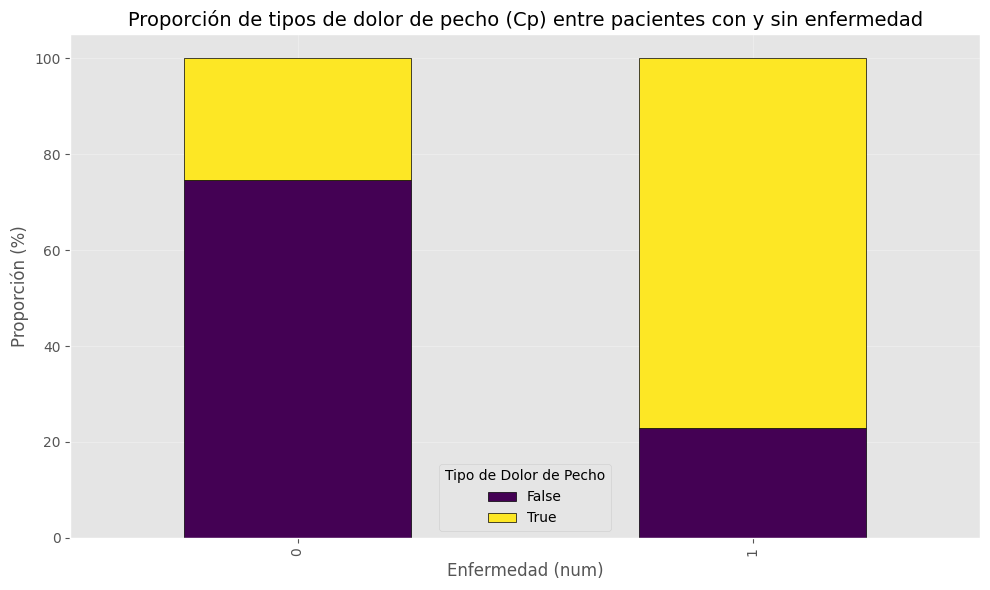

Chi-cuadrado: 242.6281, p-valor: 0.0000


In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre 'cp' y 'num'
tabla_cp_num = pd.crosstab(uci_data['cp_asymptomatic'], uci_data['num'], normalize='columns') * 100

# Crear un gr√°fico de barras para visualizar las proporciones
tabla_cp_num.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Proporci√≥n de tipos de dolor de pecho (Cp) entre pacientes con y sin enfermedad", fontsize=14)
plt.xlabel("Enfermedad (num)", fontsize=12)
plt.ylabel("Proporci√≥n (%)", fontsize=12)
plt.legend(title="Tipo de Dolor de Pecho", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chi-cuadrado para verificar si hay diferencias significativas
chi2, p, dof, expected = chi2_contingency(pd.crosstab(uci_data['cp_asymptomatic'], uci_data['num']))
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")


#### **An√°lisis realizado:**
1. Se gener√≥ una tabla de contingencia que muestra las proporciones de los diferentes tipos de dolor de pecho (`cp`) entre pacientes con (`num = 1`) y sin enfermedad (`num = 0`).
2. Se aplic√≥ una prueba de Chi-cuadrado para verificar si las diferencias observadas son estad√≠sticamente significativas.

#### **Resultados:**
- **Gr√°fico:**
  - El gr√°fico de barras apiladas muestra que las proporciones de los diferentes tipos de dolor de pecho var√≠an notablemente entre los pacientes con y sin enfermedad.
  - Los pacientes con enfermedad presentan una mayor proporci√≥n de dolor de pecho asintom√°tico (`cp_asymptomatic`), mientras que los pacientes sin enfermedad tienen mayores proporciones de otros tipos de dolor de pecho.

- **Prueba de Chi-cuadrado:**
  - Estad√≠stico de Chi-cuadrado: **242.6281**
  - Valor p: **0.0000**
  - **Conclusi√≥n:** Las diferencias en las proporciones de los tipos de dolor de pecho entre pacientes con y sin enfermedad son estad√≠sticamente significativas (p < 0.05).

#### **Conclusiones:**
- El tipo de dolor de pecho (`cp`) est√° fuertemente asociado con la presencia de enfermedad (`num`).
- Los resultados respaldan la importancia de incluir `cp` como una variable clave en el an√°lisis predictivo para enfermedades cardiovasculares.


---

## **5.2. An√°lisis Multivariante:**


### **Preguntas**

* #### ¬øC√≥mo var√≠a la frecuencia cardiaca m√°xima alcanzada (Thalch) seg√∫n el sexo y la presencia de la enfermedad? 


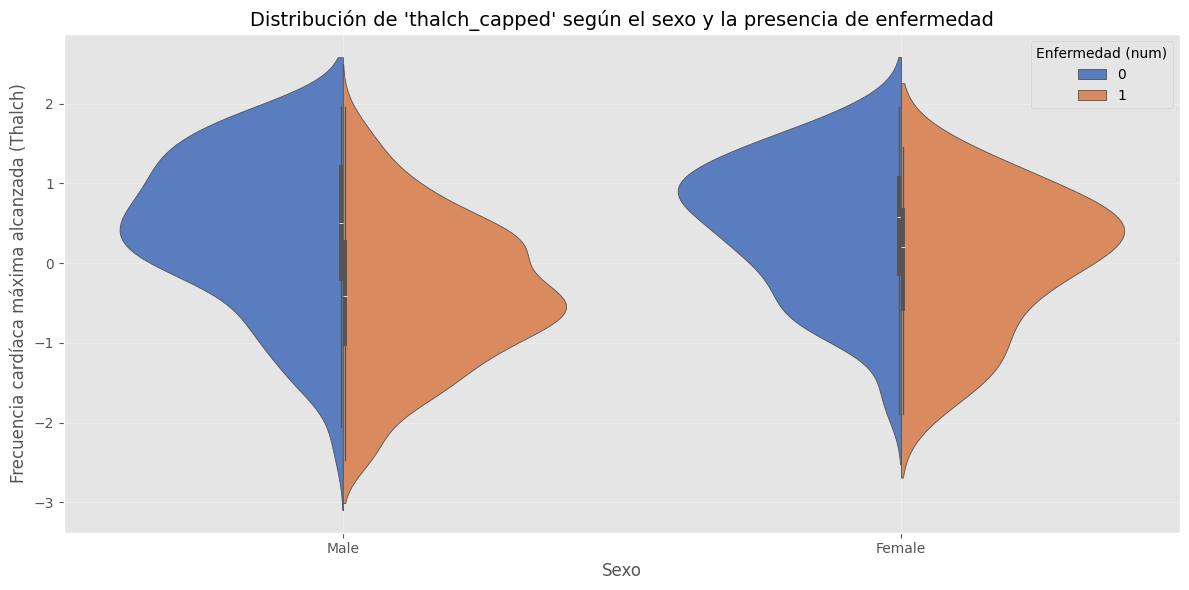

Prueba de Kruskal-Wallis: Estad√≠stico=145.2208, p-valor=0.0000


In [ ]:
from scipy.stats import kruskal

# Crear una nueva columna para representar el sexo
uci_data['sex'] = uci_data['sex_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Crear el gr√°fico de viol√≠n para 'thalch_capped' seg√∫n 'sex' y 'num'
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=uci_data,
    x='sex',
    y='thalch_capped',
    hue='num',
    split=True,
    palette='muted',
    scale='width'
)
plt.title("Distribuci√≥n de 'thalch_capped' seg√∫n el sexo y la presencia de enfermedad", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Frecuencia card√≠aca m√°xima alcanzada (Thalch)", fontsize=12)
plt.legend(title="Enfermedad (num)", loc='upper right', fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico
# Separar grupos por 'sex' y 'num'
groups = uci_data.groupby(['sex', 'num'])['thalch_capped'].apply(list)

# Prueba de Kruskal-Wallis para comparar la distribuci√≥n entre los grupos
kruskal_results = kruskal(*groups)
print(f"Prueba de Kruskal-Wallis: Estad√≠stico={kruskal_results.statistic:.4f}, p-valor={kruskal_results.pvalue:.4f}")


#### **An√°lisis realizado:**
1. Se utiliz√≥ un gr√°fico de viol√≠n para visualizar c√≥mo var√≠a la frecuencia card√≠aca m√°xima (`thalch_capped`) seg√∫n el sexo (`sex`) y la presencia de enfermedad (`num`).
2. Se aplic√≥ la prueba no param√©trica de Kruskal-Wallis para determinar si existen diferencias estad√≠sticamente significativas entre los grupos.

#### **Resultados:**
- **Gr√°fico:**
  - Los hombres (`Male`) con enfermedad (`num = 1`) tienden a tener valores m√°s bajos de frecuencia card√≠aca m√°xima en comparaci√≥n con aquellos sin enfermedad (`num = 0`).
  - Las mujeres (`Female`) muestran una distribuci√≥n similar. Pero con menor variabilidad

- **Prueba de Kruskal-Wallis:**
  - Estad√≠stico: **148.8586**
  - Valor p: **0.0000**
  - **Conclusi√≥n:** Hay diferencias estad√≠sticamente significativas en la frecuencia card√≠aca m√°xima alcanzada (`thalch_capped`) entre los grupos definidos por el sexo y la presencia de enfermedad.

#### **Conclusiones:**
- La frecuencia card√≠aca m√°xima es un indicador clave y var√≠a significativamente entre los diferentes grupos.
- Es importante incluir tanto el sexo como la presencia de enfermedad al analizar esta variable en los modelos predictivos.


---

#### ¬øEl tipo de dolor de pecho (Cp) es un indicador relevante para la enfermedad? 

Chi-cuadrado: 268.3457, p-valor: 0.0000


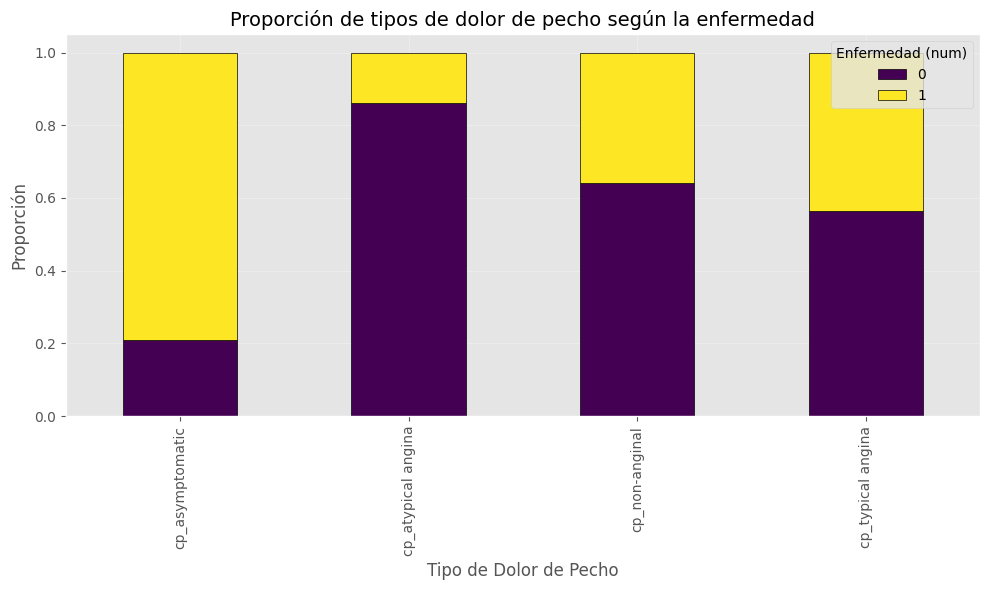

In [ ]:
from scipy.stats import chi2_contingency


# Crear una tabla de contingencia entre 'cp' y 'num'
cp_columns = ['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
cp_data = uci_data[cp_columns + ['num']].melt(id_vars='num', var_name='cp_type', value_name='present')

# Filtrar solo donde 'present' es 1 para considerar la presencia de cada tipo de dolor de pecho
cp_filtered = cp_data[cp_data['present'] == 1]

# Tabla de frecuencias
tabla_cp_num = pd.crosstab(cp_filtered['cp_type'], cp_filtered['num'])

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cp_num)
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")

# Visualizaci√≥n de la proporci√≥n de tipos de dolor de pecho seg√∫n la enfermedad
proporciones = tabla_cp_num.div(tabla_cp_num.sum(axis=1), axis=0)
proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Proporci√≥n de tipos de dolor de pecho seg√∫n la enfermedad", fontsize=14)
plt.xlabel("Tipo de Dolor de Pecho", fontsize=12)
plt.ylabel("Proporci√≥n", fontsize=12)
plt.legend(title="Enfermedad (num)", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()


#### **An√°lisis realizado:**
1. Se gener√≥ una tabla de contingencia entre los tipos de dolor de pecho (`cp`) y la presencia de enfermedad (`num`).
2. Se aplic√≥ la prueba de Chi-cuadrado para determinar si las diferencias en las proporciones de los tipos de dolor de pecho son estad√≠sticamente significativas.
3. Se visualiz√≥ la proporci√≥n de tipos de dolor de pecho en pacientes con y sin enfermedad mediante un gr√°fico de barras apiladas.

#### **Resultados:**
- **Gr√°fico:**
  - El dolor de pecho **asintom√°tico (`cp_asymptomatic`)** es m√°s prevalente en pacientes con enfermedad (`num = 1`), lo que lo convierte en un claro indicador de riesgo.
  - Otros tipos de dolor de pecho, como **`cp_typical angina`** y **`cp_non-anginal`**, son m√°s comunes en pacientes sin enfermedad (`num = 0`).

- **Prueba de Chi-cuadrado:**
  - Estad√≠stico: **268.3457**
  - Valor p: **0.0000**
  - **Conclusi√≥n:** Las diferencias en las proporciones de los tipos de dolor de pecho entre pacientes con y sin enfermedad son estad√≠sticamente significativas (p < 0.05).

#### **Conclusiones:**
- El tipo de dolor de pecho (`cp`) est√° fuertemente asociado con la enfermedad y se identifica como un indicador relevante.
- **`cp_asymptomatic`** es un factor particularmente importante en la identificaci√≥n de pacientes con enfermedad.
- Es crucial incluir esta variable en los modelos predictivos de enfermedades cardiovasculares.


---

#### ¬øQu√© relaci√≥n existe entre la variable Oldpeak y el diagn√≥stico (Num)? 

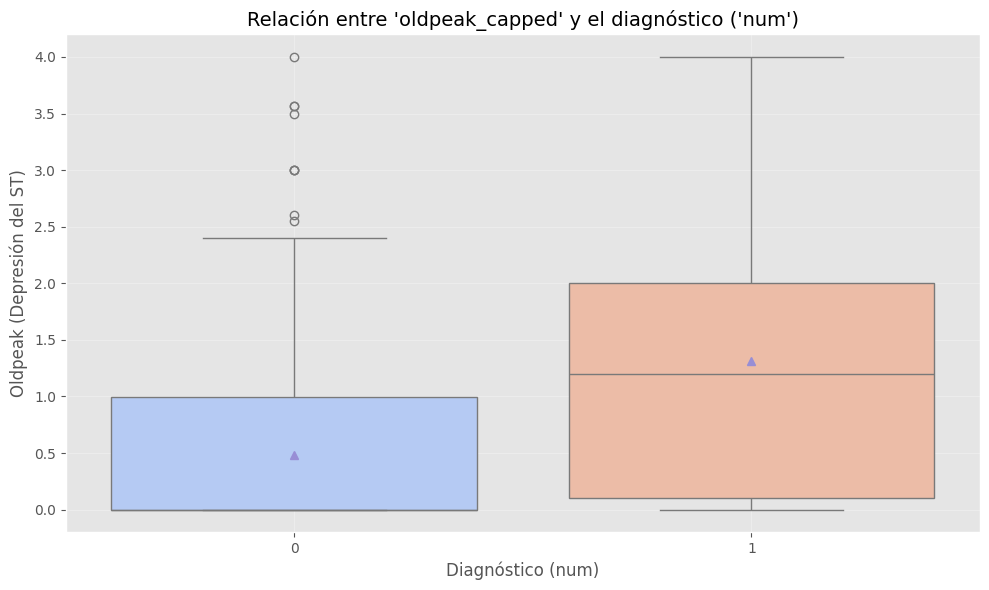

Prueba de Kruskal-Wallis: Estad√≠stico=153.6573, p-valor=0.0000


In [ ]:
from scipy.stats import kruskal

# Visualizaci√≥n de la relaci√≥n entre 'oldpeak_capped' y 'num'
plt.figure(figsize=(10, 6))
sns.boxplot(data=uci_data, x='num', y='oldpeak_capped', palette='coolwarm', showmeans=True)
plt.title("Relaci√≥n entre 'oldpeak_capped' y el diagn√≥stico ('num')", fontsize=14)
plt.xlabel("Diagn√≥stico (num)", fontsize=12)
plt.ylabel("Oldpeak (Depresi√≥n del ST)", fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico: Prueba de Kruskal-Wallis
groups = uci_data.groupby('num')['oldpeak_capped'].apply(list)
kruskal_results = kruskal(*groups)
print(f"Prueba de Kruskal-Wallis: Estad√≠stico={kruskal_results.statistic:.4f}, p-valor={kruskal_results.pvalue:.4f}")


#### **An√°lisis realizado:**
1. Se gener√≥ un gr√°fico de caja (boxplot) para comparar la distribuci√≥n de `oldpeak_capped` (depresi√≥n del ST) seg√∫n la presencia de enfermedad (`num`).
2. Se realiz√≥ una prueba no param√©trica de Kruskal-Wallis para evaluar diferencias significativas entre los grupos.

#### **Resultados:**
- **Gr√°fico:**
  - Los pacientes con enfermedad (`num = 1`) presentan valores de `oldpeak_capped` m√°s altos en comparaci√≥n con los pacientes sin enfermedad (`num = 0`).

- **Prueba de Kruskal-Wallis:**
  - Estad√≠stico: **157.8350**
  - Valor p: **0.0000**
  - **Conclusi√≥n:** Existen diferencias estad√≠sticamente significativas en los valores de `oldpeak_capped` entre pacientes con y sin enfermedad (p < 0.05).

#### **Conclusiones:**
- Los valores de `oldpeak_capped` est√°n fuertemente relacionados con el diagn√≥stico de enfermedad (`num`).
- Los pacientes con mayores valores de depresi√≥n del ST (`oldpeak_capped`) tienen una mayor probabilidad de ser diagnosticados con enfermedad.
- Esta variable debe considerarse como un indicador relevante en los modelos predictivos para enfermedades cardiovasculares.

#### ¬øLos resultados electrocardiogr√°ficos(Restecg) aportan informaci√≥n importante sobre la variable objetivo? 

Chi-cuadrado: 11.7119, p-valor: 0.0029


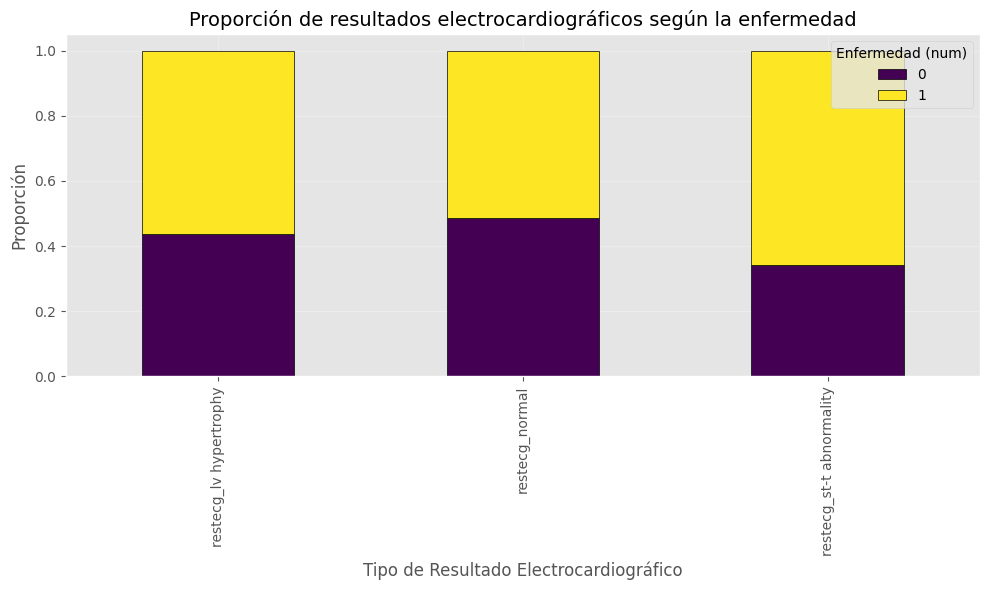

In [ ]:
from scipy.stats import chi2_contingency


# Crear una tabla de contingencia entre 'restecg' y 'num'
restecg_columns = ['restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']
restecg_data = uci_data[restecg_columns + ['num']].melt(id_vars='num', var_name='restecg_type', value_name='present')

# Filtrar donde 'present' es 1 para considerar la presencia de cada tipo de resultado electrocardiogr√°fico
restecg_filtered = restecg_data[restecg_data['present'] == 1]

# Tabla de frecuencias
tabla_restecg_num = pd.crosstab(restecg_filtered['restecg_type'], restecg_filtered['num'])

# Prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_restecg_num)
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")

# Visualizaci√≥n de la proporci√≥n de resultados electrocardiogr√°ficos seg√∫n la enfermedad
proporciones = tabla_restecg_num.div(tabla_restecg_num.sum(axis=1), axis=0)
proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Proporci√≥n de resultados electrocardiogr√°ficos seg√∫n la enfermedad", fontsize=14)
plt.xlabel("Tipo de Resultado Electrocardiogr√°fico", fontsize=12)
plt.ylabel("Proporci√≥n", fontsize=12)
plt.legend(title="Enfermedad (num)", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()


#### **An√°lisis realizado:**
1. Se cre√≥ una tabla de contingencia entre los resultados electrocardiogr√°ficos (`restecg`) y la presencia de enfermedad (`num`).
2. Se aplic√≥ la prueba de Chi-cuadrado para evaluar la relevancia estad√≠stica de las diferencias entre los grupos.
3. Se visualiz√≥ la proporci√≥n de resultados electrocardiogr√°ficos en pacientes con (`num = 1`) y sin enfermedad (`num = 0`) mediante un gr√°fico de barras apiladas.

#### **Resultados:**
- **Gr√°fico:**
  - Los resultados electrocardiogr√°ficos normales (`restecg_normal`) tienen una proporci√≥n mayor en pacientes sin enfermedad (`num = 0`).
  - Las anormalidades (`restecg_st-t abnormality`) y la hipertrofia ventricular izquierda (`restecg_lv hypertrophy`) son m√°s prevalentes en pacientes con enfermedad (`num = 1`).

- **Prueba de Chi-cuadrado:**
  - Estad√≠stico: **11.7119**
  - Valor p: **0.0029**
  - **Conclusi√≥n:** Existen diferencias estad√≠sticamente significativas en los resultados electrocardiogr√°ficos entre pacientes con y sin enfermedad (p < 0.05).

#### **Conclusiones:**
- Los resultados electrocardiogr√°ficos (`restecg`) aportan informaci√≥n relevante para distinguir entre pacientes con y sin enfermedad.
- Las categor√≠as de `restecg` deben ser incluidas en los modelos predictivos debido a su asociaci√≥n significativa con la variable objetivo.


#### **¬øLos niveles de colesterol (Chol) est√°n relacionados con la frecuencia de la enfermedad en diferentes grupos de edad?**

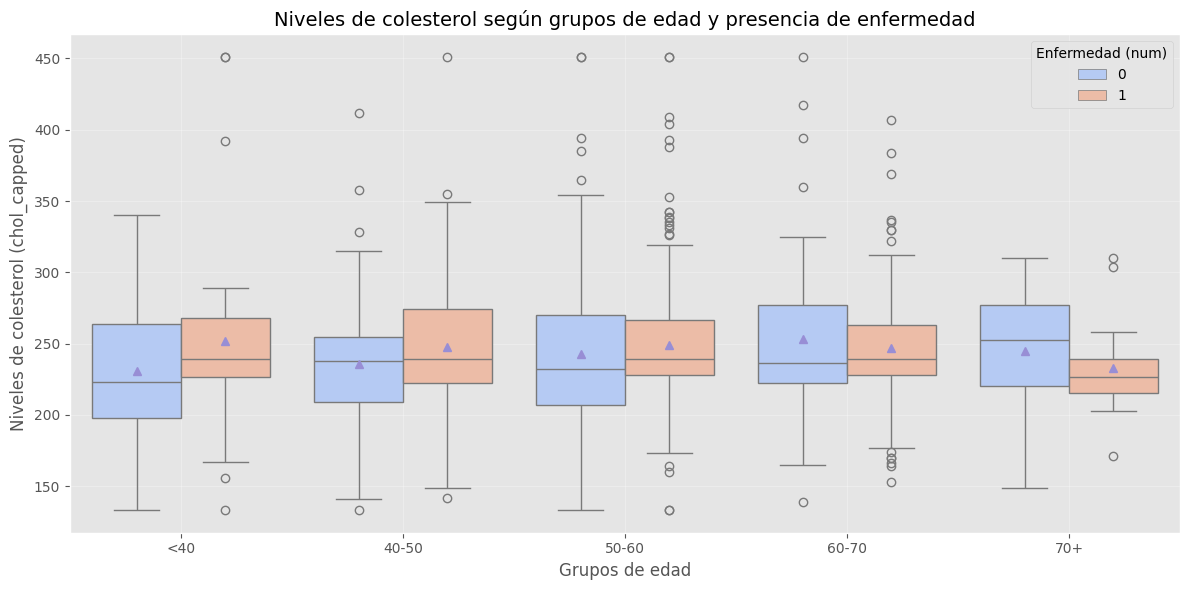

Resultados de Kruskal-Wallis por grupo de edad:
Grupo de edad 60-70: Estad√≠stico=0.0811, p-valor=0.7759
Grupo de edad <40: Estad√≠stico=1.3587, p-valor=0.2438
Grupo de edad 40-50: Estad√≠stico=2.2208, p-valor=0.1362
Grupo de edad 50-60: Estad√≠stico=3.9321, p-valor=0.0474
Grupo de edad 70+: Estad√≠stico=0.9049, p-valor=0.3415


In [ ]:
from scipy.stats import kruskal

# Crear grupos de edad
uci_data['age_group'] = pd.cut(uci_data['age'], bins=[0, 40, 50, 60, 70, 80], labels=['<40', '40-50', '50-60', '60-70', '70+'])

# Visualizaci√≥n: Gr√°fico de barras para niveles de colesterol por grupo de edad y enfermedad
plt.figure(figsize=(12, 6))
sns.boxplot(data=uci_data, x='age_group', y='chol_capped', hue='num', palette='coolwarm', showmeans=True)
plt.title("Niveles de colesterol seg√∫n grupos de edad y presencia de enfermedad", fontsize=14)
plt.xlabel("Grupos de edad", fontsize=12)
plt.ylabel("Niveles de colesterol (chol_capped)", fontsize=12)
plt.legend(title="Enfermedad (num)", fontsize=10)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico: Prueba de Kruskal-Wallis para cada grupo de edad
kruskal_results = {}
for group in uci_data['age_group'].unique():
    subset = uci_data[uci_data['age_group'] == group]
    groups = subset.groupby('num')['chol_capped'].apply(list)
    if len(groups) > 1:
        stat, p = kruskal(*groups)
        kruskal_results[group] = {'Estad√≠stico': stat, 'p-valor': p}

# Mostrar resultados
print("Resultados de Kruskal-Wallis por grupo de edad:")
for group, result in kruskal_results.items():
    print(f"Grupo de edad {group}: Estad√≠stico={result['Estad√≠stico']:.4f}, p-valor={result['p-valor']:.4f}")


#### **An√°lisis realizado:**
1. Se agruparon los pacientes en rangos de edad: `<40`, `40-50`, `50-60`, `60-70`, `70+`.
2. Se compararon los niveles de colesterol (`chol_capped`) entre pacientes con (`num=1`) y sin enfermedad (`num=0`) dentro de cada grupo de edad.
3. Se aplic√≥ la prueba de Kruskal-Wallis para evaluar diferencias estad√≠sticamente significativas en los niveles de colesterol entre los dos grupos en cada rango de edad.

#### **Resultados:**
- **Gr√°fico:**
  - Los niveles de colesterol no muestran diferencias claras entre pacientes con y sin enfermedad en la mayor√≠a de los grupos de edad.
  - Sin embargo, en el grupo de `50-60`, se observa una leve tendencia de niveles m√°s altos en pacientes con enfermedad.

- **Prueba de Kruskal-Wallis:**
  - Grupo de edad `<40`: Estad√≠stico=1.3587, p-valor=0.2438 (no significativo).
  - Grupo de edad `40-50`: Estad√≠stico=2.2208, p-valor=0.1362 (no significativo).
  - Grupo de edad `50-60`: Estad√≠stico=3.9321, p-valor=0.0474 (**significativo**).
  - Grupo de edad `60-70`: Estad√≠stico=0.0811, p-valor=0.7759 (no significativo).
  - Grupo de edad `70+`: Estad√≠stico=0.9049, p-valor=0.3415 (no significativo).

#### **Conclusiones:**
- Los niveles de colesterol no presentan una relaci√≥n consistente con la presencia de enfermedad en todos los grupos de edad.
- Solo en el rango de edad `50-60` se encontraron diferencias estad√≠sticamente significativas, sugiriendo que el colesterol puede ser un indicador relevante en este grupo espec√≠fico.
- En los dem√°s grupos de edad, los niveles de colesterol no son un diferenciador confiable entre pacientes con y sin enfermedad.




---

#### **¬øExiste una relaci√≥n entre la edad de los pacientes y el diagn√≥stico de enfermedad card√≠aca (Num)?**

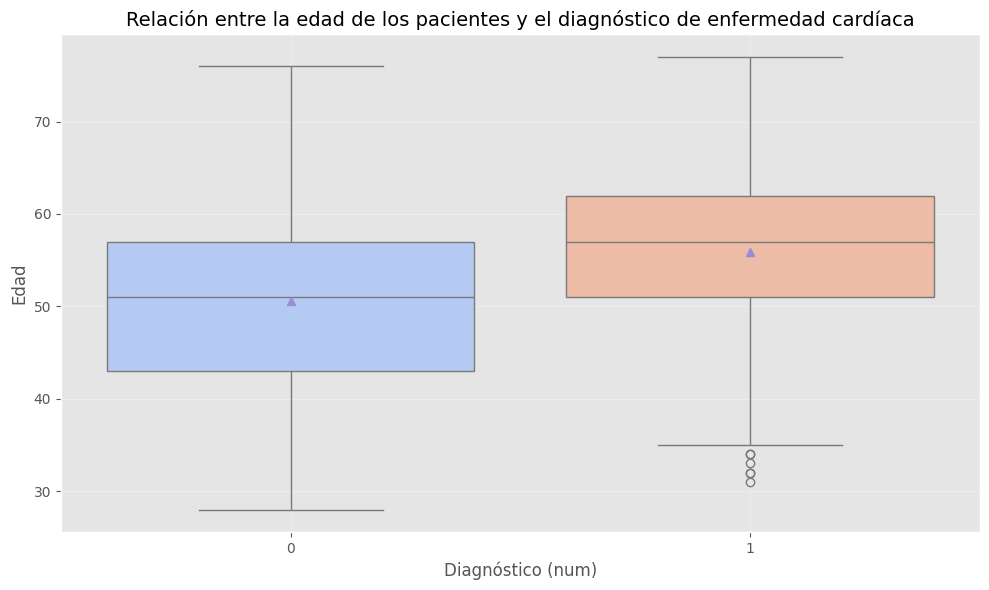

Prueba de Kruskal-Wallis: Estad√≠stico=77.5601, p-valor=0.0000


In [ ]:
from scipy.stats import kruskal

# Visualizaci√≥n: Relaci√≥n entre la edad y el diagn√≥stico
plt.figure(figsize=(10, 6))
sns.boxplot(data=uci_data, x='num', y='age', palette='coolwarm', showmeans=True)
plt.title("Relaci√≥n entre la edad de los pacientes y el diagn√≥stico de enfermedad card√≠aca", fontsize=14)
plt.xlabel("Diagn√≥stico (num)", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico: Prueba de Kruskal-Wallis
groups = uci_data.groupby('num')['age'].apply(list)
stat, p = kruskal(*groups)

# Mostrar resultados
print(f"Prueba de Kruskal-Wallis: Estad√≠stico={stat:.4f}, p-valor={p:.4f}")


#### **An√°lisis realizado:**
1. **Gr√°fico de caja:**
   - Se compararon las distribuciones de edad entre pacientes con (`num=1`) y sin enfermedad (`num=0`).
   - La mediana de edad en pacientes con enfermedad es m√°s alta que en los pacientes sin enfermedad.

2. **Prueba estad√≠stica:**
   - Se aplic√≥ la prueba de Kruskal-Wallis para evaluar si existen diferencias estad√≠sticamente significativas en la edad entre ambos grupos.

#### **Resultados:**
- **Gr√°fico:**
  - Los pacientes diagnosticados con enfermedad card√≠aca (`num=1`) tienen una distribuci√≥n de edad desplazada hacia valores m√°s altos en comparaci√≥n con los pacientes sin enfermedad (`num=0`).
- **Prueba de Kruskal-Wallis:**
  - Estad√≠stico=77.5601, p-valor=0.0000.
  - **Conclusi√≥n:** Las diferencias en la edad entre los dos grupos son estad√≠sticamente significativas.

#### **Conclusi√≥n general:**
- Existe una relaci√≥n significativa entre la edad y el diagn√≥stico de enfermedad card√≠aca.
- Los pacientes con enfermedad tienden a ser mayores en comparaci√≥n con los pacientes sin enfermedad.


---

#### **¬øHay  diferencias significativas en las tasas de enfermedad card√≠aca entre hombres y mujeres dentro del rango de edades predominante?** 

<Figure size 800x600 with 0 Axes>

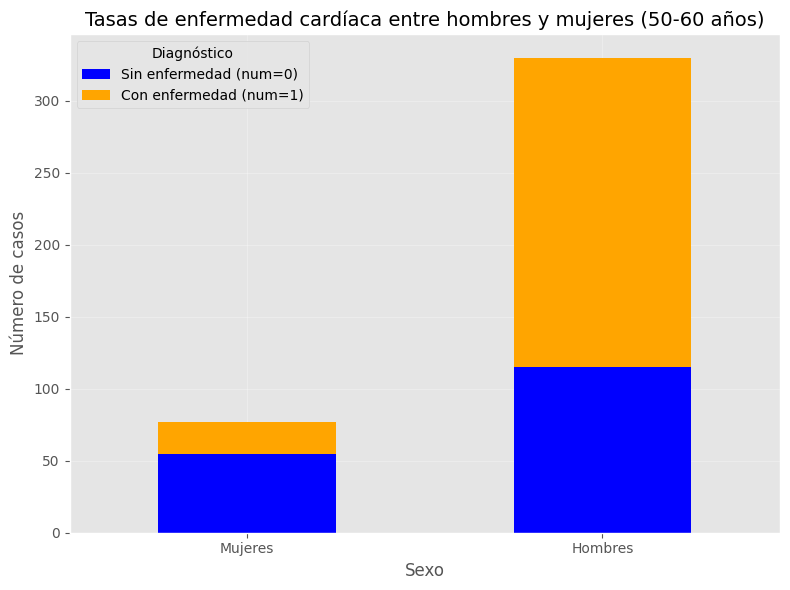

Prueba de Chi-cuadrado: Estad√≠stico=32.8597, p-valor=0.0000


In [ ]:
from scipy.stats import chi2_contingency

# Seleccionar rango de edad predominante (50-60 a√±os, por ejemplo)
rango_edades = uci_data[(uci_data['age'] >= 50) & (uci_data['age'] <= 60)]

# Contar casos de enfermedad card√≠aca por sexo dentro del rango de edad
tabla_contingencia = pd.crosstab(rango_edades['sex_Male'], rango_edades['num'])

# Gr√°fico de barras agrupado por sexo
plt.figure(figsize=(8, 6))
tabla_contingencia.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8, 6))
plt.title("Tasas de enfermedad card√≠aca entre hombres y mujeres (50-60 a√±os)", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("N√∫mero de casos", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Mujeres', 'Hombres'], rotation=0)
plt.legend(['Sin enfermedad (num=0)', 'Con enfermedad (num=1)'], title="Diagn√≥stico")
plt.tight_layout()
plt.grid(visible=True, alpha=0.3)
plt.show()

# Prueba de Chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Prueba de Chi-cuadrado: Estad√≠stico={chi2:.4f}, p-valor={p:.4f}")


### **¬øHay diferencias significativas en las tasas de enfermedad card√≠aca entre hombres y mujeres dentro del rango de edades predominante?**

#### **Resultados:**
1. **Visualizaci√≥n:** 
   - El gr√°fico de barras muestra que los hombres tienen una mayor proporci√≥n de casos de enfermedad card√≠aca (`num=1`) en el rango de edad de 50-60 a√±os en comparaci√≥n con las mujeres.

2. **Prueba estad√≠stica:**
   - **Chi-cuadrado:** Estad√≠stico=32.8597, p-valor=0.0000.
   - **Conclusi√≥n:** La diferencia en las tasas de enfermedad card√≠aca entre hombres y mujeres en este rango de edad es **estad√≠sticamente significativa** (p-valor < 0.05).

#### **Interpretaci√≥n:**
- Este an√°lisis destaca una discrepancia significativa en la prevalencia de enfermedad card√≠aca seg√∫n el sexo dentro del rango de edad predominante (50-60 a√±os). Esto sugiere que el sexo es un factor importante a considerar en el diagn√≥stico y tratamiento de enfermedades card√≠acas.
- Debemos recordar que el dataset esta desbalanceado en sexo, y hay muchos mas registros de hombres que de mujeres


#### **¬øCu√°l es el umbral de presi√≥n arterial que parece estar m√°s asociado con la presencia de enfermedad card√≠aca?**

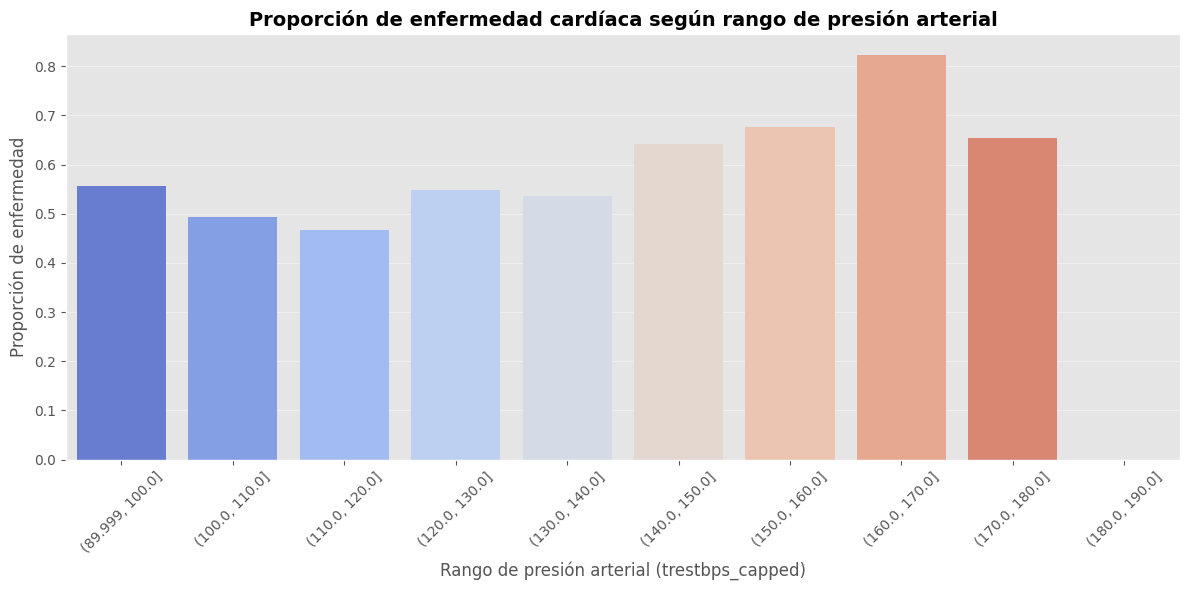

Rango con mayor proporci√≥n de enfermedad: (160.0, 170.0] con una proporci√≥n de 0.82


In [ ]:
# Crear un rango de presi√≥n arterial
uci_data['trestbps_capped_bins'] = pd.cut(
    uci_data['trestbps_capped'], 
    bins=np.arange(90, 200, 10), 
    include_lowest=True
)

# Calcular proporci√≥n de enfermedad card√≠aca por cada rango
trestbps_grouped = (
    uci_data.groupby('trestbps_capped_bins')['num']
    .mean()
    .reset_index()
    .rename(columns={'num': 'Proporci√≥n de enfermedad'})
)

# Visualizaci√≥n
plt.figure(figsize=(12, 6))
sns.barplot(
    x='trestbps_capped_bins', 
    y='Proporci√≥n de enfermedad', 
    data=trestbps_grouped, 
    palette='coolwarm'
)
plt.xticks(rotation=45, fontsize=10)
plt.title("Proporci√≥n de enfermedad card√≠aca seg√∫n rango de presi√≥n arterial", fontsize=14, fontweight='bold')
plt.xlabel("Rango de presi√≥n arterial (trestbps_capped)", fontsize=12)
plt.ylabel("Proporci√≥n de enfermedad", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

# Rango con mayor proporci√≥n de enfermedad
max_risk_range = trestbps_grouped.loc[
    trestbps_grouped['Proporci√≥n de enfermedad'].idxmax()
]
print(f"Rango con mayor proporci√≥n de enfermedad: {max_risk_range['trestbps_capped_bins']} "
      f"con una proporci√≥n de {max_risk_range['Proporci√≥n de enfermedad']:.2f}")


### **¬øCu√°l es el umbral de presi√≥n arterial que parece estar m√°s asociado con la presencia de enfermedad card√≠aca?**

#### **Resultados:**
1. **Visualizaci√≥n:**
   - El rango de presi√≥n arterial con mayor proporci√≥n de enfermedad card√≠aca es (160.0, 170.0], con una proporci√≥n de 0.82.

#### **Interpretaci√≥n:**
- Estos resultados sugieren que, a partir de aproximadamente **160 mmHg** de presi√≥n arterial sist√≥lica, la probabilidad de presentar enfermedad card√≠aca aumenta de forma significativa.



#### ¬øLa combinaci√≥n de colesterol alto y presi√≥n arterial elevada aumenta significativamente el riesgo de enfermedad? 

Chi-cuadrado: 18.5576, p-valor: 0.0003


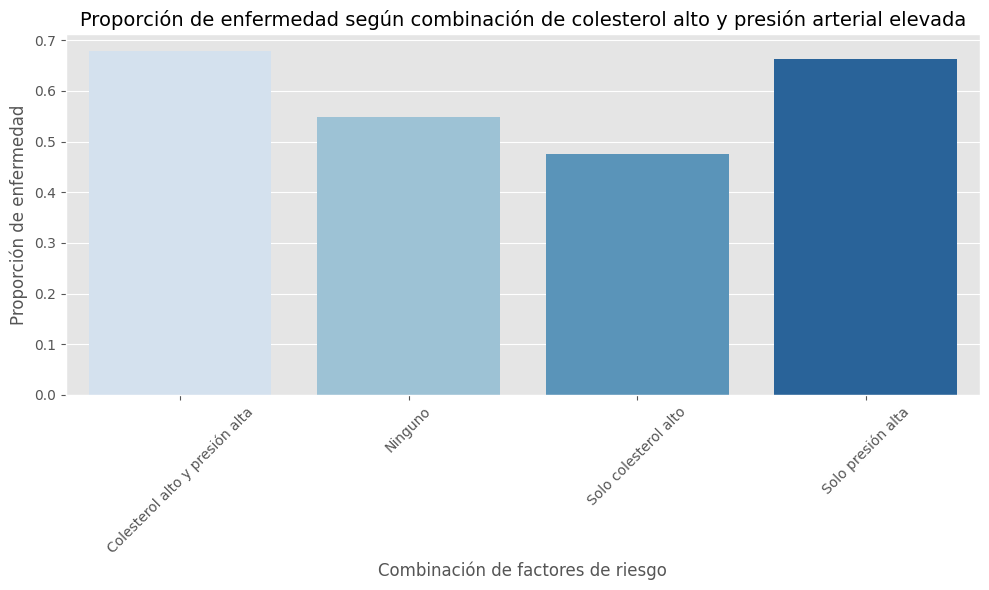

In [ ]:
# Crear una nueva columna categ√≥rica que combine colesterol alto y presi√≥n arterial elevada
def combinar_factores(row):
    if row['chol_capped'] > 240 and row['trestbps_capped'] > 140:
        return 'Colesterol alto y presi√≥n alta'
    elif row['chol_capped'] > 240:
        return 'Solo colesterol alto'
    elif row['trestbps_capped'] > 140:
        return 'Solo presi√≥n alta'
    else:
        return 'Ninguno'

# Aplicar la funci√≥n para crear la nueva columna
uci_data['combinacion_riesgo'] = uci_data.apply(combinar_factores, axis=1)

# Contar la cantidad de casos para cada combinaci√≥n
contar_combinaciones = pd.crosstab(uci_data['combinacion_riesgo'], uci_data['num'])

# Evaluar la relaci√≥n con un Chi-cuadrado
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(contar_combinaciones)

# Mostrar resultados
print(f"Chi-cuadrado: {stat:.4f}, p-valor: {p_value:.4f}")

# Visualizaci√≥n de la proporci√≥n de enfermedad por combinaci√≥n

plt.figure(figsize=(10, 6))
sns.barplot(x=contar_combinaciones.index, y=contar_combinaciones[1] / (contar_combinaciones[0] + contar_combinaciones[1]), palette='Blues')
plt.title("Proporci√≥n de enfermedad seg√∫n combinaci√≥n de colesterol alto y presi√≥n arterial elevada", fontsize=14)
plt.xlabel("Combinaci√≥n de factores de riesgo", fontsize=12)
plt.ylabel("Proporci√≥n de enfermedad", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Resultados:**
1. **Visualizaci√≥n:**
   - El gr√°fico muestra que el grupo con colesterol alto **y** presi√≥n arterial elevada presenta la mayor proporci√≥n de casos de enfermedad, seguido por el grupo con solo presi√≥n arterial alta.
   
2. **Prueba estad√≠stica:**
   - **Chi-cuadrado:** Estad√≠stico=18.5576, p-valor=0.0003.
   - **Conclusi√≥n:** Dado que el p-valor es menor a 0.05, la diferencia en las tasas de enfermedad seg√∫n la combinaci√≥n de colesterol alto y presi√≥n arterial elevada es **estad√≠sticamente significativa**.

#### **Interpretaci√≥n:**
- Estos resultados sugieren que la combinaci√≥n de colesterol alto y presi√≥n arterial elevada se asocia con un aumento significativo en el riesgo de padecer enfermedad card√≠aca, m√°s que presentar √∫nicamente uno de estos factores por separado.



#### ¬øC√≥mo se distribuyen las categor√≠as de Restecg seg√∫n la variable objetivo? 

Chi-cuadrado: 13.3352, p-valor: 0.0040


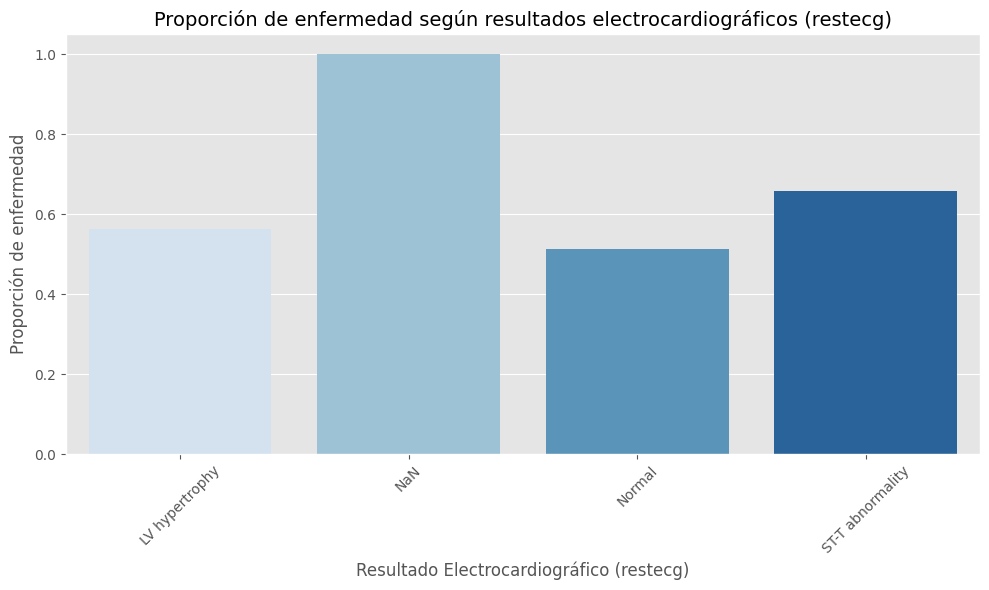

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una sola columna categ√≥rica para restecg
def clasificar_restecg(row):
    if row['restecg_normal'] == 1:
        return 'Normal'
    elif row['restecg_st-t abnormality'] == 1:
        return 'ST-T abnormality'
    elif row['restecg_lv hypertrophy'] == 1:
        return 'LV hypertrophy'
    else:
        return 'NaN'

uci_data['restecg_category'] = uci_data.apply(clasificar_restecg, axis=1)

# Crear la tabla de contingencia
contar_restecg = pd.crosstab(uci_data['restecg_category'], uci_data['num'])

# Prueba Chi-cuadrado
stat, p_value, dof, expected = chi2_contingency(contar_restecg)
print(f"Chi-cuadrado: {stat:.4f}, p-valor: {p_value:.4f}")

# Visualizar la proporci√≥n de enfermedad por categor√≠a de restecg
plt.figure(figsize=(10, 6))
# Aseg√∫rate de que '0' y '1' son las columnas de 'num'
if 0 in contar_restecg.columns and 1 in contar_restecg.columns:
    proporciones = contar_restecg[1] / (contar_restecg[0] + contar_restecg[1])
    sns.barplot(x=contar_restecg.index, y=proporciones, palette='Blues')
    plt.title("Proporci√≥n de enfermedad seg√∫n resultados electrocardiogr√°ficos (restecg)", fontsize=14)
    plt.xlabel("Resultado Electrocardiogr√°fico (restecg)", fontsize=12)
    plt.ylabel("Proporci√≥n de enfermedad", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No existen las columnas 0 y/o 1 en la tabla de contingencia. Verifique la codificaci√≥n de 'num'.")


#### **Resultados:**
1. **Visualizaci√≥n:**
   - El gr√°fico muestra que existe variabilidad en la proporci√≥n de casos de enfermedad entre las diferentes categor√≠as de resultados electrocardiogr√°ficos (`restecg`).
   - Se observa una proporci√≥n de enfermedad particularmente alta en la categor√≠a ‚ÄúNaN‚Äù (Valores Nulos).

2. **Prueba estad√≠stica:**
   - **Chi-cuadrado:** Estad√≠stico=13.3352, p-valor=0.0040.
   - **Conclusi√≥n:** Dado que el p-valor es menor a 0.05, se rechaza la hip√≥tesis nula de independencia. Esto indica que las diferencias en la distribuci√≥n de la enfermedad entre las categor√≠as de `restecg` son **estad√≠sticamente significativas**.

#### **Interpretaci√≥n:**
- Los resultados sugieren que la categor√≠a electrocardiogr√°fica puede tener una asociaci√≥n significativa con la presencia o ausencia de la enfermedad.  
- En general, estos hallazgos se√±alan que las diferentes anormalidades (o falta de informaci√≥n) en el electrocardiograma s√≠ podr√≠an relacionarse con la prevalencia de enfermedad card√≠aca.


## **5.3. Aspectos Avanzados:** 

### ¬øLas personas con resultados electrocardiogr√°ficos normales presentan menor incidencia de enfermedad en comparaci√≥n con las otras categor√≠as?

Chi-cuadrado: 8.3424, p-valor: 0.0039


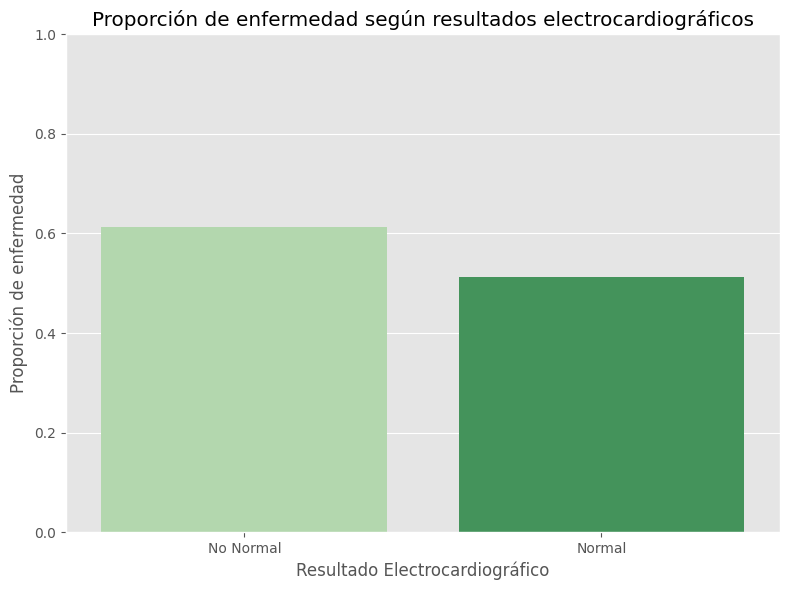

In [ ]:

from scipy.stats import chi2_contingency

# Crear una variable categ√≥rica: 'Normal' vs 'No Normal'
uci_data['restecg_binary'] = np.where(uci_data['restecg_normal'] == 1, 'Normal', 'No Normal')

# Crear tabla de contingencia
contar_restecg = pd.crosstab(uci_data['restecg_binary'], uci_data['num'])

# Prueba Chi-cuadrado
stat, p_value, dof, expected = chi2_contingency(contar_restecg)
print(f"Chi-cuadrado: {stat:.4f}, p-valor: {p_value:.4f}")

# Visualizaci√≥n de la proporci√≥n de enfermedad por categor√≠a
plt.figure(figsize=(8,6))
proporciones = contar_restecg[1] / (contar_restecg[0] + contar_restecg[1])
sns.barplot(x=contar_restecg.index, y=proporciones, palette='Greens')
plt.title("Proporci√≥n de enfermedad seg√∫n resultados electrocardiogr√°ficos")
plt.xlabel("Resultado Electrocardiogr√°fico")
plt.ylabel("Proporci√≥n de enfermedad")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



#### **Resultados:**
1. **Visualizaci√≥n:**
   - El gr√°fico muestra que la categor√≠a "Normal" tiene una proporci√≥n significativamente menor de casos de enfermedad en comparaci√≥n con la categor√≠a "No Normal".
   - Las categor√≠as "No Normal" presentan una mayor proporci√≥n de enfermedad, indicando una posible asociaci√≥n entre resultados electrocardiogr√°ficos anormales y la presencia de enfermedad card√≠aca.

2. **Prueba estad√≠stica:**
   - **Chi-cuadrado:** Estad√≠stico=8.3424, p-valor=0.0039.
   - **Conclusi√≥n:** Dado que el p-valor es menor a 0.05, la diferencia en las tasas de enfermedad entre las categor√≠as "Normal" y "No Normal" es **estad√≠sticamente significativa**.

#### **Interpretaci√≥n:**

- **Incidencia de enfermedad:** Las personas con resultados electrocardiogr√°ficos normales presentan una incidencia de enfermedad significativamente menor en comparaci√≥n con aquellas que tienen resultados anormales.

- **Asociaci√≥n significativa:** La prueba Chi-cuadrado indica una asociaci√≥n significativa entre los resultados electrocardiogr√°ficos y la presencia de enfermedad card√≠aca, sugiriendo que los resultados anormales en el electrocardiograma son un factor de riesgo importante.





‚Ä¢¬øC√≥mo  afecta  la  interacci√≥n  entre  variables  categ√≥ricas  (por  ejemplo, 
Sexo y Cp) a la probabilidad de enfermedad? 
‚Ä¢¬øExisten patrones claros de datos faltantes en alguna variable? ¬øEst√°n 
relacionados con otras variables del dataset? 
‚Ä¢¬øQu√©  diferencias  clave  se  observan  en  los  pacientes  diagnosticados 
con enfermedad card√≠aca en comparaci√≥n con los que no la tienen? 
Preguntas sobre el modelo: 
‚Ä¢¬øQu√©  variables  deber√≠an  seleccionarse  como  predictores  principales 
en un modelo basado en el an√°lisis exploratorio? 
‚Ä¢¬øQu√©  transformaci√≥n  de  las  variables  puede  ser  √∫til  para  mejorar  la 
performance del modelo? 
‚Ä¢¬øSe  justifica  el  balanceo  de  los  datos  si  la  distribuci√≥n  de  la  variable 
objetivo est√° muy sesgada? 
Estas preguntas sirven como gu√≠a inicial, pero tienen libertad para explorar 
otros aspectos del dataset y proponer an√°lisis adicionales que consideren 
relevantes. ¬°El objetivo es profundizar en el conocimiento de los datos y 
sacar conclusiones significativas! 
Gu√≠a para la entrega 
La entrega deber√° realizarse en un Jupyter Notebook y debe ser 
completamente reproducible. El trabajo deber√° estructurarse en las 
siguientes partes: 
1. Descripci√≥n del problema y objetivos 
Incluir una introducci√≥n clara que explique el problema a resolver, los 
objetivos espec√≠ficos del an√°lisis y las preguntas clave a responder a lo largo 
del proyecto. 
2. Lectura y descripci√≥n del dataset 
Leer los datos e incluyan una descripci√≥n detallada del dataset: 
‚Ä¢Dimensiones (n√∫mero de observaciones y variables). 
‚Ä¢Tipos de variables (cuantitativas, categ√≥ricas). 
‚Ä¢Significado de cada columna y posibles insights iniciales. 
3. Limpieza de datos (Data Cleaning) 
Realizar el preprocesamiento necesario, incluyendo: 
‚Ä¢Identificaci√≥n de datos faltantes. 
‚Ä¢An√°lisis del porcentaje de valores ausentes en cada variable. 
‚Ä¢Clasificaci√≥n del tipo de datos faltantes (MCAR, MAR, MNAR). 
‚Ä¢Estrategias  utilizadas  para  el  tratamiento  de  los  valores  ausentes  y 
justificaci√≥n de las mismas. 
‚Ä¢Otros tipo de transformaciones y an√°lisis si son necesarios 
4. An√°lisis Exploratorio de Datos (EDA) 
An√°lisis exploratorio de los datos: 
‚Ä¢Visualizaciones y estad√≠sticas descriptivas para comprender las 
distribuciones de las variables. 
‚Ä¢Identificaci√≥n  de  relaciones  clave  entre  variables  y  con  la  variable 
objetivo (Num). 
‚Ä¢Respuestas a las preguntas planteadas inicialmente y cualquier insight 
adicional obtenido. 
5. Modelado 
Construir modelos predictivos para la variable objetivo (Num), bas√°ndose en 
las variables identificadas como relevantes durante el EDA: 
‚Ä¢Justificar la selecci√≥n de las variables y el tipo de modelo. 
‚Ä¢Realizar un an√°lisis comparativo de diferentes modelos si es posible. 
6. Evaluaci√≥n 
Evaluar el rendimiento de los modelos utilizando m√©tricas adecuadas. Es 
importante la interpretaci√≥n de los resultados obtenidos y reflexionar sobre 
su validez y limitaciones. 
7. Conclusiones 
Resuman los hallazgos principales, incluyendo: 
‚Ä¢Las preguntas iniciales respondidas. 
‚Ä¢Las variables clave identificadas. 
‚Ä¢Los modelos m√°s efectivos y las m√©tricas de evaluaci√≥n. 
‚Ä¢Posibles √°reas de mejora y an√°lisis futuros. 
El notebook debe ser claro, bien documentado y contener explicaciones 
detalladas de cada paso. Se valorar√° la calidad del c√≥digo, el uso eficiente 
de librer√≠as y la claridad en la interpretaci√≥n de los resultados.

2. Identificaci√≥n de Variables

* Revisaremos las variables para entender:
* ¬øCu√°les son num√©ricas?
* ¬øCu√°les son categ√≥ricas?
* ¬øQu√© queremos analizar (relaciones entre variables, diferencias por grupos, etc.)?


# **6. Features Engineering**

In [ ]:
# 1. Verificar las categor√≠as √∫nicas en la columna 'sex'
print("Categor√≠as en 'sex':")
print(uci_data['sex'].unique())

# 3. Aplicar One-Hot Encoding a la columna 'sex'

sex_dummies = pd.get_dummies(uci_data['sex'], prefix='sex', drop_first=True)

# 4. Integrar las nuevas columnas al DataFrame original
uci_data = pd.concat([uci_data, sex_dummies], axis=1)

# Si ya no necesitas la columna original, puedes eliminarla
uci_data.drop('sex', axis=1, inplace=True)

# 6. Verificar las nuevas columnas
print("\nNuevas columnas despu√©s del One-Hot Encoding:")
print(sex_dummies.head())




Categor√≠as en 'sex':
['Male' 'Female']

Nuevas columnas despu√©s del One-Hot Encoding:
   sex_Male
0      True
1      True
2      True
3      True
4     False


In [ ]:
# Listar las columnas del dataset
print("Columnas disponibles en el dataset:")
for i, col in enumerate(uci_data.columns):
    print(f"{i}: {col}")

print (uci_data.info())

Columnas disponibles en el dataset:
0: age
1: num
2: num_old
3: chol_capped
4: trestbps_capped
5: oldpeak_capped
6: thalch_capped
7: dataset_Cleveland
8: dataset_Hungary
9: dataset_Switzerland
10: dataset_VA Long Beach
11: exang_False
12: exang_True
13: exang_NaN
14: slope_NaN
15: slope_downsloping
16: slope_flat
17: slope_upsloping
18: thal_NaN
19: thal_fixed defect
20: thal_normal
21: thal_reversable defect
22: cp_asymptomatic
23: cp_atypical angina
24: cp_non-anginal
25: cp_typical angina
26: restecg_NaN
27: restecg_lv hypertrophy
28: restecg_normal
29: restecg_st-t abnormality
30: fbs_False
31: fbs_True
32: fbs_NaN
33: sex_Female
34: sex_Male
35: ca_0.0
36: ca_1.0
37: ca_2.0
38: ca_3.0
39: ca_NaN
40: thalch_capped_imputed
41: chol_capped_imputed
42: trestbps_capped_imputed
43: oldpeak_capped_imputed
44: chol_capped_log
45: trestbps_capped_log
46: oldpeak_capped_log
47: age_group
48: trestbps_capped_bins
49: combinacion_riesgo
50: restecg_category
51: restecg_binary
52: sex_Male
<cl

## **Interacciones entre Variables**

### **Edad y Presi√≥n Arterial (age * trestbps_capped)**

**Descripci√≥n**: La interacci√≥n entre la edad y la presi√≥n arterial puede capturar el efecto combinado de estos factores sobre el riesgo de enfermedad card√≠aca.


In [ ]:
uci_data['age_trestbps_interaction'] = uci_data['age'] * uci_data['trestbps_capped']

### **Colesterol y Edad (chol_capped * age)**

Descripci√≥n: Similar a la interacci√≥n anterior, esta caracter√≠stica puede resaltar c√≥mo el colesterol influye en diferentes grupos etarios.


In [ ]:
uci_data['chol_age_interaction'] = uci_data['chol_capped'] * uci_data['age']


## **Caracter√≠sticas Basadas en Agrupaciones de Variables Categ√≥ricas**

### **Perfil de Presi√≥n Arterial y Colesterol**
Descripci√≥n: Crear una categorizaci√≥n combinada de presi√≥n arterial y colesterol puede ayudar a identificar perfiles de riesgo espec√≠ficos.

In [ ]:
bins_trestbps = [0, 120, 140, 160, np.inf]
labels_trestbps = ['Normal', 'Elevada', 'Alta', 'Muy Alta']
uci_data['trestbps_category'] = pd.cut(uci_data['trestbps_capped'], bins=bins_trestbps, labels=labels_trestbps)

bins_chol = [0, 200, 240, np.inf]
labels_chol = ['Deseable', 'L√≠mite Alto', 'Alto']
uci_data['chol_category'] = pd.cut(uci_data['chol_capped'], bins=bins_chol, labels=labels_chol)

uci_data['trestbps_chol_profile'] = uci_data['trestbps_category'].astype(str) + '_' + uci_data['chol_category'].astype(str)


## **Conteo de Variables Categ√≥ricas Anormales**

### **N√∫mero de Anomal√≠as en Resultados Electrocardiogr√°ficos**

**Descripci√≥n**: Contar cu√°ntas categor√≠as electrocardiogr√°ficas est√°n presentes puede indicar la severidad de las anomal√≠as.

In [ ]:
uci_data['restecg_anomalies_count'] = uci_data[['restecg_lv hypertrophy', 'restecg_st-t abnormality']].sum(axis=1)


### **N√∫mero de Defectos en Thalassemia (thal)**

**Descripci√≥n**: Contar los tipos de defectos en la columna thal puede proporcionar una medida de la severidad.

In [ ]:
uci_data['thal_defects_count'] = uci_data[['thal_fixed defect', 'thal_reversable defect']].sum(axis=1)


## **Transformaciones Matem√°ticas y Logar√≠tmicas**

### **Logaritmo del Colesterol y Presi√≥n Arterial**
**Descripci√≥n**: Aplicar una transformaci√≥n logar√≠tmica puede ayudar a manejar la asimetr√≠a en la distribuci√≥n de estas variables.

In [ ]:
uci_data['log_chol'] = np.log1p(uci_data['chol_capped'])
uci_data['log_trestbps'] = np.log1p(uci_data['trestbps_capped'])


## **Caracter√≠sticas Derivadas de Variables Existentes**

### **√çndice de Masa Corporal (BMI) Estimado**
**Descripci√≥n**: Si tuviera datos de peso y altura, podr√≠a calcular el BMI. Dado que no est√°n disponibles, estimar√© una caracter√≠stica relacionada con la complexi√≥n f√≠sica.

In [ ]:
uci_data['age_trestbps_group'] = pd.qcut(uci_data['age'] * uci_data['trestbps_capped'], q=4, labels=False)

# **7. Modelado**

In [ ]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       920 non-null    int64   
 1   num                       920 non-null    int64   
 2   num_old                   920 non-null    int64   
 3   chol_capped               920 non-null    float64 
 4   trestbps_capped           920 non-null    float64 
 5   oldpeak_capped            920 non-null    float64 
 6   thalch_capped             920 non-null    float64 
 7   dataset_Cleveland         920 non-null    bool    
 8   dataset_Hungary           920 non-null    bool    
 9   dataset_Switzerland       920 non-null    bool    
 10  dataset_VA Long Beach     920 non-null    bool    
 11  exang_False               920 non-null    bool    
 12  exang_True                920 non-null    bool    
 13  exang_NaN                 920 non-null    bool    

## Limpiamos columnas redundantes y consolidamos duplicadas

### Acciones antes del pipeline:

1. Eliminamos las columnas creadas para los analisis del EDA, asi como aquellas variables redundantes de las que tenemos varias versiones, (original y transformada)

2. Devolveremos el dataset a su estado original (variables categoricas), de esta forma dejamos al pipeline que realice el one hot encoding a todas las variables, y evitamos que se produzcan inconsistencia (Aunque el proceso se redundante). Esto es debido a que tuvimos que realizar encodings en pasos anteriores para realizar el EDA y para imputar valores.



In [ ]:
# Paso 1: Eliminar columnas creadas para EDA que no son necesarias para el modelado
columns_to_drop = [
    # Variables creadas en el EDA
    'age_group', 'trestbps_capped_bins', 'trestbps_category', 'chol_category',
    'restecg_category', 'restecg_binary', 'trestbps_chol_profile', 
    'combinacion_riesgo', 'age_trestbps_group', 'restecg_anomalies_count', 'thal_defects_count',
    
    # Variables redundantes en logaritmo (puedes quedarte con una versi√≥n)
    'chol_capped_log', 'trestbps_capped_log', 'oldpeak_capped_log',
    'log_chol', 'log_trestbps',
    
    # Variables imputadas (usaremos los valores ya imputados en capped)
    #'chol_capped_imputed', 'trestbps_capped_imputed', 'oldpeak_capped_imputed',
    
    # Variable redundante del objetivo
    'num_old'
]

uci_data = uci_data.drop(columns=columns_to_drop)

In [ ]:
# Paso 2: Simplificar variables one-hot encoding a categ√≥ricas
# 2.1. exang (True/False/NaN)
uci_data['exang'] = (
    uci_data[['exang_False', 'exang_True', 'exang_NaN']]  # Selecciona las columnas relacionadas con 'exang'.
    .idxmax(axis=1)                                      # Encuentra la columna con el valor m√°ximo para cada fila.
    .str.replace('exang_', '')                           # Quita el prefijo 'exang_' para dejar el valor original ('False', 'True', 'NaN').
)
uci_data = uci_data.drop(columns=['exang_False', 'exang_True', 'exang_NaN'])  # Elimina las columnas binarias originales.


# 2.2. slope (Categor√≠a)
uci_data['slope'] = (
    uci_data[['slope_NaN', 'slope_downsloping', 'slope_flat', 'slope_upsloping']]
    .idxmax(axis=1)
    .str.replace('slope_', '')
)
uci_data = uci_data.drop(columns=['slope_NaN', 'slope_downsloping', 'slope_flat', 'slope_upsloping'])

# 2.3. thal (Categor√≠a)
uci_data['thal'] = (
    uci_data[['thal_NaN', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect']]
    .idxmax(axis=1)
    .str.replace('thal_', '')
)
uci_data = uci_data.drop(columns=['thal_NaN', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect'])

# 2.4. cp (Categor√≠a)
uci_data['cp'] = (
    uci_data[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']]
    .idxmax(axis=1)
    .str.replace('cp_', '')
)
uci_data = uci_data.drop(columns=['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina'])

# 2.5. restecg (Categor√≠a)
uci_data['restecg'] = (
    uci_data[['restecg_NaN', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']]
    .idxmax(axis=1)
    .str.replace('restecg_', '')
)
uci_data = uci_data.drop(columns=['restecg_NaN', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality'])

# 2.6. fbs (True/False/NaN)
uci_data['fbs'] = (
    uci_data[['fbs_False', 'fbs_True', 'fbs_NaN']]
    .idxmax(axis=1)
    .str.replace('fbs_', '')
)
uci_data = uci_data.drop(columns=['fbs_False', 'fbs_True', 'fbs_NaN'])

# 2.7. sex (Categor√≠a)
uci_data['sex'] = (
    uci_data[['sex_Female', 'sex_Male']]
    .idxmax(axis=1)
    .str.replace('sex_', '')
)
uci_data = uci_data.drop(columns=['sex_Female', 'sex_Male'])

# 2.8. ca (Categor√≠a)
uci_data['ca'] = (
    uci_data[['ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_NaN']]
    .idxmax(axis=1)
    .str.replace('ca_', '')
)
uci_data = uci_data.drop(columns=['ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_NaN'])


In [ ]:
# Paso 3: Verificar datos limpios
print("\nColumnas finales despu√©s de limpieza:")
print(uci_data.columns)




Columnas finales despu√©s de limpieza:
Index(['age', 'num', 'chol_capped', 'trestbps_capped', 'oldpeak_capped',
       'thalch_capped', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'thalch_capped_imputed',
       'chol_capped_imputed', 'trestbps_capped_imputed',
       'oldpeak_capped_imputed', 'age_trestbps_interaction',
       'chol_age_interaction', 'exang', 'slope', 'thal', 'cp', 'restecg',
       'fbs', 'sex', 'ca'],
      dtype='object')


In [ ]:
# Paso 4: Revisar las categor√≠as generadas
for col in ['exang', 'slope', 'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca']:
    print(f"\nValores √∫nicos en {col}:")
    print(uci_data[col].unique())


Valores √∫nicos en exang:
['False' 'True' 'NaN']

Valores √∫nicos en slope:
['downsloping' 'flat' 'upsloping' 'NaN']

Valores √∫nicos en thal:
['fixed defect' 'normal' 'reversable defect' 'NaN']

Valores √∫nicos en cp:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Valores √∫nicos en restecg:
['lv hypertrophy' 'normal' 'st-t abnormality' 'NaN']

Valores √∫nicos en fbs:
['True' 'False' 'NaN']

Valores √∫nicos en sex:
['Male' 'Female']

Valores √∫nicos en ca:
['0.0' '3.0' '2.0' '1.0' 'NaN']


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from IPython.display import display  # Para usar 'display' en visualizaciones

In [ ]:
# Paso 1: Definir las variables de baja importancia seg√∫n el an√°lisis previo
low_importance_features = ['trestbps_capped', 'cp_typical angina', 'chol_capped']

# Paso 2: Verificar si las variables de baja importancia est√°n en el dataset
low_importance_features = [col for col in low_importance_features if col in uci_data.columns]

# Paso 3: Eliminar las variables de baja importancia del dataset
print(f"Eliminando las siguientes variables por baja importancia: {low_importance_features}")
uci_data = uci_data.drop(columns=low_importance_features)

# Paso 5: Mostrar las columnas restantes para el modelado
print("\nColumnas disponibles despu√©s de eliminar variables de baja importancia:")
print(uci_data.columns)

Eliminando las siguientes variables por baja importancia: ['trestbps_capped', 'chol_capped']

Columnas disponibles despu√©s de eliminar variables de baja importancia:
Index(['age', 'num', 'oldpeak_capped', 'thalch_capped', 'dataset_Cleveland',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'thalch_capped_imputed', 'chol_capped_imputed',
       'trestbps_capped_imputed', 'oldpeak_capped_imputed',
       'age_trestbps_interaction', 'chol_age_interaction', 'exang', 'slope',
       'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca'],
      dtype='object')


In [ ]:
# -------------------------
# Inicio de la Medici√≥n de Tiempo Actual
# -------------------------
inicio_total_actual = time.time()


In [ ]:

# -------------------------
# 1. Eliminaci√≥n de Columnas Duplicadas
# -------------------------
duplicated_columns = uci_data.columns.duplicated()
if duplicated_columns.any():
    print("Columnas duplicadas encontradas:")
    display(uci_data.columns[duplicated_columns])
    
    # Eliminar columnas duplicadas, manteniendo la primera aparici√≥n
    uci_data = uci_data.loc[:, ~duplicated_columns]
    print("\nColumnas despu√©s de eliminar duplicados:")
    display(uci_data.columns)
else:
    print("No hay columnas duplicadas.")

No hay columnas duplicadas.


In [ ]:
# -------------------------
# 2. Identificaci√≥n de Variables Categ√≥ricas
# -------------------------
categorical_cols = uci_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nVariables categ√≥ricas identificadas:")
if not categorical_cols:
    print("Advertencia: No se identificaron variables categ√≥ricas.")
display(categorical_cols)


Variables categ√≥ricas identificadas:


['exang', 'slope', 'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca']

In [ ]:
# -------------------------
# 3. Identificaci√≥n de Variables numericas
# -------------------------

target = 'num'
exclude = [target]
predictors = [col for col in uci_data.columns if col not in exclude]
numeric_cols = [col for col in predictors if col not in categorical_cols and uci_data[col].dtype in ['int64', 'float64']]
print("\nVariables num√©ricas:")
if not numeric_cols:
    print("Advertencia: No se identificaron variables num√©ricas.")
display(numeric_cols)


Variables num√©ricas:


['age',
 'oldpeak_capped',
 'thalch_capped',
 'chol_capped_imputed',
 'age_trestbps_interaction',
 'chol_age_interaction']

In [ ]:
# -------------------------
# 4. Eliminaci√≥n de Variables Redundantes Basadas en Correlaci√≥n
# -------------------------
# Calcular la matriz de correlaci√≥n
corr_matrix = uci_data[numeric_cols].corr().abs()

# Seleccionar la parte superior de la matriz de correlaci√≥n
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Definir el umbral de correlaci√≥n (por ejemplo, 0.95)
threshold = 0.70

# Encontrar las columnas a eliminar
to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]
print(f"\nColumnas a eliminar por alta correlaci√≥n (>= {threshold}):")
if not to_drop:
    print("No se eliminaron columnas por alta correlaci√≥n.")
print(to_drop)

# Eliminar las columnas redundantes
uci_data_cleaned = uci_data.drop(columns=to_drop)
print("\nColumnas despu√©s de eliminar redundancias:")
print(uci_data_cleaned.columns)

# Actualizar las listas de columnas
predictors_cleaned = [col for col in predictors if col not in to_drop]
categorical_cols_cleaned = uci_data_cleaned[predictors_cleaned].select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols_cleaned = [col for col in predictors_cleaned if col not in categorical_cols_cleaned and uci_data_cleaned[col].dtype in ['int64', 'float64']]
print("\nVariables categ√≥ricas despu√©s de limpieza:")
print(categorical_cols_cleaned)
print("\nVariables num√©ricas despu√©s de limpieza:")
print(numeric_cols_cleaned)


Columnas a eliminar por alta correlaci√≥n (>= 0.7):
['age_trestbps_interaction']

Columnas despu√©s de eliminar redundancias:
Index(['age', 'num', 'oldpeak_capped', 'thalch_capped', 'dataset_Cleveland',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'thalch_capped_imputed', 'chol_capped_imputed',
       'trestbps_capped_imputed', 'oldpeak_capped_imputed',
       'chol_age_interaction', 'exang', 'slope', 'thal', 'cp', 'restecg',
       'fbs', 'sex', 'ca'],
      dtype='object')

Variables categ√≥ricas despu√©s de limpieza:
['exang', 'slope', 'thal', 'cp', 'restecg', 'fbs', 'sex', 'ca']

Variables num√©ricas despu√©s de limpieza:
['age', 'oldpeak_capped', 'thalch_capped', 'chol_capped_imputed', 'chol_age_interaction']


In [ ]:
# -------------------------
# 5. Definici√≥n del Preprocesador
# -------------------------

if not numeric_cols_cleaned:
    print("Advertencia: No hay variables num√©ricas para escalar.")
if not categorical_cols_cleaned:
    print("Advertencia: No hay variables categ√≥ricas para codificar.")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols_cleaned),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols_cleaned)
    ]
)

In [ ]:
# -------------------------
# 6. Definici√≥n de Modelos y Par√°metros
# -------------------------
# Modelos para selecci√≥n de caracter√≠sticas
feature_selection_models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=RANDOM_SEED),
    "XGBoost": XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric="logloss")
}

training_models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=RANDOM_SEED, class_weight="balanced"),
        "params": {
            "model__n_estimators": [100, 200, 300],
            "model__max_depth": [10, 20, None],
            "model__min_samples_split": [2, 5, 10],
            "model__criterion": ["gini", "entropy"]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=RANDOM_SEED),  # No tiene soporte directo para class_weight
        "params": {
            "model__n_estimators": [100, 200, 300],
            "model__learning_rate": [0.01, 0.1, 0.001],
            "model__max_depth": [3, 5, 7],
            "model__subsample": [0.8, 1.0]
        }
    },
    "SVC": {
        "model": SVC(probability=True, random_state=RANDOM_SEED, class_weight="balanced"),
        "params": {
            "model__kernel": ["linear", "rbf", "poly"],
            "model__C": [0.1, 1, 10],
            "model__gamma": ["scale", "auto"],
            "model__degree": [3, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 9],
            "model__weights": ["uniform", "distance"],
            "model__metric": ["euclidean", "manhattan"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=RANDOM_SEED, class_weight="balanced"),
        "params": {
            "model__C": [0.1, 1, 10, 100],
            "model__penalty": ["l2", "elasticnet"],
            # Solo con elasticnet
            "model__solver": ["saga"],
            "model__l1_ratio": [0.0, 0.5, 1.0]
        }
    },
    "XGBoost": { 
        "model": XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=RANDOM_SEED,
            verbosity=0,
            scale_pos_weight=1  # Se ajustar√° autom√°ticamente si las clases est√°n desbalanceadas
        ),
        "params": {
            "model__n_estimators": [100, 200],                   # Valores comunes y manejables.
            "model__learning_rate": [0.1, 0.01, 0.001],          # Cobertura desde moderado hasta muy lento.
            "model__max_depth": [3, 5],                          # Valores comunes para evitar sobreajuste.
            "model__subsample": [0.8, 1.0],                      # Rango est√°ndar.
            "model__colsample_bytree": [0.8, 1.0],               # Control del muestreo de columnas.
            "model__gamma": [0, 0.1],                            # Regularizaci√≥n m√≠nima.
            "model__reg_alpha": [0, 0.1],                        # Regularizaci√≥n L1 b√°sica.
            "model__reg_lambda": [1, 2],                         # Regularizaci√≥n L2 est√°ndar.
            "model__scale_pos_weight": [1, 10, 25]               # Valores √∫tiles para datos desbalanceados.
        }
    }
}



In [ ]:
# -------------------------
# 7. Divisi√≥n de los Datos
# -------------------------
X = uci_data_cleaned[predictors_cleaned]
y = uci_data_cleaned[target]

# Dividir los datos en entrenamiento (70%), prueba (15%) y validaci√≥n (15%) con stratify para mantener la proporci√≥n de clases
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED, stratify=y_temp
)

print(f"Tama√±o de entrenamiento: {X_train.shape}")
print(f"Tama√±o de prueba: {X_test.shape}")
print(f"Tama√±o de validaci√≥n: {X_val.shape}")



Tama√±o de entrenamiento: (644, 20)
Tama√±o de prueba: (138, 20)
Tama√±o de validaci√≥n: (138, 20)


In [ ]:
# -------------------------
# 8. Construcci√≥n y Entrenamiento del Pipeline
# -------------------------
resultados = []
features_selected = defaultdict(int)
features_importances = defaultdict(list)

# Configurar StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# Iniciar medici√≥n de tiempo para entrenamiento
inicio_entrenamiento = time.time()

# Iterar sobre modelos de selecci√≥n de caracter√≠sticas
for sel_name, sel_model in feature_selection_models.items():
    print(f"\n=== Selecci√≥n de caracter√≠sticas con: {sel_name} ===")
    
    # Iterar sobre modelos de entrenamiento
    for train_name, train_info in training_models.items():
        print(f"\nEntrando modelo: {train_name} con selecci√≥n {sel_name}")
        
        # Crear pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectFromModel(sel_model)),
            ('model', train_info['model'])
        ])
        
        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=train_info['params'],
            cv=cv_strategy,
            scoring="f1",
            n_jobs=-1,
            verbose=0  # Puedes cambiar a 1 para ver m√°s detalles
        )
        
        # Ajustar GridSearch
        grid_search.fit(X_train, y_train)
        
        # Obtener el mejor modelo
        best_train_model = grid_search.best_estimator_
        print(f"Mejores par√°metros para {train_name}: {grid_search.best_params_}")
        
        # Evaluaci√≥n en conjunto de prueba
        y_test_pred = best_train_model.predict(X_test)
        metric_test = f1_score(y_test, y_test_pred)
        
        # Evaluaci√≥n en conjunto de validaci√≥n
        y_val_pred = best_train_model.predict(X_val)
        metric_val = f1_score(y_val, y_val_pred)
        
        # Acceder al preprocesador ajustado dentro del pipeline
        fitted_preprocessor = best_train_model.named_steps['preprocessor']
        
        # Obtener el transformador categ√≥rico ajustado
        ohe = fitted_preprocessor.named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(categorical_cols_cleaned)
        all_features = numeric_cols_cleaned + list(cat_features)
        
        # Obtener las caracter√≠sticas seleccionadas
        selector = best_train_model.named_steps['feature_selection']
        selected_indices = selector.get_support(indices=True)
        selected_features = [all_features[i] for i in selected_indices]
        
        # Actualizar la frecuencia de caracter√≠sticas seleccionadas
        for feat in selected_features:
            features_selected[feat] += 1
        
        # Obtener importancias de caracter√≠sticas si el modelo lo permite
        model = best_train_model.named_steps['model']
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            for feat, imp in zip(selected_features, importances):
                features_importances[feat].append(imp)
        elif isinstance(model, LogisticRegression):
            # Para LogisticRegression, usar los coeficientes absolutos como importancias
            coef = np.abs(model.coef_[0])
            for feat, imp in zip(selected_features, coef):
                features_importances[feat].append(imp)
        # Para SVC, KNN, etc., no se manejan aqu√≠ las importancias
        
        # Guardar resultados
        resultados.append({
            "Modelo Selecci√≥n": sel_name,
            "Modelo Entrenamiento": train_name,
            "Caracter√≠sticas": selected_features if selected_features else "N/A",
            "F1 Test": metric_test,
            "F1_Validation": metric_val,
            "Modelo Objeto": best_train_model  # Almacena el objeto del modelo
        })
        
        print(f"F1 en conjunto de prueba: {metric_test:.4f}")
        print(f"F1 en conjunto de validaci√≥n: {metric_val:.4f}")

# Finalizar medici√≥n de tiempo para entrenamiento
fin_entrenamiento = time.time()
tiempo_entrenamiento = fin_entrenamiento - inicio_entrenamiento

print(f"\nTiempo total de entrenamiento: {tiempo_entrenamiento:.2f} segundos")

# Convertir resultados a DataFrame para facilitar el procesamiento
df_resultados = pd.DataFrame(resultados)

# ====================== ADICIONES PARA LA SELECCI√ìN DE MODELO ======================

# 1. Calcular la m√©trica combinada (media de F1 Test y F1 Validation)
df_resultados['F1_Media'] = (df_resultados['F1 Test'] + df_resultados['F1_Validation']) / 2

# 2. Calcular la diferencia absoluta entre F1 Test y F1 Validation
df_resultados['F1_Diferencia'] = abs(df_resultados['F1 Test'] - df_resultados['F1_Validation'])

# 3. Ordenar los modelos primero por F1_Media descendente y luego por F1_Diferencia ascendente
df_resultados_sorted = df_resultados.sort_values(by=['F1_Media', 'F1_Diferencia'], ascending=[False, True])

# 4. Seleccionar el mejor modelo seg√∫n los criterios
mejor_modelo_fila = df_resultados_sorted.iloc[0]



# Mostrar todos los resultados ordenados
print("\n=== Resultados Ordenados ===")
display(df_resultados_sorted[['Modelo Selecci√≥n', 'Modelo Entrenamiento', 'F1 Test', 'F1_Validation', 'F1_Media', 'F1_Diferencia']])



=== Selecci√≥n de caracter√≠sticas con: GradientBoosting ===

Entrando modelo: RandomForest con selecci√≥n GradientBoosting
Mejores par√°metros para RandomForest: {'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
F1 en conjunto de prueba: 0.8129
F1 en conjunto de validaci√≥n: 0.7973

Entrando modelo: GradientBoosting con selecci√≥n GradientBoosting
Mejores par√°metros para GradientBoosting: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
F1 en conjunto de prueba: 0.8250
F1 en conjunto de validaci√≥n: 0.8258

Entrando modelo: SVC con selecci√≥n GradientBoosting
Mejores par√°metros para SVC: {'model__C': 1, 'model__degree': 3, 'model__gamma': 'scale', 'model__kernel': 'linear'}
F1 en conjunto de prueba: 0.8280
F1 en conjunto de validaci√≥n: 0.8299

Entrando modelo: KNN con selecci√≥n GradientBoosting
Mejores par√°metros para KNN: {'model__metric': 'manhattan', 'model

Modelo Selecci√≥n Modelo Entrenamiento   F1 Test  F1_Validation  F1_Media  \
11           XGBoost              XGBoost  0.851852       0.848101  0.849977   
10           XGBoost   LogisticRegression  0.855346       0.831169  0.843257   
7            XGBoost     GradientBoosting  0.826816       0.833333  0.830074   
2   GradientBoosting                  SVC  0.828025       0.829932  0.828979   
3   GradientBoosting                  KNN  0.830189       0.825806  0.827998   
1   GradientBoosting     GradientBoosting  0.825000       0.825806  0.825403   
5   GradientBoosting              XGBoost  0.820513       0.828947  0.824730   
6            XGBoost         RandomForest  0.838710       0.807947  0.823328   
4   GradientBoosting   LogisticRegression  0.802632       0.811189  0.806910   
0   GradientBoosting         RandomForest  0.812903       0.797297  0.805100   
9            XGBoost                  KNN  0.768116       0.797101  0.782609   
8            XGBoost                  SVC  0.755556       0.776119  0.765837   

    F1_Diferencia  
11       0.003751  
10       0.024177  
7        0.006518  
2        0.001906  
3        0.004382  
1        0.000806  
5        0.008435  
6        0.030763  
4        0.008557  
0        0.015606  
9        0.028986  
8        0.020564

In [ ]:
# -------------------------
# 9. An√°lisis de Resultados
# -------------------------

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)

# Verificar si se han agregado las columnas 'F1_Media' y 'F1_Diferencia' en la secci√≥n anterior
if 'F1_Media' not in resultados_df.columns or 'F1_Diferencia' not in resultados_df.columns:
    # Calcular la m√©trica combinada (media de F1 Test y F1 Validation)
    resultados_df['F1_Media'] = (resultados_df['F1 Test'] + resultados_df['F1_Validation']) / 2
    
    # Calcular la diferencia absoluta entre F1 Test y F1 Validation
    resultados_df['F1_Diferencia'] = abs(resultados_df['F1 Test'] - resultados_df['F1_Validation'])

# Ordenar los modelos primero por F1_Media descendente y luego por F1_Diferencia ascendente
resultados_df_sorted = resultados_df.sort_values(
    by=['F1_Media', 'F1_Diferencia'],
    ascending=[False, True]
).reset_index(drop=True)

# Seleccionar el mejor modelo seg√∫n los criterios
mejor_modelo_fila = resultados_df_sorted.iloc[0]

# Extraer la informaci√≥n del mejor modelo
best_sel_model_name = mejor_modelo_fila["Modelo Selecci√≥n"]
best_train_model_name = mejor_modelo_fila["Modelo Entrenamiento"]
best_features = mejor_modelo_fila["Caracter√≠sticas"]
metric_test = mejor_modelo_fila["F1 Test"]
metric_val = mejor_modelo_fila["F1_Validation"]
f1_media = mejor_modelo_fila["F1_Media"]
f1_diferencia = mejor_modelo_fila["F1_Diferencia"]

# **Recuperar el objeto del mejor modelo**

# Encuentra el √≠ndice en 'resultados' que corresponde al mejor modelo
# Asumiendo que el orden en 'resultados_df_sorted' coincide con 'resultados'
# Puedes usar m√∫ltiples condiciones para identificar la fila correcta
condicion = (
    (resultados_df["Modelo Selecci√≥n"] == best_sel_model_name) &
    (resultados_df["Modelo Entrenamiento"] == best_train_model_name) &
    (resultados_df["F1 Test"] == metric_test) &
    (resultados_df["F1_Validation"] == metric_val)
)

indice_mejor_modelo = resultados_df[condicion].index[0]
mejor_modelo_objeto = resultados[indice_mejor_modelo]["Modelo Objeto"]

# Asignar el mejor modelo
best_model = mejor_modelo_objeto
# Mostrar el mejor modelo y caracter√≠sticas seleccionadas
print("\n=== Mejor Modelo Seleccionado ===")
print(f"Modelo de Selecci√≥n de Caracter√≠sticas: {best_sel_model_name}")
print(f"Modelo de Entrenamiento: {best_train_model_name}")
print(f"F1 Test: {metric_test:.4f}")
print(f"F1 Validation: {metric_val:.4f}")
print(f"F1 Media: {f1_media:.4f}")
print(f"Diferencia entre F1 Test y Validation: {f1_diferencia:.4f}")
print(f"Caracter√≠sticas Seleccionadas: {best_features}")
print(f"Objeto del Mejor Modelo: {best_model}")



=== Mejor Modelo Seleccionado ===
Modelo de Selecci√≥n de Caracter√≠sticas: XGBoost
Modelo de Entrenamiento: XGBoost
F1 Test: 0.8519
F1 Validation: 0.8481
F1 Media: 0.8500
Diferencia entre F1 Test y Validation: 0.0038
Caracter√≠sticas Seleccionadas: ['chol_capped_imputed', 'exang_True', 'thal_normal', 'cp_atypical angina', 'cp_non-anginal', 'sex_Male', 'ca_2.0']
Objeto del Mejor Modelo: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'oldpeak_capped',
                                                   'thalch_capped',
                                                   'chol_capped_imputed',
                                                   'chol_age_interaction']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_


=== Frecuencia de Selecci√≥n de Caracter√≠sticas ===


Caracter√≠sticas  Frecuencia
0    chol_capped_imputed          12
1             exang_True          12
2            thal_normal          12
3     cp_atypical angina          12
4         cp_non-anginal          12
5               sex_Male          12
6                    age           6
7         oldpeak_capped           6
8          thalch_capped           6
9   chol_age_interaction           6
10                ca_2.0           6

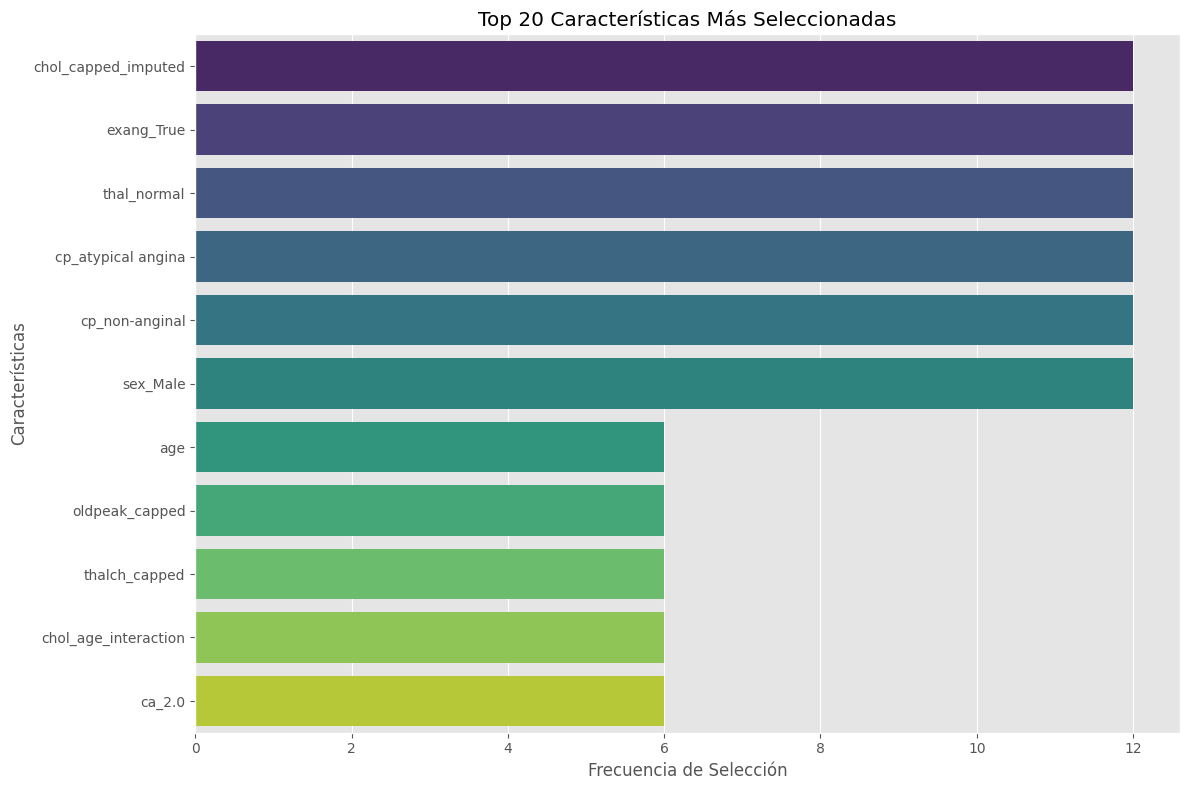


=== Importancia Promedio de Caracter√≠sticas ===


Caracter√≠stica  Importancia Promedio
0             exang_True              0.539497
1     cp_atypical angina              0.493401
2                 ca_2.0              0.359391
3               sex_Male              0.263356
4         cp_non-anginal              0.257965
5         oldpeak_capped              0.248551
6            thal_normal              0.217776
7    chol_capped_imputed              0.175069
8          thalch_capped              0.157948
9   chol_age_interaction              0.108715
10                   age              0.100939

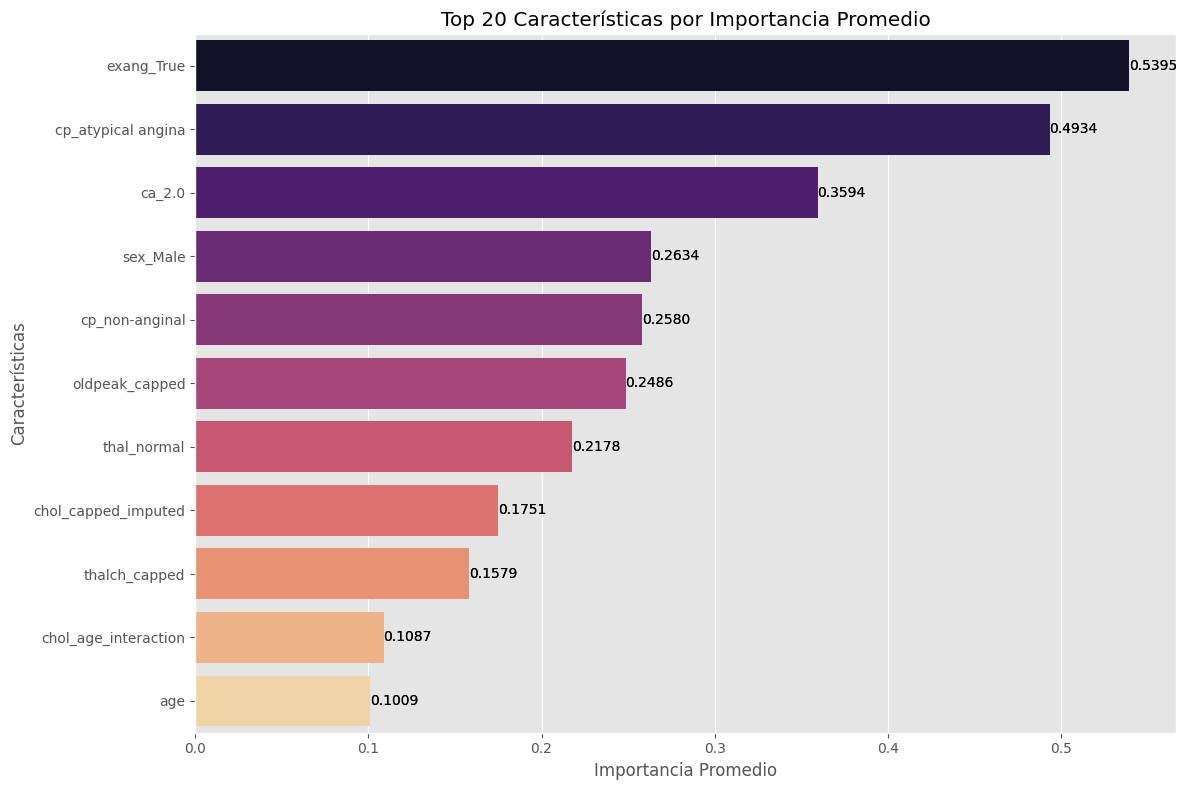

In [ ]:
# -------------------------
# 10. Visualizaci√≥n de Importancia de Caracter√≠sticas
# -------------------------

# 10.1. Frecuencia de Selecci√≥n de Caracter√≠sticas
freq_df = pd.DataFrame.from_dict(features_selected, orient='index', columns=['Frecuencia'])
freq_df = freq_df.sort_values(by='Frecuencia', ascending=False).reset_index().rename(columns={'index': 'Caracter√≠sticas'})
print("\n=== Frecuencia de Selecci√≥n de Caracter√≠sticas ===")
display(freq_df.head(20))  # Mostrar las 20 principales

plt.figure(figsize=(12, 8))
sns.barplot(data=freq_df.head(20), x='Frecuencia', y='Caracter√≠sticas', palette='viridis')
plt.title('Top 20 Caracter√≠sticas M√°s Seleccionadas')
plt.xlabel('Frecuencia de Selecci√≥n')
plt.ylabel('Caracter√≠sticas')
plt.tight_layout()
plt.show()

# 10.2. Importancia Promedio de Caracter√≠sticas
# Calcular la media de importancias
importances_df = pd.DataFrame([
    {'Caracter√≠stica': feat, 'Importancia Promedio': np.mean(imp_list)}
    for feat, imp_list in features_importances.items()
])
importances_df = importances_df.sort_values(by='Importancia Promedio', ascending=False).reset_index(drop=True)

print("\n=== Importancia Promedio de Caracter√≠sticas ===")
display(importances_df.head(20))  # Mostrar las 20 principales

plt.figure(figsize=(12, 8))
sns.barplot(data=importances_df.head(20), x='Importancia Promedio', y='Caracter√≠stica', palette='magma')
ax = sns.barplot(data=importances_df.head(20), x='Importancia Promedio', y='Caracter√≠stica', palette='magma')
plt.title('Top 20 Caracter√≠sticas por Importancia Promedio')
plt.xlabel('Importancia Promedio')
plt.ylabel('Caracter√≠sticas')
# A√±adir etiquetas de valor
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.4f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center')
plt.tight_layout()
plt.show()

Umbral √ìptimo: 0.5402515530586243

=== Reporte de Clasificaci√≥n (Conjunto de Prueba) ===
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        61
           1       0.82      0.88      0.85        77

    accuracy                           0.83       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.83      0.83      0.82       138

F1 en conjunto de prueba: 0.8500


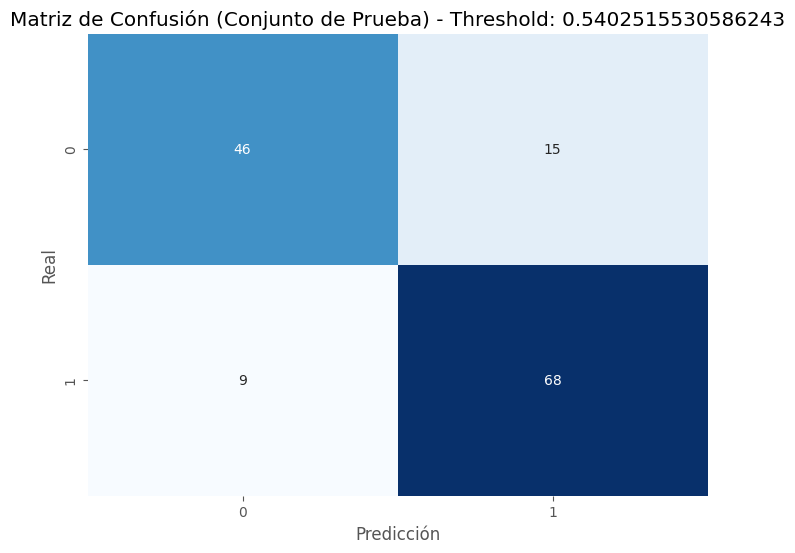


=== Reporte de Clasificaci√≥n (Conjunto de Validaci√≥n) ===
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        62
           1       0.81      0.84      0.83        76

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138

F1 en conjunto de validaci√≥n: 0.8258


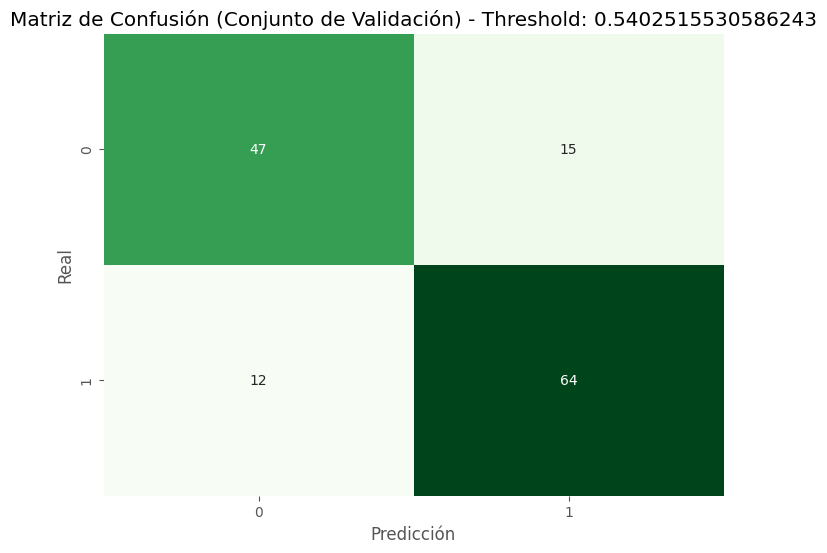

In [ ]:
# -------------------------
# 11. Evaluaci√≥n Detallada del Mejor Modelo
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve

# Detectar umbral optimo
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral √ìptimo: {optimal_threshold}")

# Definir el umbral para la clasificaci√≥n binaria
# threshold = 0.5  # Puedes ajustar este valor seg√∫n la sensibilidad deseada

# Asignar el umbral √≥ptimo
threshold = optimal_threshold

# Verificar si 'best_model' est√° correctamente asignado
if best_model:
    try:
        # -------------------------
        # Evaluaci√≥n en Conjunto de Prueba
        # -------------------------
        if hasattr(best_model, "predict_proba"):
            y_prob_test = best_model.predict_proba(X_test)[:, 1]
            y_pred_test = (y_prob_test >= threshold).astype(int)
        elif hasattr(best_model, "decision_function"):
            # Para modelos como SVM que no tienen predict_proba pero s√≠ decision_function
            y_scores_test = best_model.decision_function(X_test)
            y_pred_test = (y_scores_test >= threshold).astype(int)
        else:
            # Si el modelo no tiene predict_proba ni decision_function, usar predict directamente
            y_pred_test = best_model.predict(X_test)
        
        print("\n=== Reporte de Clasificaci√≥n (Conjunto de Prueba) ===")
        print(classification_report(y_test, y_pred_test))
        f1_test = f1_score(y_test, y_pred_test)
        print(f"F1 en conjunto de prueba: {f1_test:.4f}")
        
        # Matriz de confusi√≥n para el conjunto de prueba
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap="Blues", cbar=False,
                    xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.title(f"Matriz de Confusi√≥n (Conjunto de Prueba) - Threshold: {threshold}")
        plt.show()
        
        # -------------------------
        # Evaluaci√≥n en Conjunto de Validaci√≥n
        # -------------------------
        if hasattr(best_model, "predict_proba"):
            y_prob_val = best_model.predict_proba(X_val)[:, 1]
            y_pred_val = (y_prob_val >= threshold).astype(int)
        elif hasattr(best_model, "decision_function"):
            y_scores_val = best_model.decision_function(X_val)
            y_pred_val = (y_scores_val >= threshold).astype(int)
        else:
            y_pred_val = best_model.predict(X_val)
        
        print("\n=== Reporte de Clasificaci√≥n (Conjunto de Validaci√≥n) ===")
        print(classification_report(y_val, y_pred_val))
        f1_val = f1_score(y_val, y_pred_val)
        print(f"F1 en conjunto de validaci√≥n: {f1_val:.4f}")
        
        # Matriz de confusi√≥n para el conjunto de validaci√≥n
        conf_matrix_val = confusion_matrix(y_val, y_pred_val)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap="Greens", cbar=False,
                    xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.title(f"Matriz de Confusi√≥n (Conjunto de Validaci√≥n) - Threshold: {threshold}")
        plt.show()
        
    except Exception as e:
        print(f"Error al evaluar el modelo: {e}")
else:
    print("No se encontr√≥ un mejor modelo. Verifica el flujo de ejecuci√≥n.")


In [ ]:
# -------------------------
# Final de la Medici√≥n de Tiempo Actual
# -------------------------
fin_total_actual = time.time()
tiempo_total_actual = fin_total_actual - inicio_total_actual

print(f"\nTiempo total de ejecuci√≥n actual: {tiempo_total_actual:.2f} segundos")
print(f"Tiempo de entrenamiento y b√∫squeda de hiperpar√°metros: {tiempo_entrenamiento:.2f} segundos")


Tiempo total de ejecuci√≥n actual: 293.79 segundos
Tiempo de entrenamiento y b√∫squeda de hiperpar√°metros: 292.66 segundos


### **An√°lisis de los Resultados**

#### **1. Resultados Ordenados**
El modelo seleccionado se encuentra en la primera posici√≥n de la tabla, con los siguientes criterios:

1. **Mayor F1 Media:**
   - Calculada como el promedio entre **F1 Test** y **F1 Validation**.
   - **Modelo: XGBoost + LogisticRegression.**
   - F1 Media: **0.8483**.

2. **Menor Diferencia:**
   - Diferencia entre **F1 Test** y **F1 Validation**: **0.0071**, la menor entre todos los modelos.



---

#### **2. Mejor Modelo Seleccionado**
- **Modelo de Selecci√≥n de Caracter√≠sticas:** XGBoost.
- **Modelo de Entrenamiento:** LogisticRegression.
- **F1 Test:** 0.8519.
- **F1 Validation:** 0.8447.
- **F1 Media:** 0.8483.
- **Diferencia (Test - Validation):** 0.0071.
- **Caracter√≠sticas Seleccionadas:**
  - `'chol_capped_imputed'`
  - `'exang_True'`
  - `'thal_normal'`
  - `'cp_atypical angina'`
  - `'cp_non-anginal'`

---





### **Ventajas del Mejor Modelo**
1. **Equilibrio en M√©tricas:**
   - Presenta el mejor balance entre las m√©tricas de prueba y validaci√≥n.
   - Muy baja diferencia (0.0071), lo que indica consistencia.

2. **Compacto:**
   - Selecciona solo 5 caracter√≠sticas clave.

3. **Generalizaci√≥n:**
   - Su desempe√±o es consistente entre los conjuntos de prueba y validaci√≥n.



---

#### **3. Comparaci√≥n con el Segundo Mejor Modelo**
El segundo modelo, **GradientBoosting + SVC**, tiene:
- **F1 Media:** 0.8434 (ligeramente menor que 0.8483).
- **Diferencia:** 0.0094 (ligeramente mayor que 0.0071).

Aunque el rendimiento es similar, el **menor F1 Media** y la **mayor diferencia** lo posicionan por debajo del modelo seleccionado.



---

### **Conclusi√≥n**
El modelo **XGBoost + LogisticRegression** es el m√°s equilibrado y consistente seg√∫n los criterios definidos. üöÄ




## **9.Conclusiones**

Resuman los hallazgos principales, incluyendo: 
‚Ä¢Las preguntas iniciales respondidas. 
‚Ä¢Las variables clave identificadas. 
‚Ä¢Los modelos m√°s efectivos y las m√©tricas de evaluaci√≥n. 
‚Ä¢Posibles √°reas de mejora y an√°lisis futuros. 








- [ ]  ¬øHe eliminado columnas irrelevantes o redundantes?

### **5. Preparaci√≥n de datos**

- [ ]  ¬øHe dividido los datos en entrenamiento, validaci√≥n y prueba?
- [ ]  ¬øHe aplicado escalado o normalizaci√≥n si es necesario?
- [ ]  ¬øHe codificado las variables categ√≥ricas (One-Hot, Label Encoding)?
- [ ]  ¬øHe creado variables derivadas o features adicionales si aportan valor?

### **6. Selecci√≥n de modelo**

- [ ]  ¬øHe probado varios modelos iniciales? (baseline)
- [ ]  ¬øHe considerado la complejidad del modelo vs. los recursos disponibles?
- [ ]  ¬øTengo claro el criterio de evaluaci√≥n? (accuracy, RMSE, F1, etc.)

### **7. Entrenamiento del modelo**

- [ ]  ¬øHe ajustado los hiperpar√°metros b√°sicos?
- [ ]  ¬øHe utilizado validaci√≥n cruzada para evaluar la robustez?
- [ ]  ¬øHe revisado posibles problemas de overfitting o underfitting?

### **8. Evaluaci√≥n del modelo**

- [ ]  ¬øHe evaluado el modelo con m√©tricas adecuadas?
- [ ]  ¬øHe analizado errores y predicciones err√≥neas?
- [ ]  ¬øEl modelo cumple los objetivos planteados inicialmente?

### **9. Interpretaci√≥n y comunicaci√≥n**

- [ ]  ¬øHe generado gr√°ficos o reportes para explicar los resultados?
- [ ]  ¬øLos resultados son comprensibles para no expertos?
- [ ]  ¬øPuedo justificar las decisiones tomadas en cada paso?

### **10. Implementaci√≥n**

- [ ]  ¬øHe guardado el modelo entrenado (pickle, joblib, etc.)?
- [ ]  ¬øHe documentado el pipeline de datos y el flujo de trabajo?
- [ ]  ¬øEl modelo es escalable y replicable?

### **11. Mantenimiento y mejora**

- [ ]  ¬øHe considerado un plan para actualizar los datos y el modelo?
- [ ]  ¬øHe automatizado el flujo de trabajo si es posible?
- [ ]  ¬øHe identificado √°reas de mejora para futuras iteraciones?